# Projet Machine Learning avec <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>

#### Ema Galuppini, Julie Laurent, Quentin Senatore, Quentin Touil

Pour ce projet, deux notebooks similaires ont été rédigés : un en R et l’autre en Python. Le notebook rédigé en R contient l'entièreté de nos analyses. Celui en Python contient le code ainsi que des analyses minimales.


## Introduction

Les données sont issues du site du concours KAGGLE; il s’agit du jeu de données " Gym Members Exercise
Dataset" disponible ici : https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset.
Ce jeu de données fournit un aperçu détaillé des routines d’exercice, des attributs physiques et des mesures
de la condition physique des membres d’une salle de sport. Il contient 15 variables observées chez 973 individus
fréquentant une salle de sport :
- Age : âge du membre de la salle de sport.
- Gender : Sexe du membre de la salle de sport (qualitative à deux modalités : homme ou femme).
- Weight..kg. : Poids du membre en kilogrammes.
- Height..m. : Taille du membre en mètres.
- Max_BPM : Fréquence cardiaque maximale (battements par minute) pendant les séances d’entraînement.
- Avg_BPM : Fréquence cardiaque moyenne pendant les séances d’entraînement.
- Resting_BPM : Fréquence cardiaque au repos avant l’entraînement.
- Session_Duration..hours. : Durée de chaque séance d’entraînement en heures.
- Calories_Burned : Total des calories brûlées au cours de chaque séance.
- Workout_Type : Type d’entraînement effectué (qualitative à 4 modalités : cardio, musculation, yoga,
HIIT).
- Fat_Percentage (Pourcentage de graisse) : Pourcentage de graisse corporelle du membre.
- Water_Intake..liters. : Consommation quotidienne d’eau pendant les séances d’entraînement.
- Workout_Frequency..days.week. : Nombre de séances d’entraînement par semaine (qualitative à 4
modalités : 2 à 5).
- Experience_Level : Niveau d’expérience (qualitative à 3 modalités : 1 pour débutant à 3 pour expert).
- BMI : Indice de masse corporelle (IMC), calculé à partir de la taille et du poids.

  
Dans ce projet, on souhaite dans un premier temps, prédire la variable **Calories_Burned** à partir de toutes
les autres variables, et dans un second temps, prédire la variable **Experience_Level** à partir de toutes les autres
variables (dont Calories_Burned).

Pour cela nous allons commencer par une exploration des variables quantitatives et qualitatives. Ensuite nous passerons à la modélisation des variables à prédire.e


In [1]:
# Chargement des librairies nécessaires
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(MASS)
library(vcd)
library(mosaic) 
library(e1071)
library(rpart) 
library(rpart.plot)
library(partykit)

Warning message:
"le package 'ggplot2' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'tidyverse' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'tidyr' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'readr' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'purrr' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'dplyr' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'stringr' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'forcats' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'lubridate' a été compilé avec la version R 4.3.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────

<h1 style="color:red">I- Statistiques descriptives et Exploration des variables</h1>


### 1) Prise en charge des données : Vérification de la nature des différentes variables et leur encodage. Convertion des variables qualitatives.

In [19]:
# Lecture des données
path <- ""
gym <- read.csv("gym_members_exercise_tracking.csv", header = TRUE)
# Premières lignes du jeu de données
head(gym)
# Vérification du contenu
summary(gym)

Age Gender Weight..kg. Height..m. Max_BPM Avg_BPM Resting_BPM
1 56  Male   88.3        1.71       180     157     60         
2 46  Female 74.9        1.53       179     151     66         
3 32  Female 68.1        1.66       167     122     54         
4 25  Male   53.2        1.70       190     164     56         
5 38  Male   46.1        1.79       188     158     68         
6 56  Female 58.0        1.68       168     156     74         
  Session_Duration..hours. Calories_Burned Workout_Type Fat_Percentage
1 1.69                     1313            Yoga         12.6          
2 1.30                      883            HIIT         33.9          
3 1.11                      677            Cardio       33.4          
4 0.59                      532            Strength     28.8          
5 0.64                      556            Strength     29.2          
6 1.59                     1116            HIIT         15.5          
  Water_Intake..liters. Workout_Frequency..days.week. Experience_Level BMI  
1 3.5                   4                             3                30.20
2 2.1                   4                             2                32.00
3 2.3                   4                             2                24.71
4 2.1                   3                             1                18.41
5 2.8                   3                             1                14.39
6 2.7                   5                             3                20.55

      Age           Gender           Weight..kg.       Height..m.   
 Min.   :18.00   Length:973         Min.   : 40.00   Min.   :1.500  
 1st Qu.:28.00   Class :character   1st Qu.: 58.10   1st Qu.:1.620  
 Median :40.00   Mode  :character   Median : 70.00   Median :1.710  
 Mean   :38.68                      Mean   : 73.85   Mean   :1.723  
 3rd Qu.:49.00                      3rd Qu.: 86.00   3rd Qu.:1.800  
 Max.   :59.00                      Max.   :129.90   Max.   :2.000  
    Max_BPM         Avg_BPM       Resting_BPM    Session_Duration..hours.
 Min.   :160.0   Min.   :120.0   Min.   :50.00   Min.   :0.500           
 1st Qu.:170.0   1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040           
 Median :180.0   Median :143.0   Median :62.00   Median :1.260           
 Mean   :179.9   Mean   :143.8   Mean   :62.22   Mean   :1.256           
 3rd Qu.:190.0   3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460           
 Max.   :199.0   Max.   :169.0   Max.   :74.00   Max.   :2.000           

On remarque que il y a plusieurs variables qualitatives : Gender, Workout_Type.
De même certaines variables ne prennent pas beaucoup de valeurs différentes donc il est intérréssant de les convertir en facteur : Experience_Level, Workout_Frequency..days.week.

Les autres variables sont des variables quantitatives que l'on transformera plus tard. 

In [20]:
# Changement du type des variables qualitatives en facteur
gym[, "Gender"] <- as.factor(gym[, "Gender"])
gym[, "Workout_Type"] <- as.factor(gym[, "Workout_Type"])
#On décide de mettre les 2 variables suivantes sous forme qualitatives car elles prennent seulement un certains nombres de valeur.
gym[, "Experience_Level"] <- as.factor(gym[, "Experience_Level"])
gym[, "Workout_Frequency..days.week."] <- as.factor(gym[, "Workout_Frequency..days.week."])

In [5]:
# Vérification dans le summary
summary(gym)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

### 2) Exploration par une analyse descriptive unidimensionnelle des données.

#### 2.1) Données quantitatives 

Il est nécessaire d'étudier la distribution des différentes variables et de noter la symétrie ou non de celles-ci.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


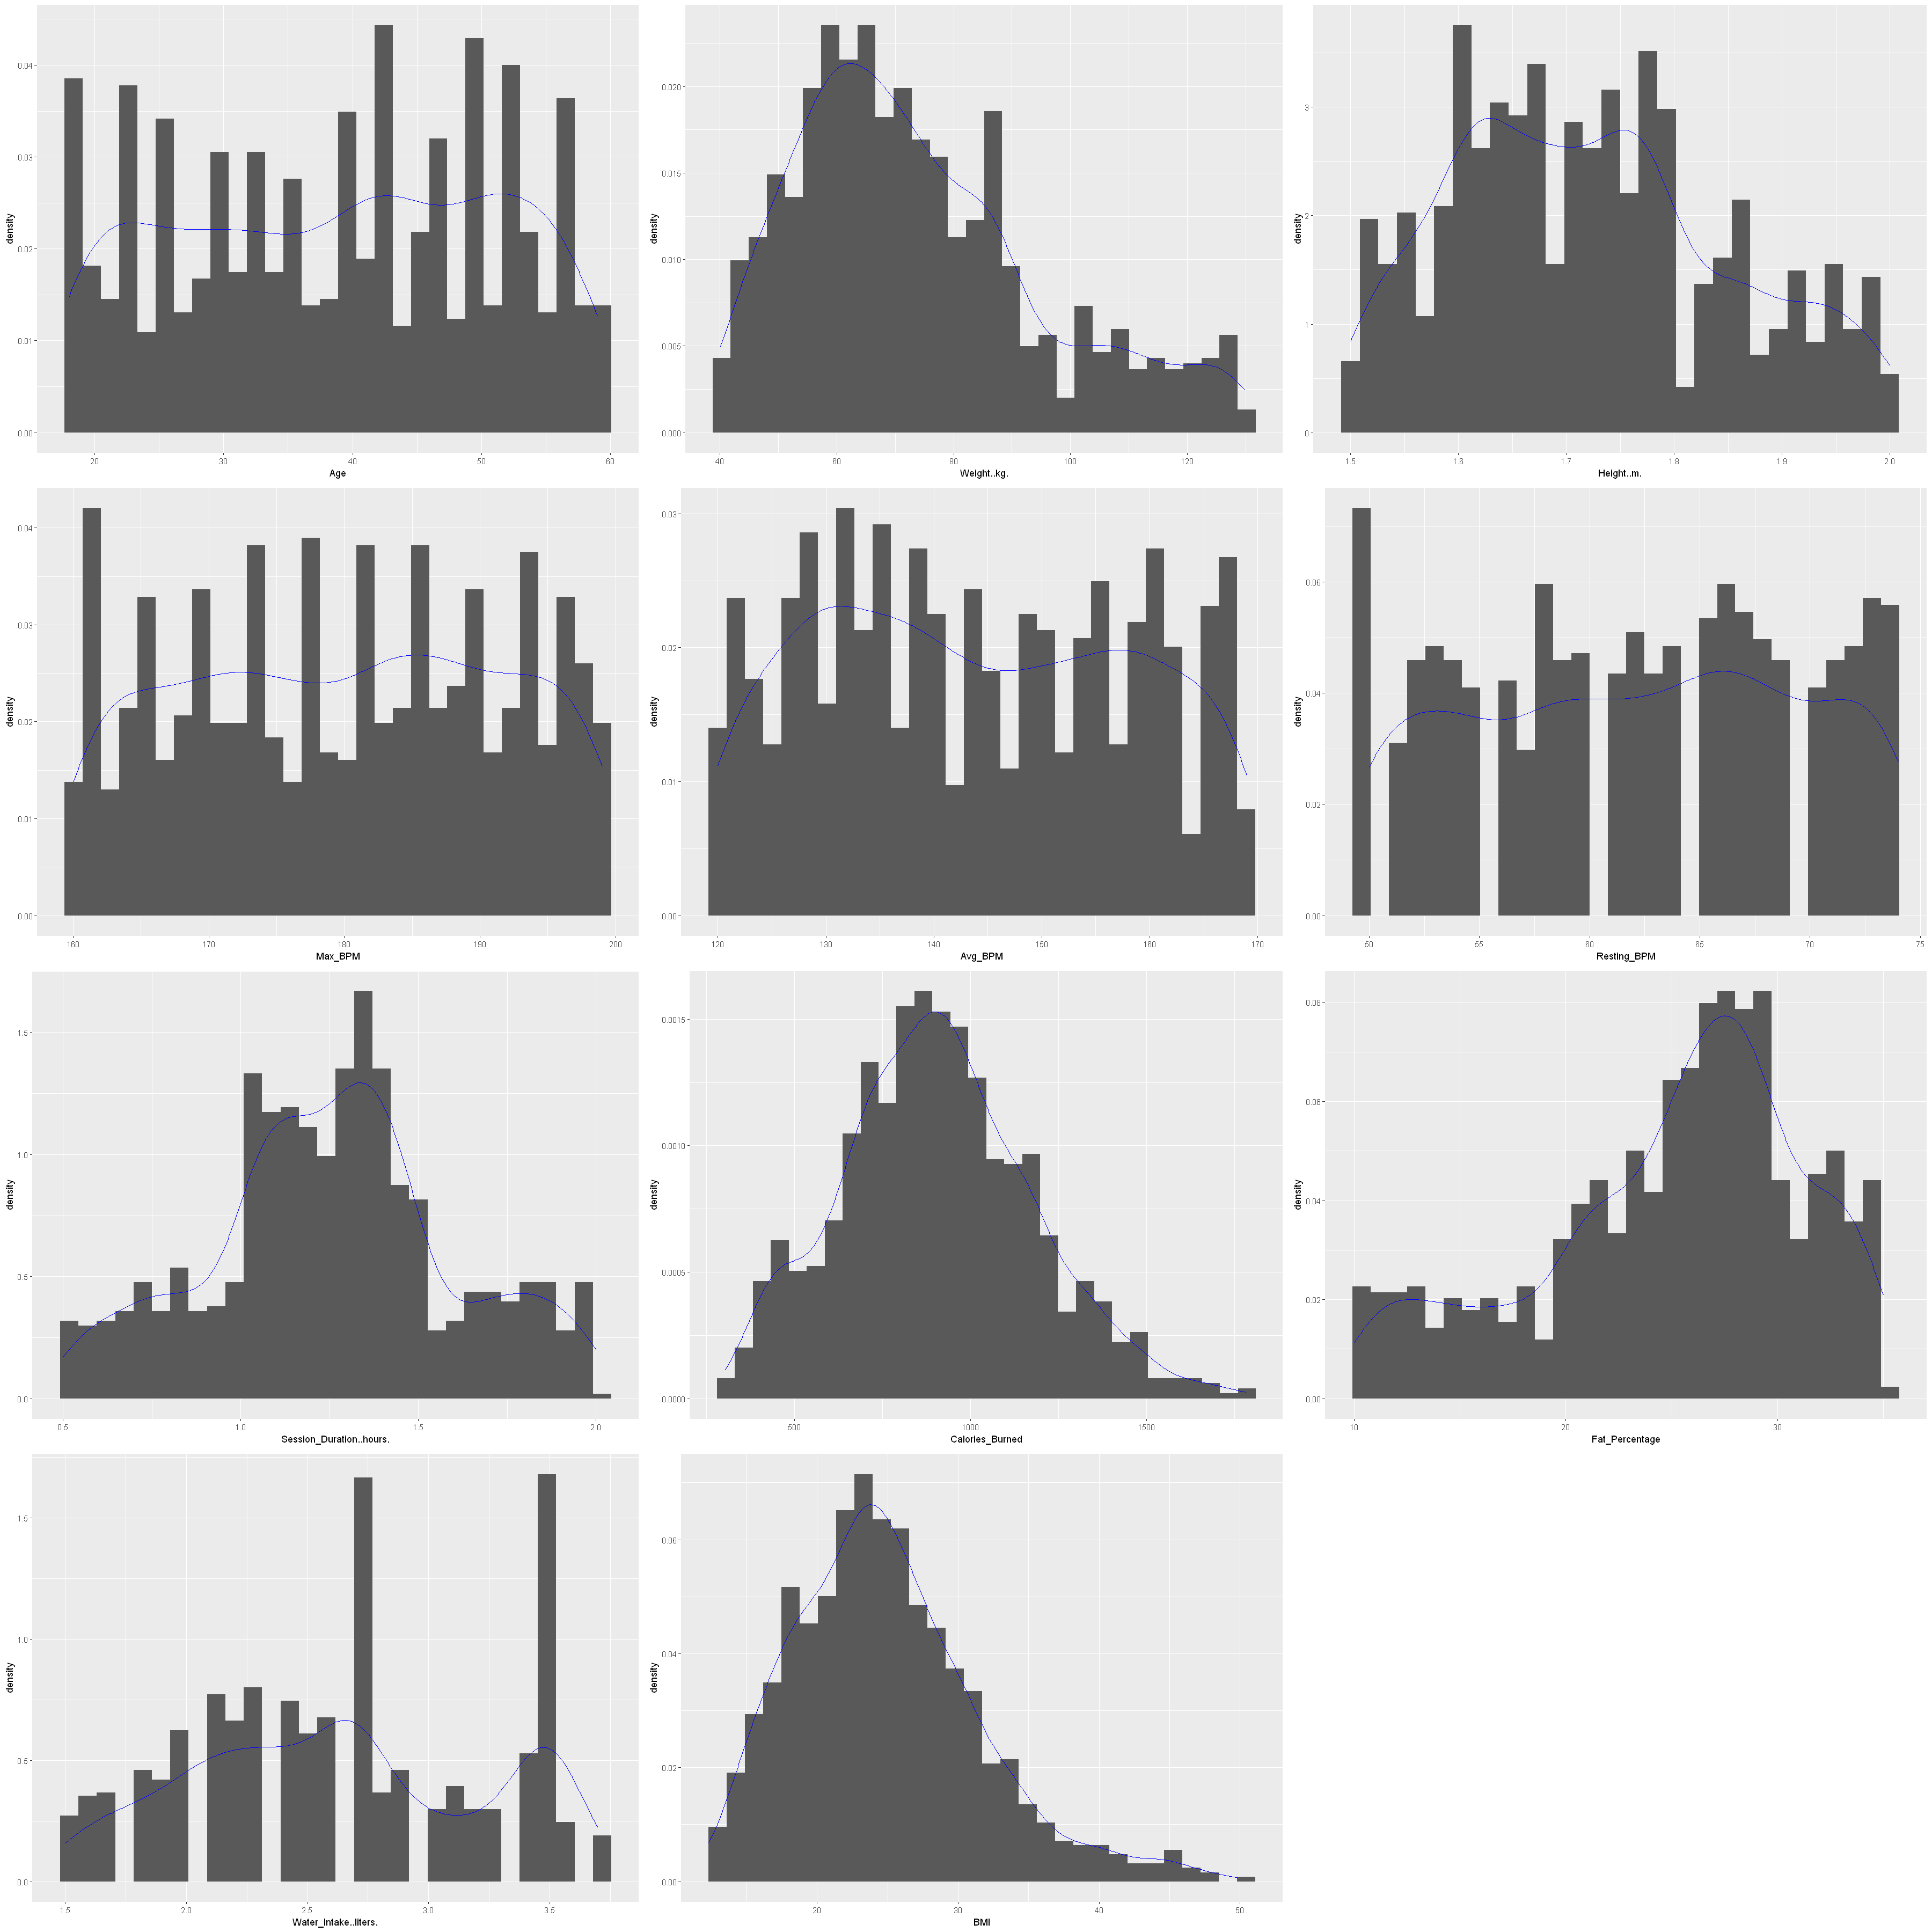

In [5]:
options(repr.plot.width=30, repr.plot.height=30)
g1<-ggplot(gym,aes(x=Age))+geom_histogram(aes(y=after_stat(density)))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(gym,aes(x=Height..m.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(gym,aes(x=Max_BPM))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(gym,aes(x=Avg_BPM))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(gym,aes(x=Resting_BPM))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(gym,aes(x=Session_Duration..hours.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(gym,aes(x=Calories_Burned))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(gym,aes(x=Fat_Percentage))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(gym,aes(x=Water_Intake..liters.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 

grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,ncol=3)

Les variables sont quantitatives et non symétriques sauf calories_burned et BMI à peu près. On va donc passer a une transformation des variables pour rendre certaines distributions plus symétriques et ainsi plus "gaussiennes". C'est nécessaire pour certaines méthodes à venir de modélisation (linéaires), pas pour toutes (arbres).

Dans notre cas, les variables ayant une ressemblance gaussienne sont calories_burned, BMI, Weight..kg. et Fat_Percentage.
On va donc essayer de les centrer.

##### 2.1.1) Transformation des variables 

Remarque : comme nous allons prédire Calories_Burned, il n'est pas intéressant de la transformer.

##### a) BMI

Tout d'abord, on va s'intéresser à BMI car elle est plus ou moins symétrique. Ainsi il se peut qu'en appliquant une certaine fonction bien choisie, nous puissions la rendre symétrique.
MAL DIT : En s'inspirant du TP de base, on remarque que l'on aplique + des log lorsqu'il y a un gros pic au début (pour "contrer le log").
Ici, on ne remarque pas de pic particulier donc on va se contenter d'appliquer les 2 fonctions vues en TP : sqrt et log puis comparer les résultats.

In [21]:
gym[, "LBMI"] <- log(gym[, "BMI"])
gym[, "SBMI"] <- sqrt(gym[, "BMI"])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


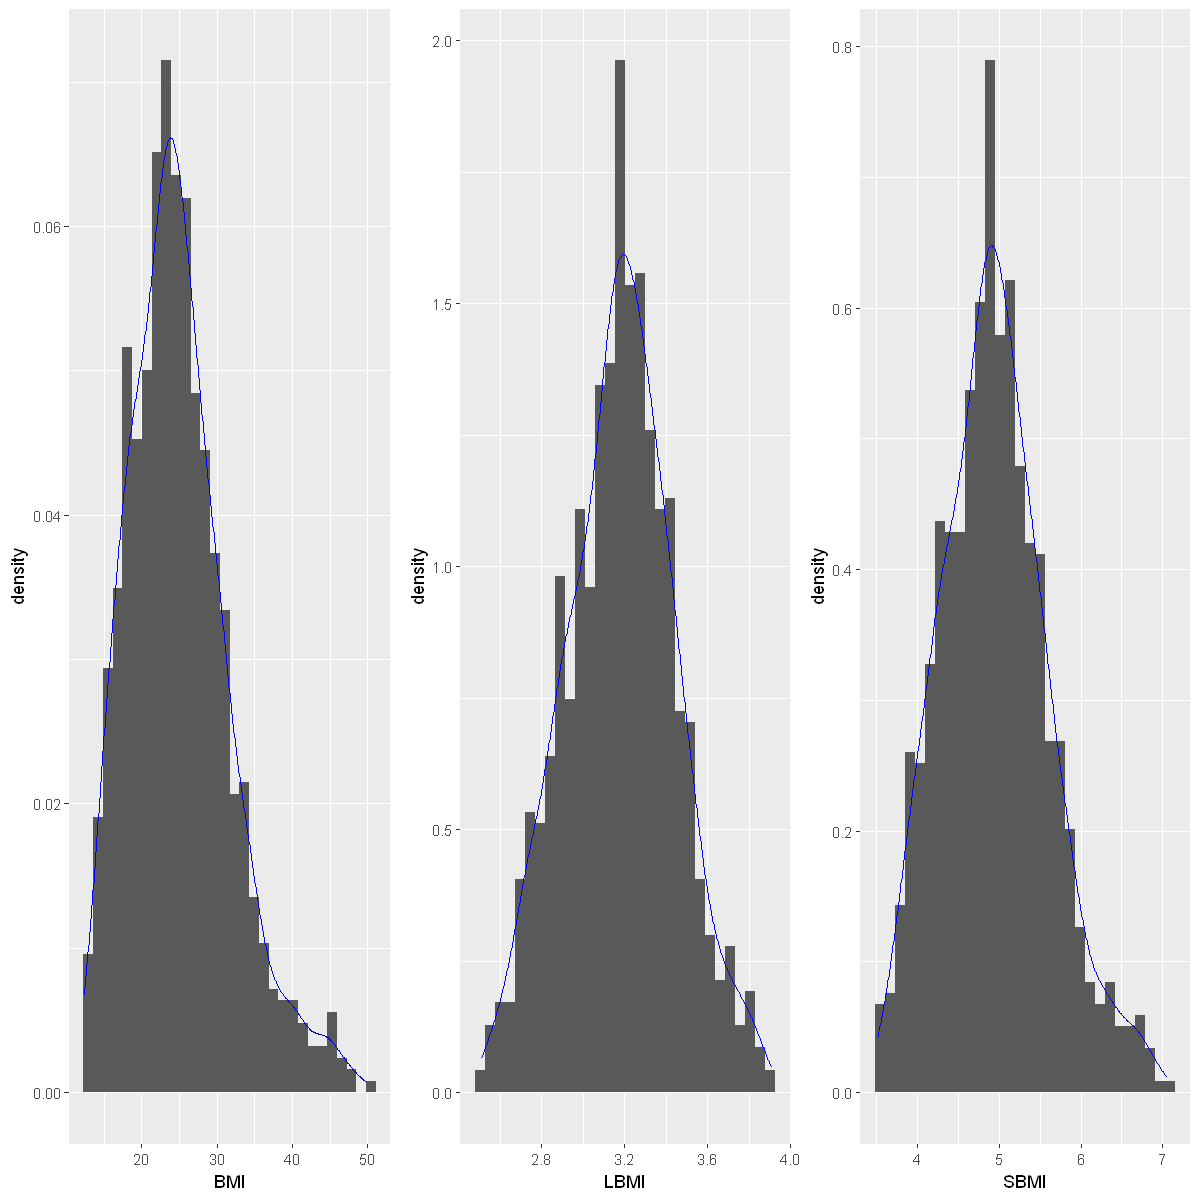

In [7]:
options(repr.plot.width=10, repr.plot.height=10)
g1<-ggplot(gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=LBMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(gym,aes(x=SBMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1, g2, g3, ncol=3)

Nous choisissons le LBMI (log) car c'est celle qu'on trouve la plus centrée.

##### b) Weight..kg

In [22]:
gym[, "LWeight..kg."] <- log(gym[, "Weight..kg."])
gym[, "SWeight..kg."] <- sqrt(gym[, "Weight..kg."])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


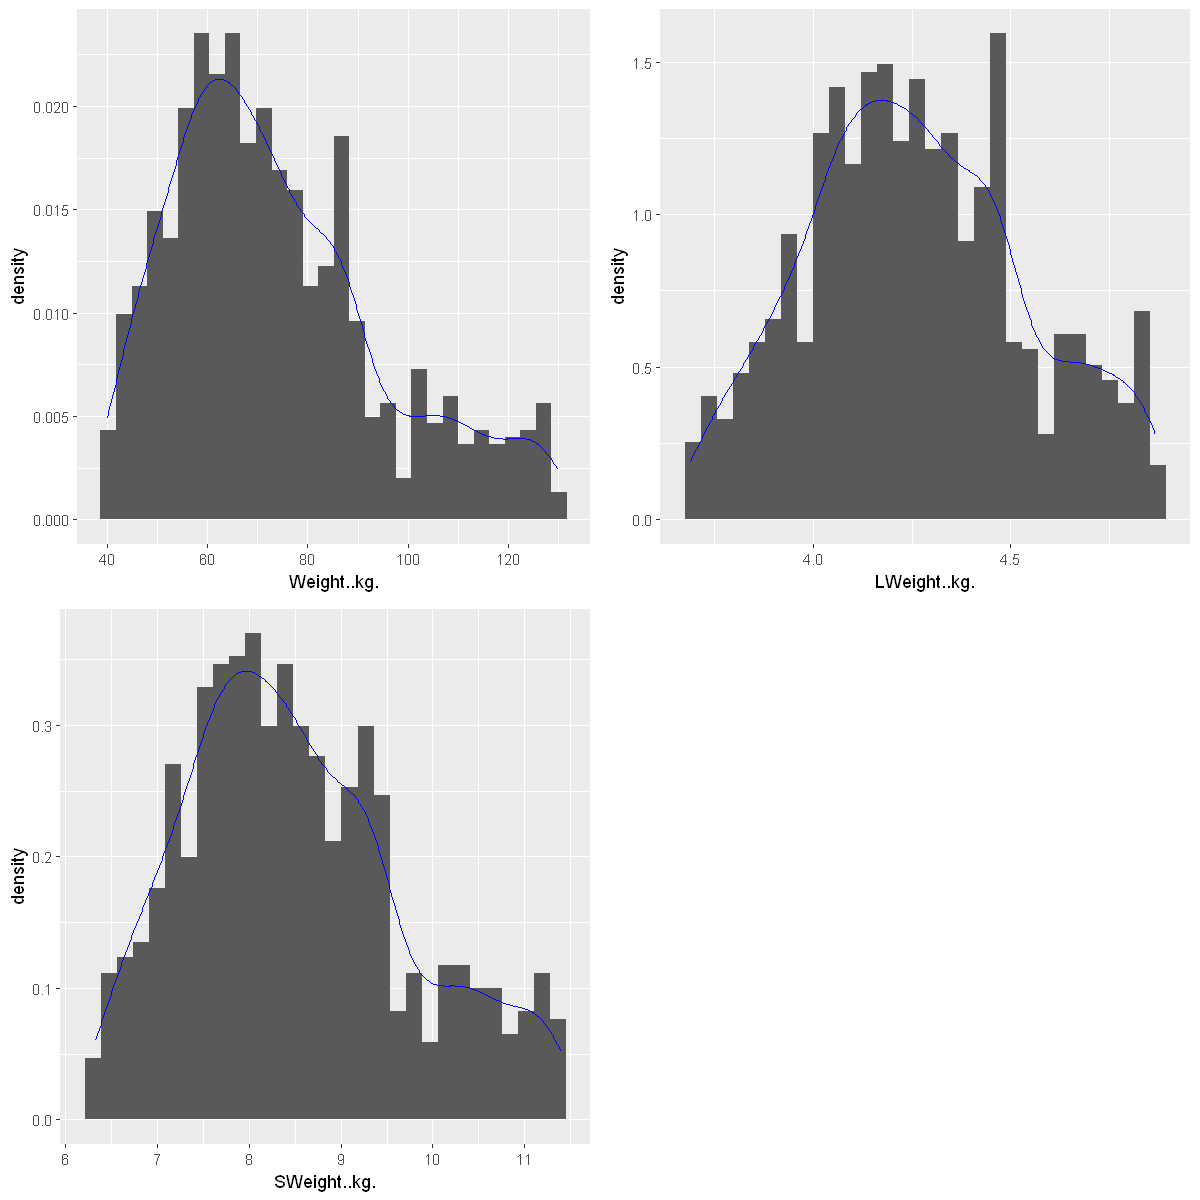

In [9]:
options(repr.plot.width=10, repr.plot.height=10)
g1<-ggplot(gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=LWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g3<-ggplot(gym,aes(x=SWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1, g2, g3, ncol=2)

On remarque que la fonction log reste celle qui rend la distribution la plus gaussienne ainsi on garde LWeight.

##### c) Fat_Percentage

Pour la dernière variable Fat_Percentage, les transformations testées n'ont pas été concluantes. On la gardera tel quel. 

##### 2.1.2) Suppression des variables qui ont été transformées

In [23]:
gym <- gym[ , -which(names(gym) == "BMI")]
gym <- gym[ , -which(names(gym) == "SBMI")]
gym <- gym[ , -which(names(gym) == "Weight..kg." )]
gym <- gym[ , -which(names(gym) == "SWeight..kg." )]

In [11]:
summary(gym)

      Age           Gender      Height..m.       Max_BPM         Avg_BPM     
 Min.   :18.00   Female:462   Min.   :1.500   Min.   :160.0   Min.   :120.0  
 1st Qu.:28.00   Male  :511   1st Qu.:1.620   1st Qu.:170.0   1st Qu.:131.0  
 Median :40.00                Median :1.710   Median :180.0   Median :143.0  
 Mean   :38.68                Mean   :1.723   Mean   :179.9   Mean   :143.8  
 3rd Qu.:49.00                3rd Qu.:1.800   3rd Qu.:190.0   3rd Qu.:156.0  
 Max.   :59.00                Max.   :2.000   Max.   :199.0   Max.   :169.0  
  Resting_BPM    Session_Duration..hours. Calories_Burned    Workout_Type
 Min.   :50.00   Min.   :0.500            Min.   : 303.0   Cardio  :255  
 1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0   HIIT    :221  
 Median :62.00   Median :1.260            Median : 893.0   Strength:258  
 Mean   :62.22   Mean   :1.256            Mean   : 905.4   Yoga    :239  
 3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0                 
 Max.   :7

##### 2.1.3) Vérification des outliers

Maintenant que nos variables ont été transformées, on veut s'assurer qu'il n'y ait pas d'outliers importants avant de pourvoir passer à la suite du projet. Pour cela, on va afficher des boxplots pour chacune de nos variables quantitatives. Etant donné que nos variables quantitatives ont des valeurs très différentes, nous allons les normaliser pour rendre l'affichage des boxplot plus propre, mais cela ne change rien aux outliers.

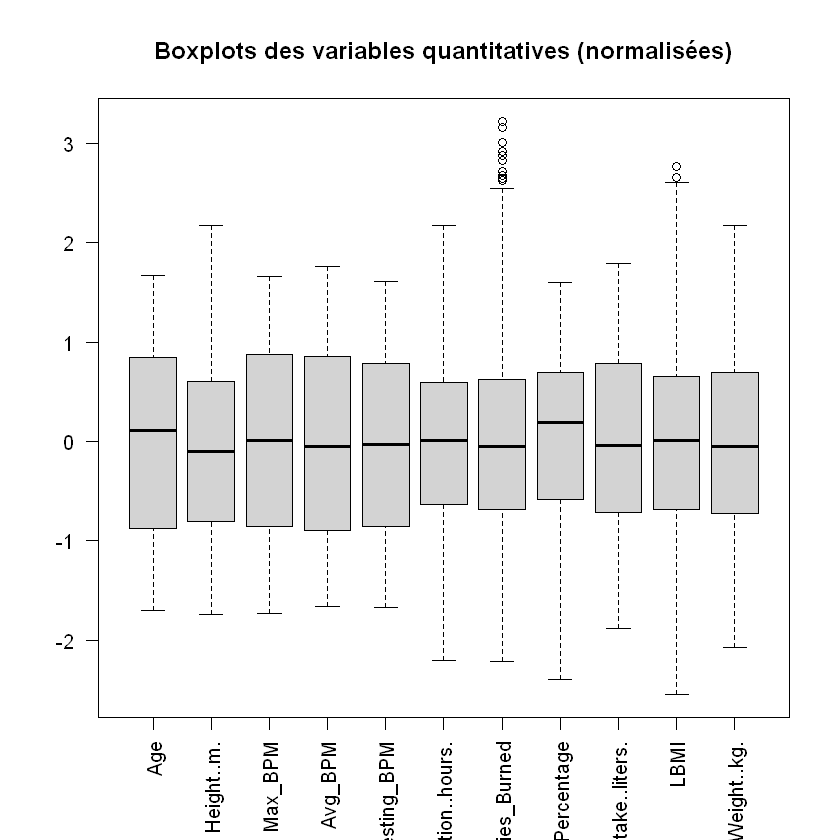

In [24]:
#Sélection des variables quanti i.e.: numeric
quanti_data <- gym[, sapply(gym, is.numeric)]

# Normalisation (centrage et réduction)
quanti_data_scaled <- scale(quanti_data)

# Boxplot des données normalisées
boxplot(quanti_data_scaled, main = "Boxplots des variables quantitatives (normalisées)", las = 2)


Aucun outliers excepté pour Calories_Burned et LBMI.  Cependant, après une inspection plus approfondie des valeurs extrêmes, nous constatons qu'elles ne sont pas aberrantes et ne risquent pas de fausser les résultats. Par conséquent, nous avons décidé de les conserver dans l'analyse.

### 2.2) Données qualitatives 

In [25]:
# Sélection unique des variables qualitatives
quali_vars <- which(sapply(gym, function(x) is.factor(x) || is.character(x)))

# Affichage des tables de fréquence sans doublons
for (var in names(gym)[quali_vars]) {
  cat("\n---", var, "---\n")
  print(table(gym[[var]]))
}


--- Gender ---

Female   Male 
   462    511 

--- Workout_Type ---

  Cardio     HIIT Strength     Yoga 
     255      221      258      239 

--- Workout_Frequency..days.week. ---

  2   3   4   5 
197 368 306 102 

--- Experience_Level ---

  1   2   3 
376 406 191 


On ne remarque pas de valeurs aberrantes ou inutiles.

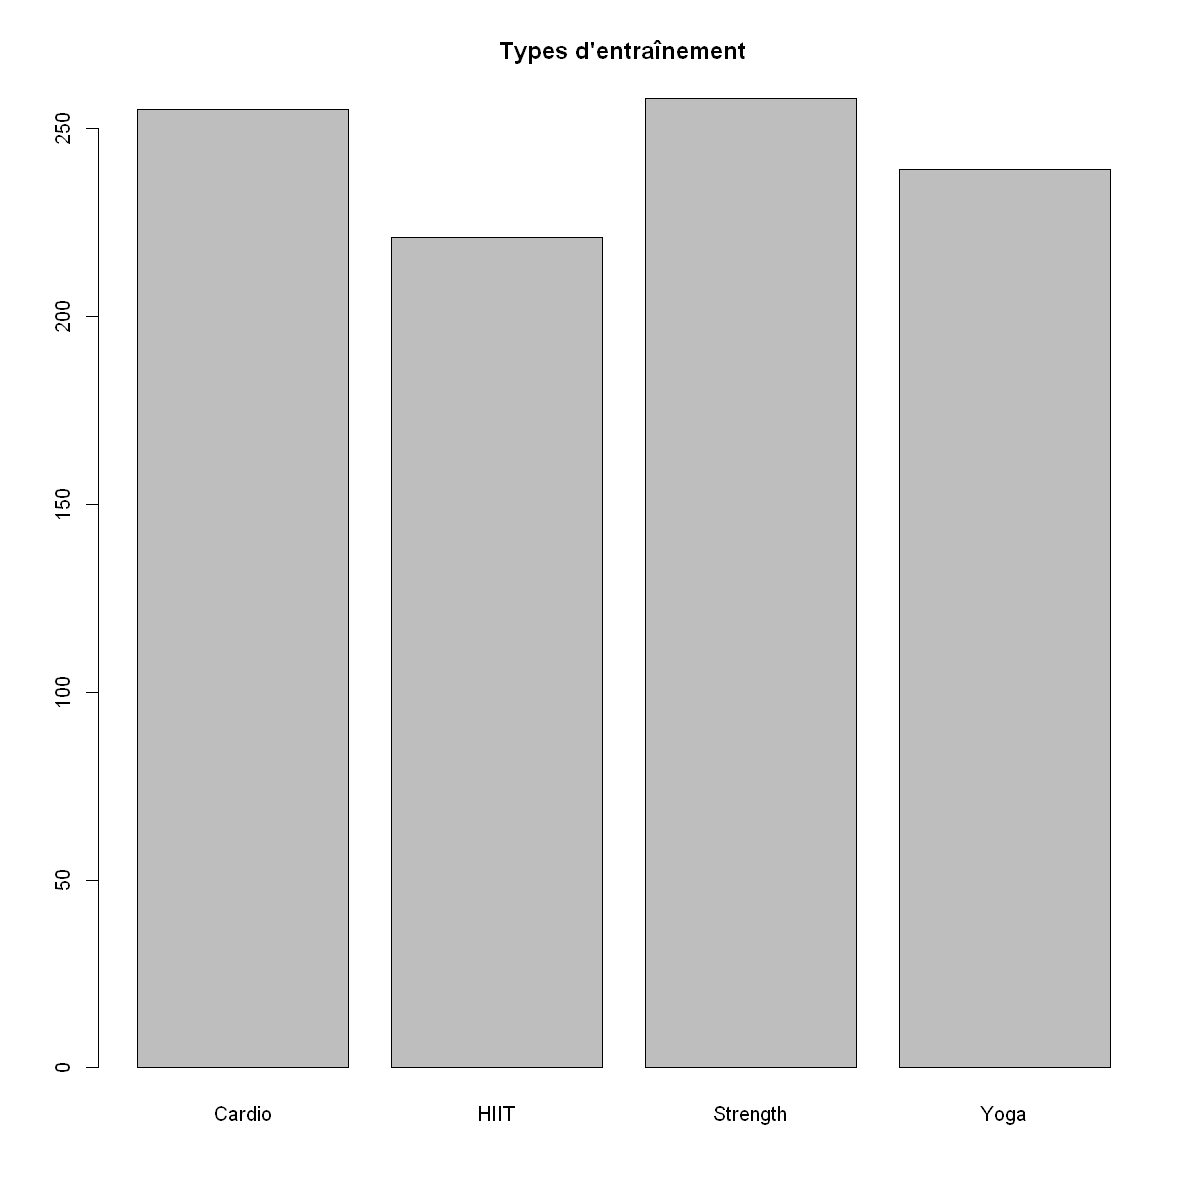

In [14]:
barplot(table(gym$Workout_Type), main = "Types d'entraînement")

## 3) Analyse descriptive bidimensionnelle

### 3.1) Comparaison quanti / quanti 

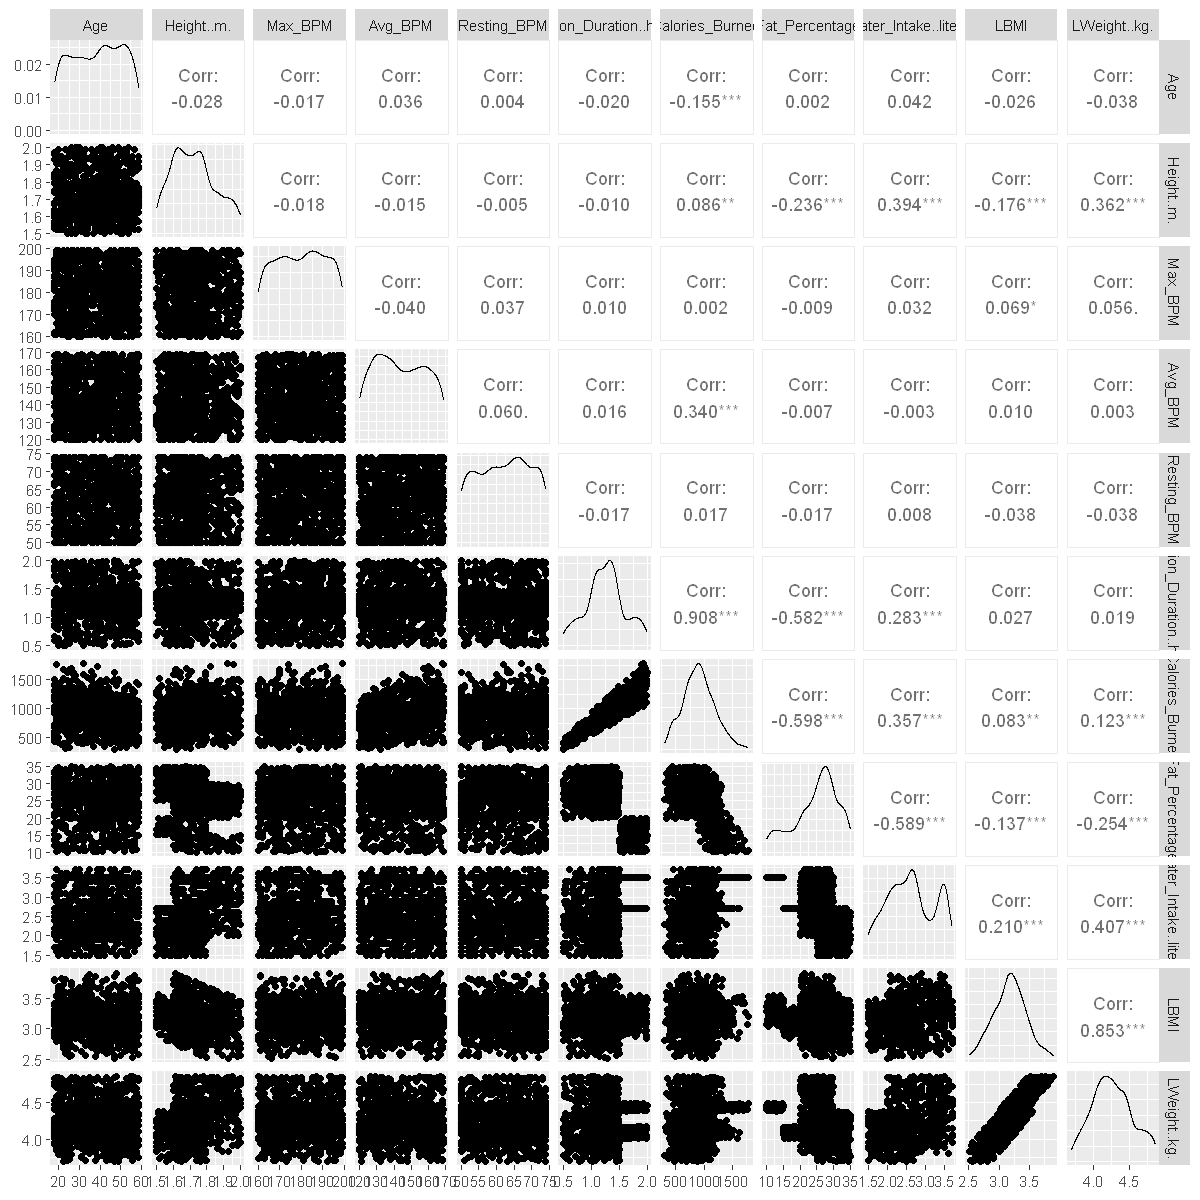

In [15]:
ggpairs(gym[, c(1,3:8,10,11,14,15)])

On voit que la durée de la session est correlée au  nombre de calories brulées. De plus, sans surprise, l'IMC est correlé au poids.

Il y a aussi une (plus légère) corrélation négative entre le pourcentage de graisse corporelle d'un membre et :
- la durée de la session => les personnes en difficulté physique peuvent avoir du mal à faire de plus longues séances
- nombre de calories brulées => par conséquent, elles ont du mal à bruler des calories
- consommation quotidienne d’eau pendant les séances d’entraînement => plus on s'entraîne et plus on s'hydrate (et inversement)


On va vérifier ces corrélations avec des scatter plot (qui sont déjà présents dans le ggpairs mais cela permet de mieux visualiser en les affichant en plus grand) :

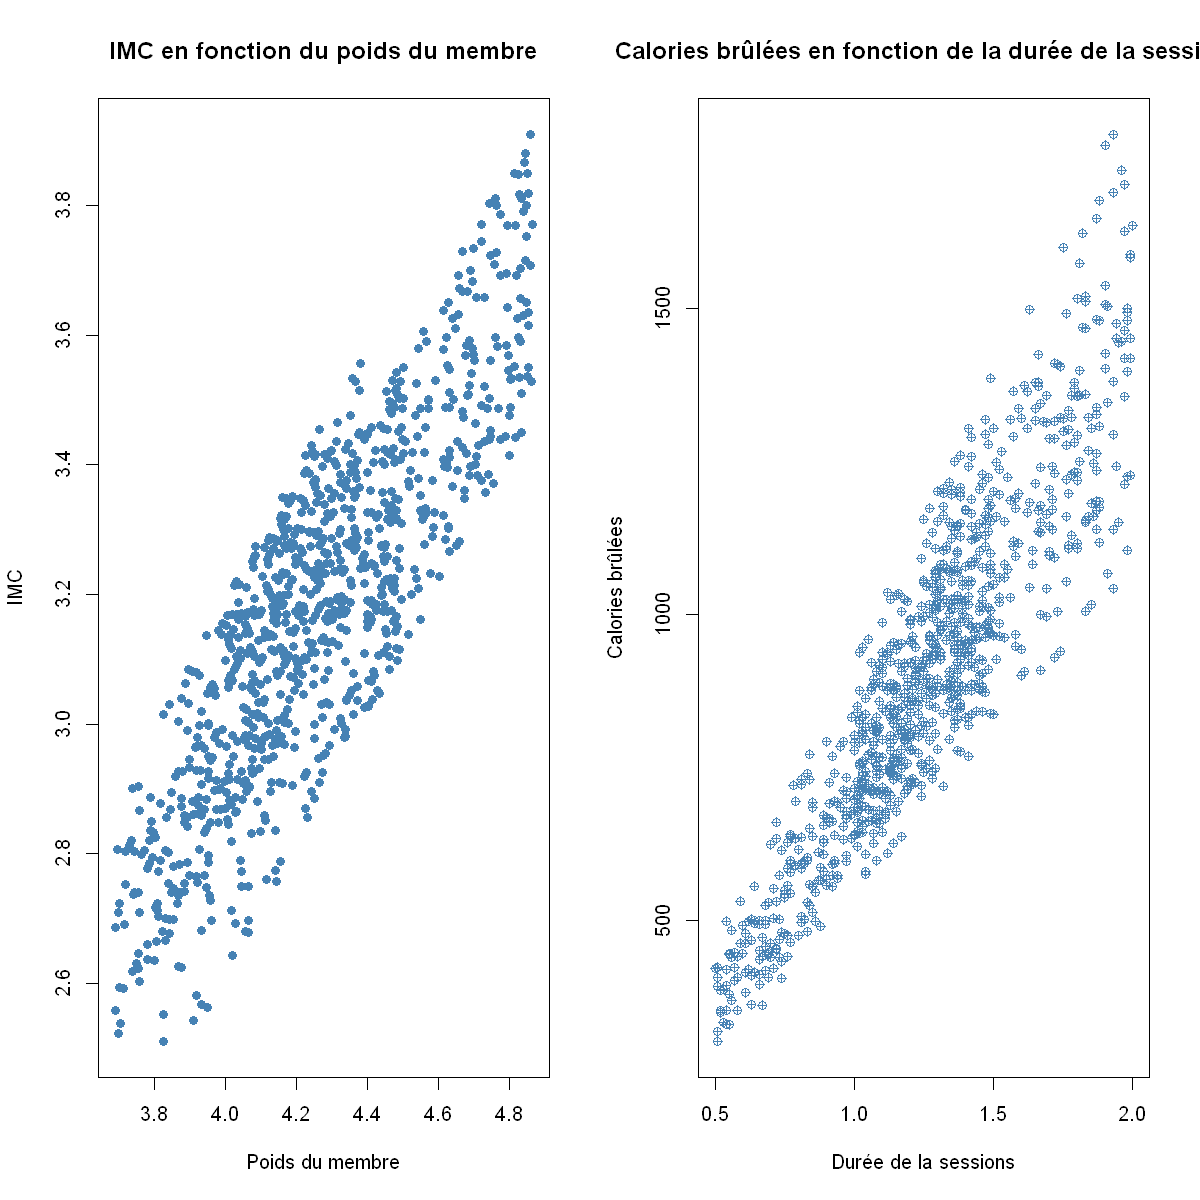

In [16]:
par(mfrow = c(1, 2))


plot(gym$LWeight..kg., gym$LBMI, 
     main = "IMC en fonction du poids du membre",
     xlab = "Poids du membre", ylab = "IMC",
     pch = 19, col = "steelblue")


plot(gym$Session_Duration..hours., gym$Calories_Burned,
     main = "Calories brûlées en fonction de la durée de la session",
     xlab = "Durée de la sessions", ylab = "Calories brûlées",
     pch = 10, col = "steelblue")

Cela confirme bien nos hypothèses de corrélations positives plutôt fortes.

### 3.2 Comparaison quali / quali 

On effectue tout d'abord quelques mosaic plot pour observer la dépendance entre les variables qualitatives 2 à 2.

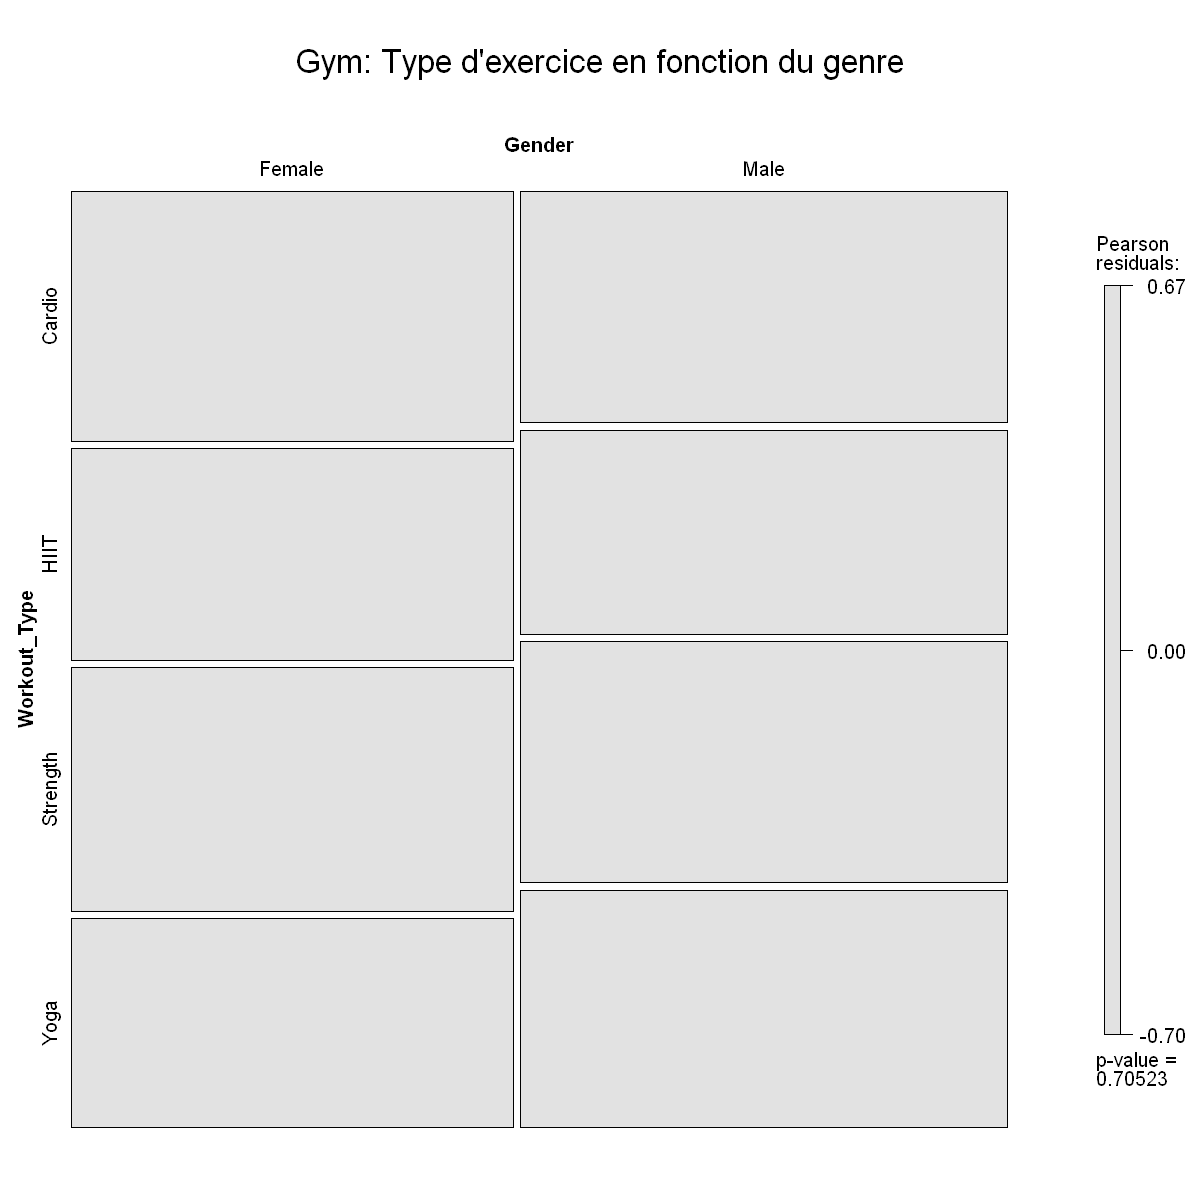

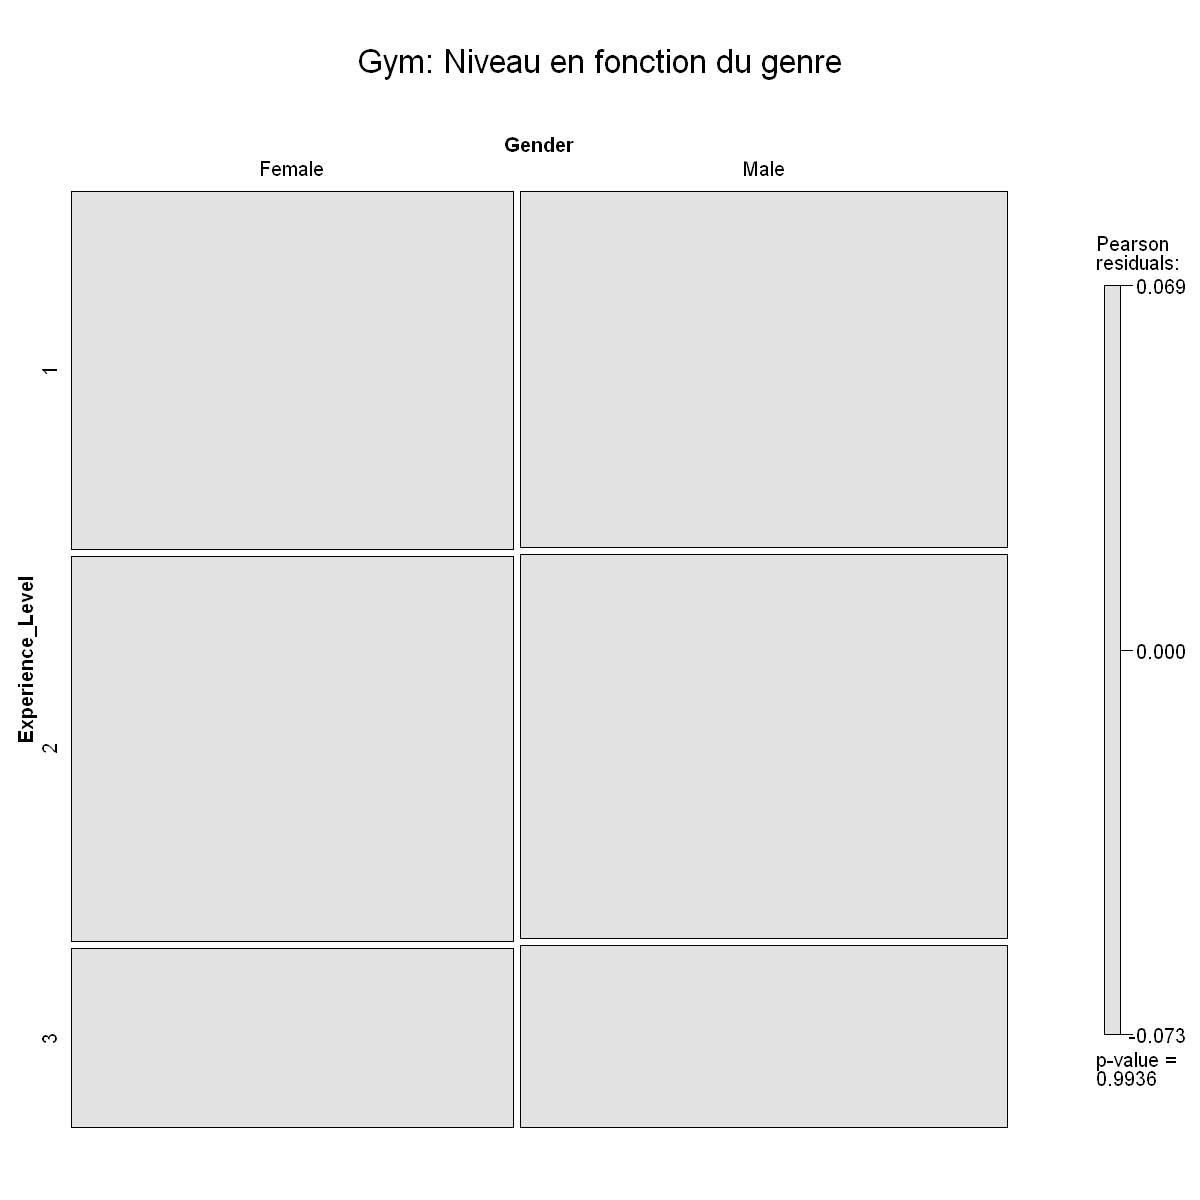

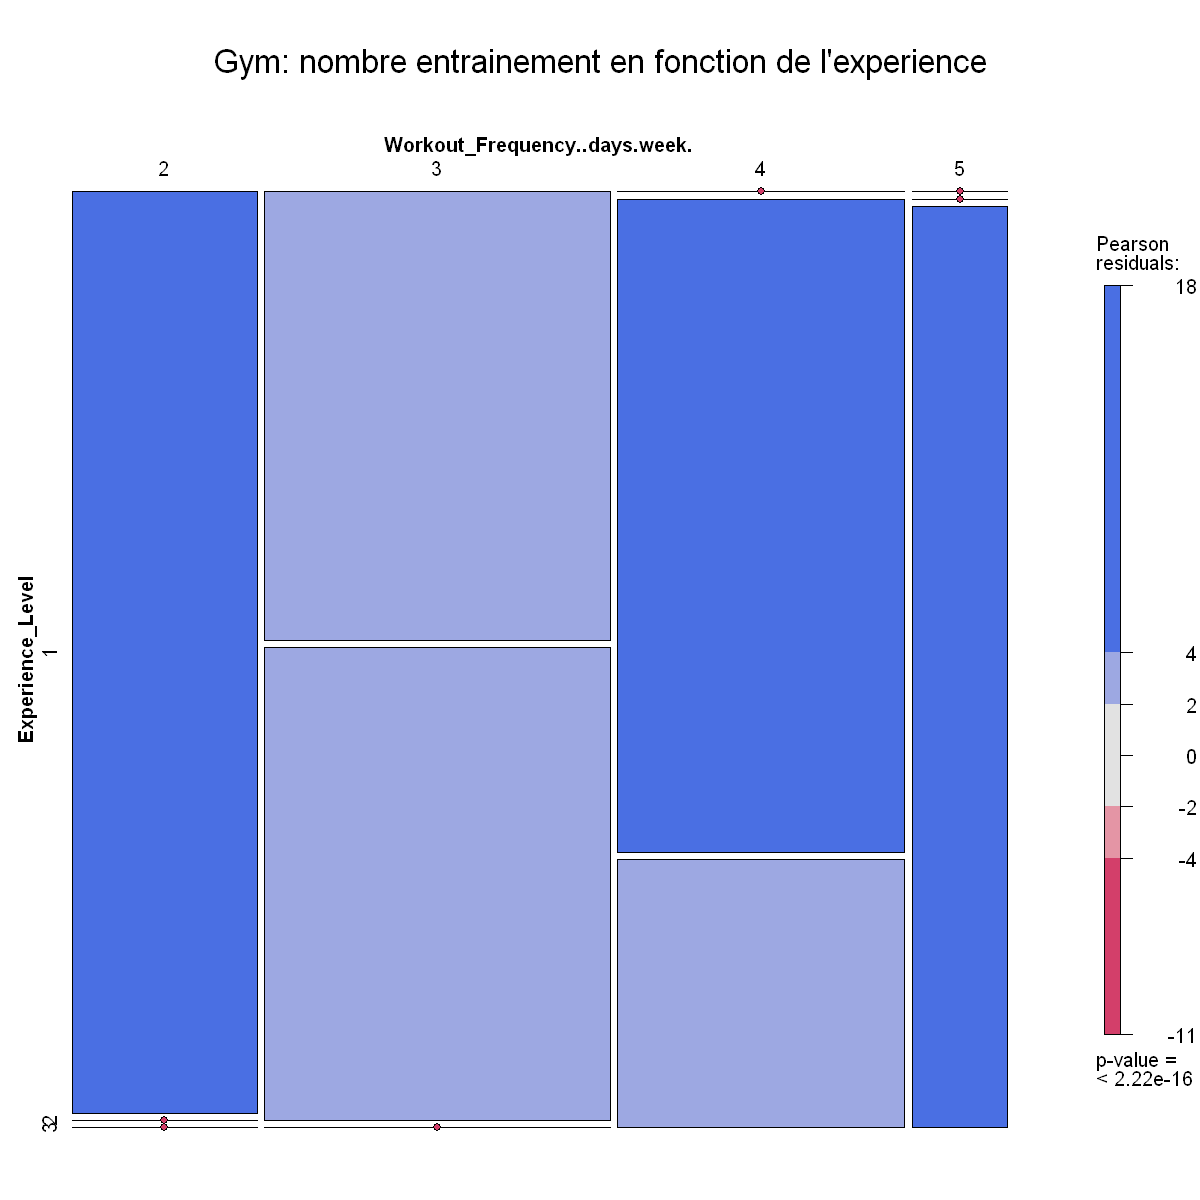

In [17]:
mosaic( xtabs(~Gender + Workout_Type, data = gym), shade = TRUE, ,
            split_vertical = TRUE,
            main="Gym: Type d'exercice en fonction du genre")

mosaic( xtabs(~Gender + Experience_Level, data = gym),  shade = TRUE, ,
            split_vertical = TRUE,
            main="Gym: Niveau en fonction du genre")
mosaic( xtabs(~Workout_Frequency..days.week. + Experience_Level, data = gym),  shade = TRUE, ,
            split_vertical = TRUE,
            main="Gym: nombre entrainement en fonction de l'experience")

Ici, il y a 3 différents cas qui correspondent à 3 niveaux de p-valeurs : 
1) Quand on compare le niveau d'expérience selon le genre, on remarque qu'il n'y a pas du tout de dépendance entre ces 2 variables car il y a quasiment aucune différence selon le genre. On le confirme avec une p-valeur presque égale à 1. 
2) Quand on compare le type de d'entrînement effectué selon le genre, il n'y a toujours pas de dépendance forte mais il y a quand même quelques légères différences. On a donc une p-valeur moins proche de 1.
3) Enfin, si on compare le niveau d'expérience selon le nombre d'entrainements par semaine, il y a clairement une dépendance significative entre ces 2 variables. En effet, la p_value<2.22e-16 nous le confirme. Cette p valeur correspond à la p-valeur d'un test de chi deux d'indépendance réalisé entre les deux variables qualitatives que l'on compare dans ce graphique. Donc il y a une forte dépendance entre le nombre d'entraînements par semaine et le niveau d'expérience, ce qui est cohérent.

On confirme notre hypothèse en affichant la table de contingence

In [18]:
tab <- table(gym$Experience_Level, gym$Workout_Frequency..days.week.)
tab

# Appliquer le test du chi carré
test <- chisq.test(tab)
print(test)

   
      2   3   4   5
  1 197 179   0   0
  2   0 189 217   0
  3   0   0  89 102


	Pearson's Chi-squared test

data:  tab
X-squared = 1015, df = 6, p-value < 2.2e-16



Pour éviter d'afficher toutes les mosaics plots, on crée ci-dessous une fonction qui va effectuer un test de chi deux pour chacune de nos variables qualitatives 2 à 2 et qui va retenir uniquement les tests pour lesquels la p-valeurs est inférieur à 0.05 i.e.: les variables pour lesquelles il y a une forte dépendance au risque 5%.

In [19]:
# Sélectionner les variables qualitatives dans le jeu de données
quali_vars <- sapply(gym, is.factor)

# Récupérer les noms des variables qualitatives
quali_var_names <- names(gym)[quali_vars]

# Appliquer le test du chi carré pour chaque paire de variables qualitatives
for (i in 1:(length(quali_var_names)-1)) {
  for (j in (i+1):length(quali_var_names)) {
    # Créer un tableau de contingence entre les deux variables
    contingency_table <- table(gym[[quali_var_names[i]]], gym[[quali_var_names[j]]])
    
    # Appliquer le test du chi carré
    test <- chisq.test(contingency_table)
    
    # Vérifier si la p-valeur est inférieure à 0.05
    if (test$p.value < 0.05) {
      # Afficher le nom des variables et les résultats du test si p-valeur < 0.05
      cat("\n--- Test du Chi² entre", quali_var_names[i], "et", quali_var_names[j], "---\n")
      print(test)
    }
  }
}



--- Test du Chi² entre Workout_Frequency..days.week. et Experience_Level ---

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 1015, df = 6, p-value < 2.2e-16



Le seul test où il y a une forte dépendance est celui que nous avons déjà fait précédemment entre le nombre d'entraînements et le niveau d'expérience.

### 3.3 Comparaison quanti / quali 

On s'intéresse maintenant aux effets d’une catégorie sur une variable quantitative. Pour cela on peut commencer par faire des boxplots croisés qui nous permettent de visualiser la distribution d’une variable quantitative pour chaque modalité de la variable qualitative.

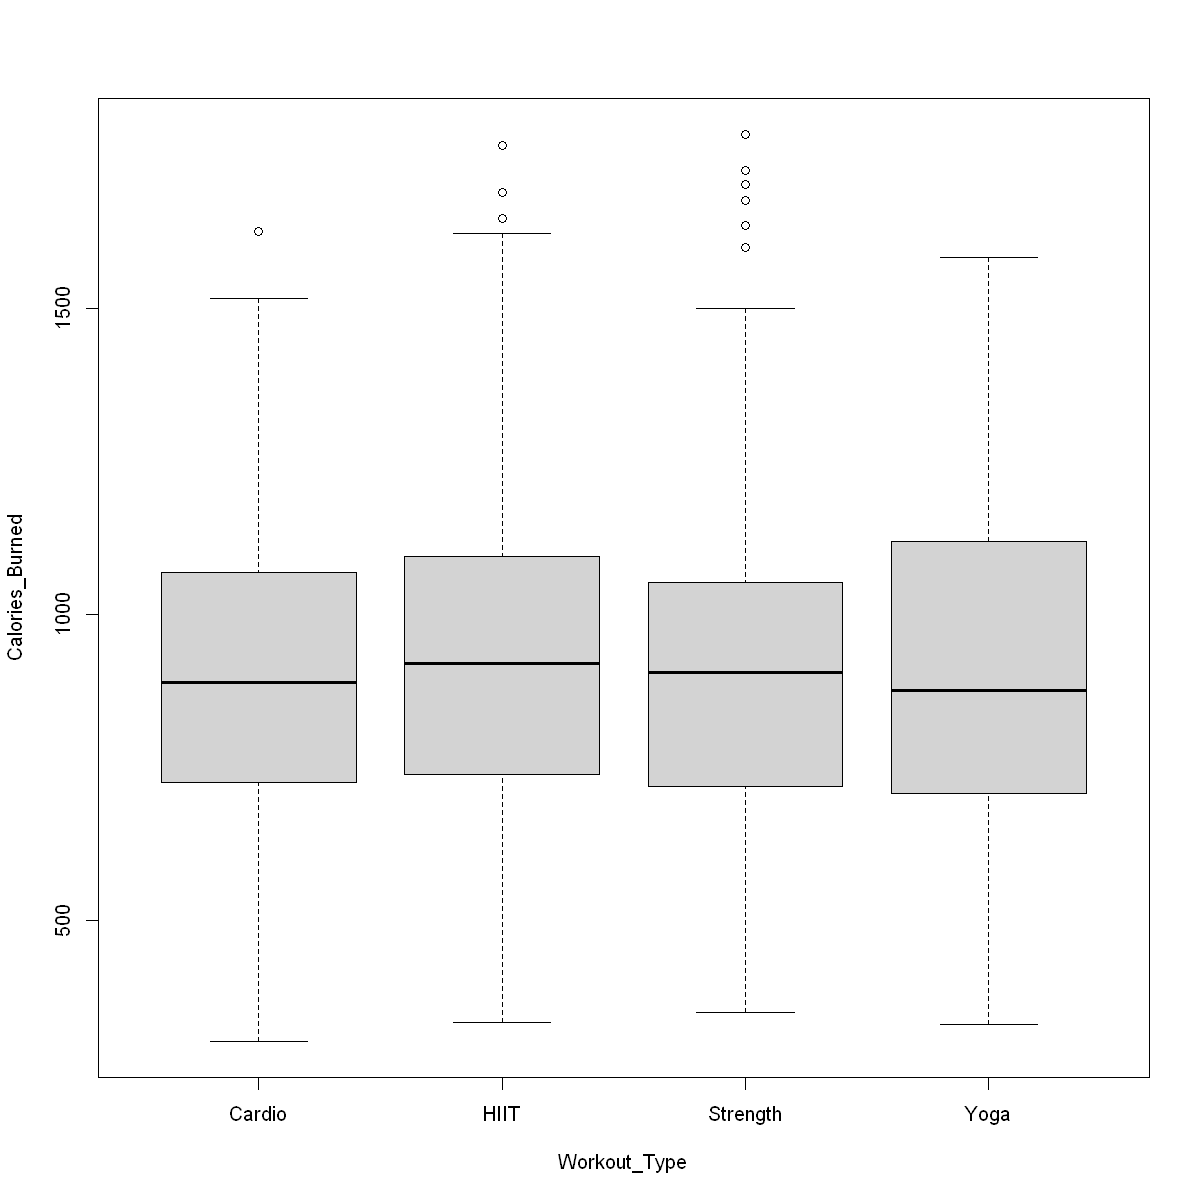

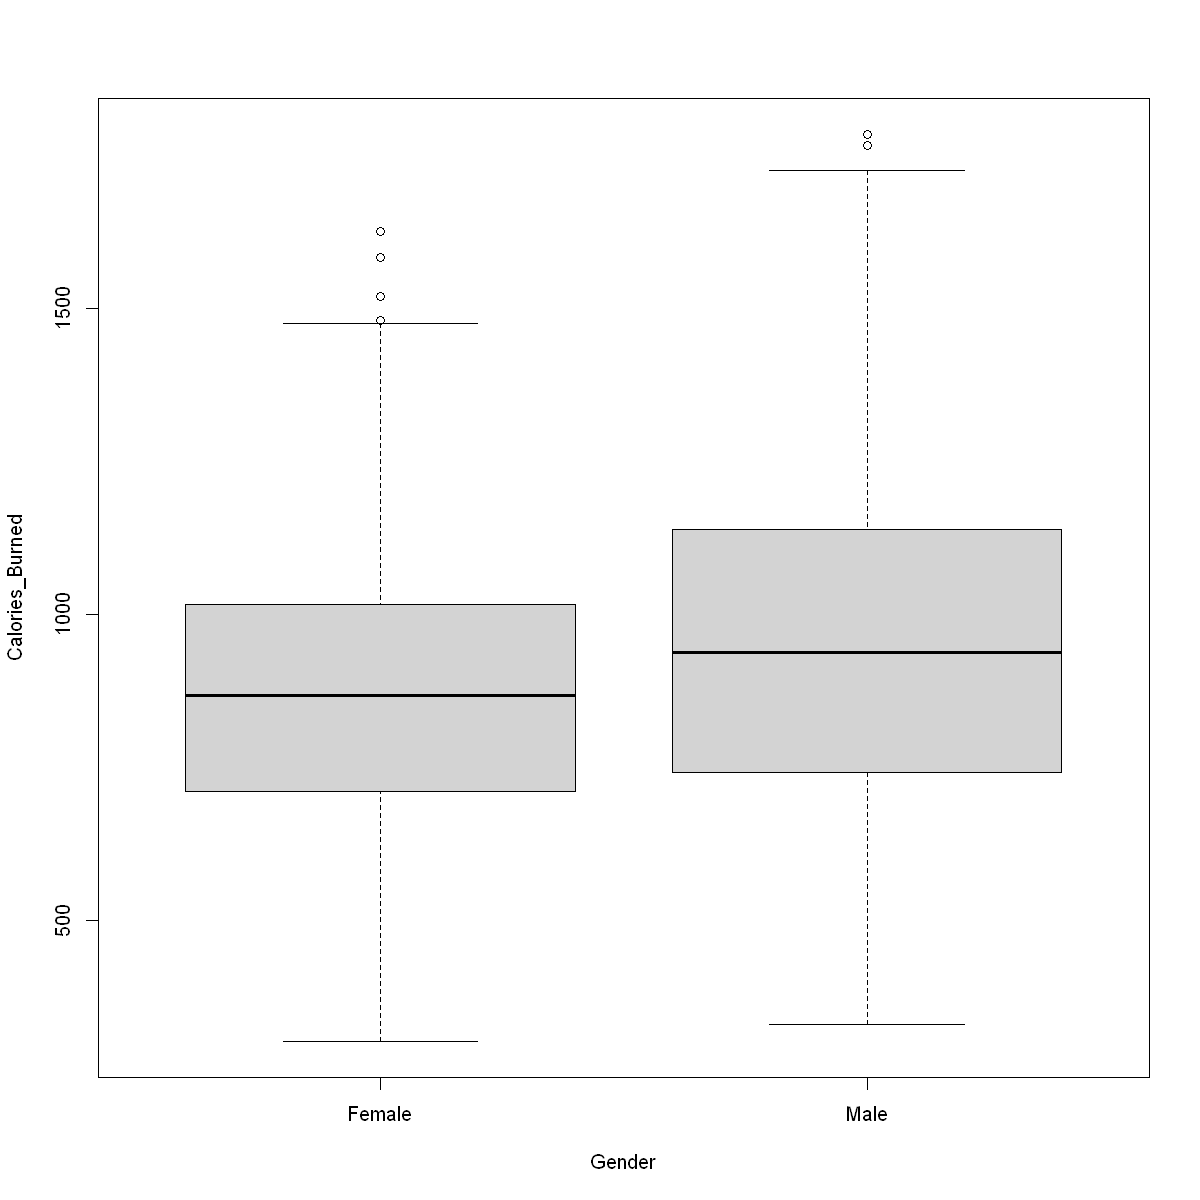

In [20]:
boxplot(Calories_Burned ~ Workout_Type, data = gym)
boxplot(Calories_Burned ~ Gender, data = gym)

Le type de Workout ne semble pas beaucoup influencer le nombre de calories brulées. Par contre, le nombre de calories brulées semble varier selon le genre.


On peut aussi faire un violin plot qui est une extension du boxplot qui montre aussi la densité des données.

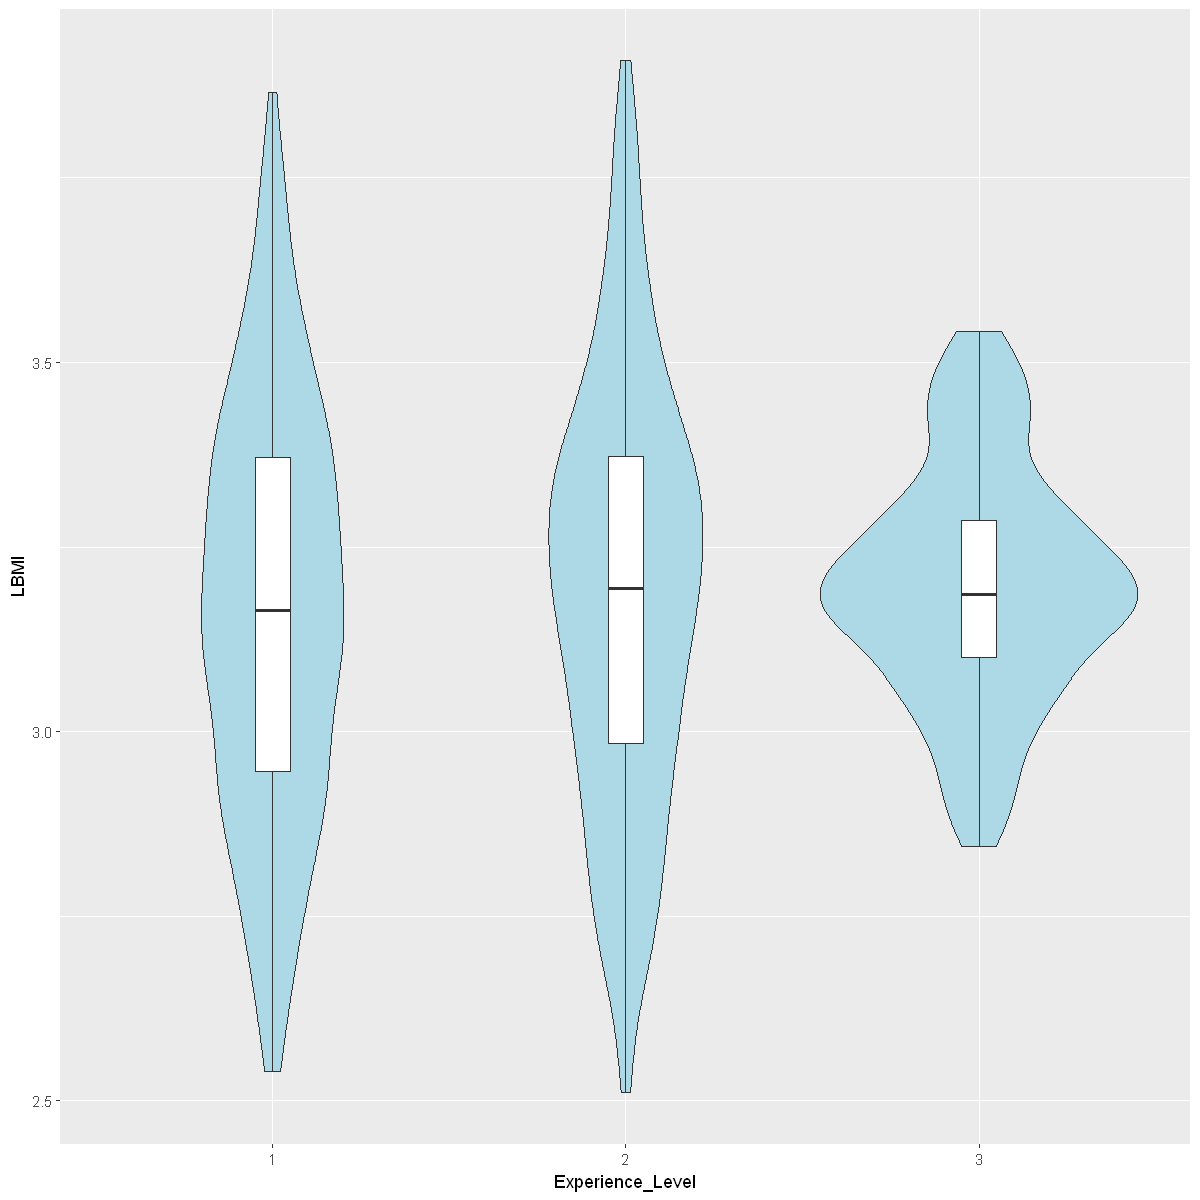

In [21]:
ggplot(gym, aes(x = Experience_Level, y = LBMI)) +
  geom_violin(fill = "lightblue") + geom_boxplot(width = 0.1)

On peut aussi afficher les moyennes et écarts-types par groupe afin de résumer numériquement la distribution de la variable quantitative pour chaque modalité de la variable qualitative.

In [22]:
aggregate(Calories_Burned ~ Experience_Level, data = gym, FUN = function(x) c(mean = mean(x), sd = sd(x)))

Experience_Level Calories_Burned    
1 1                 726.3750, 227.3433
2 2                 901.9187, 152.6454
3 3                1265.3403, 186.8345

### 4. ACP

#### 4.1 Choix des axes principaux

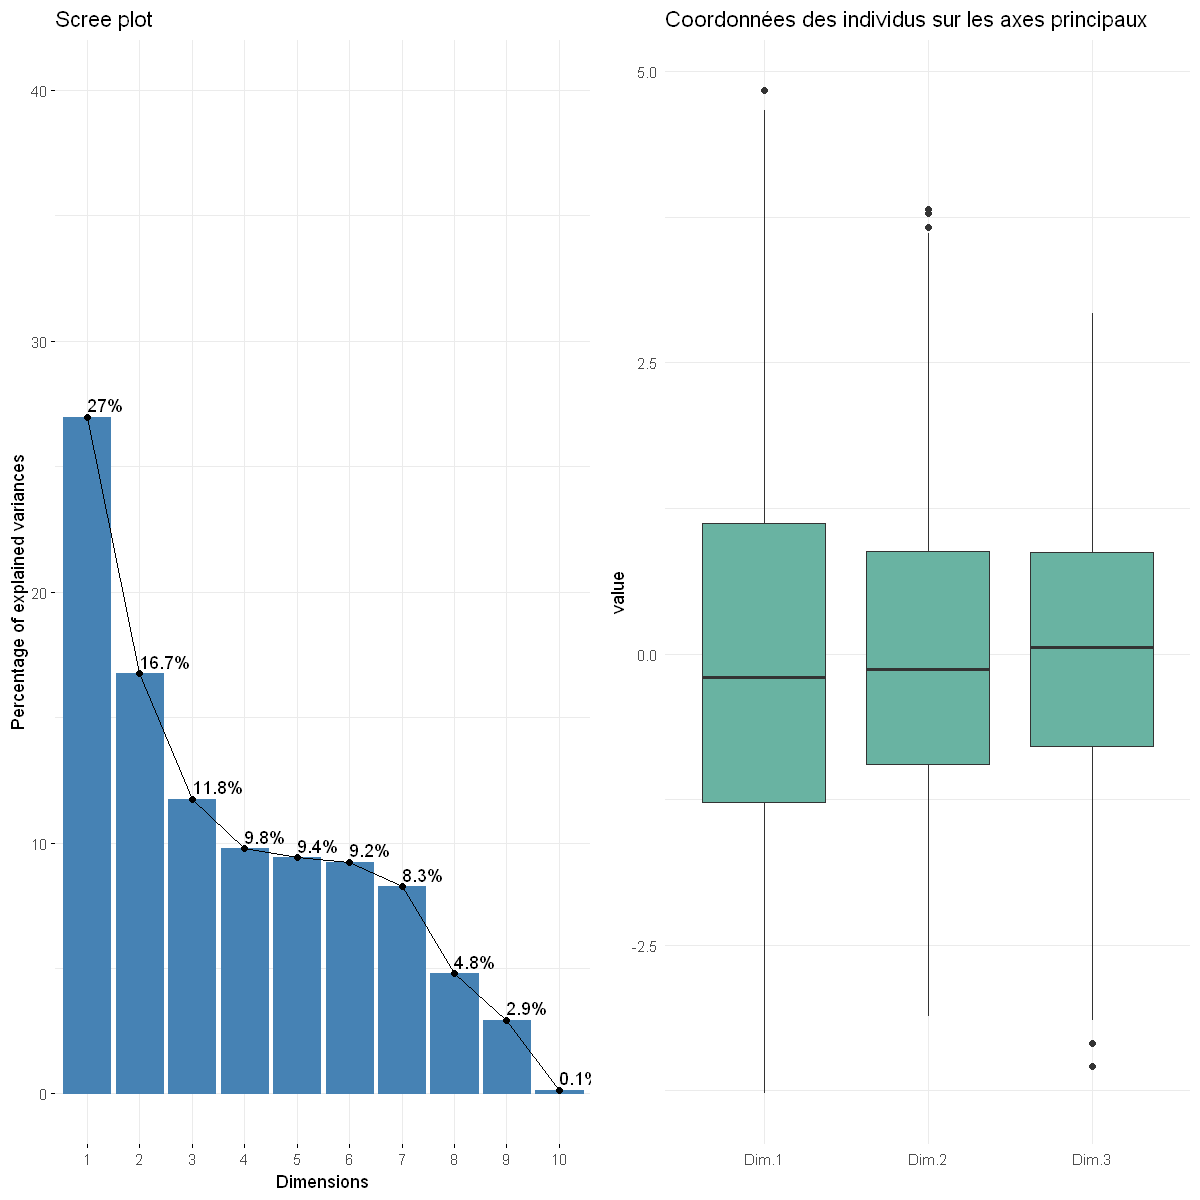

In [23]:
# ACP
acp <- PCA(gym[, c(1,3:8,10,11,14,15)], scale.unit = TRUE, graph = FALSE, ncp = 3)

# histogramme des valeurs propres
g1 <- fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))

# Boxplot des coordonnées des individus
g2 <- ggplot(melt(acp$ind$coord), aes(x = Var2, y = value)) +
  geom_boxplot(fill = "#69b3a2") +
  xlab("") +
  theme_minimal() +
  ggtitle("Coordonnées des individus sur les axes principaux")

# Affichage côte à côte
grid.arrange(g1, g2, ncol = 2)


D'après le graphique "Scree plot" nous savons que les 3 premières dimensions de notre ACP définissent 55% de la varaince (variance cumulée) ce qui est suffisant pour notre analyse. C’est un bon compromis entre réduction de dimension et information conservée pour effectuer des premières analyses. Nous garderons donc 3 composantes.

#### 4.2 Interprétation des Axes 

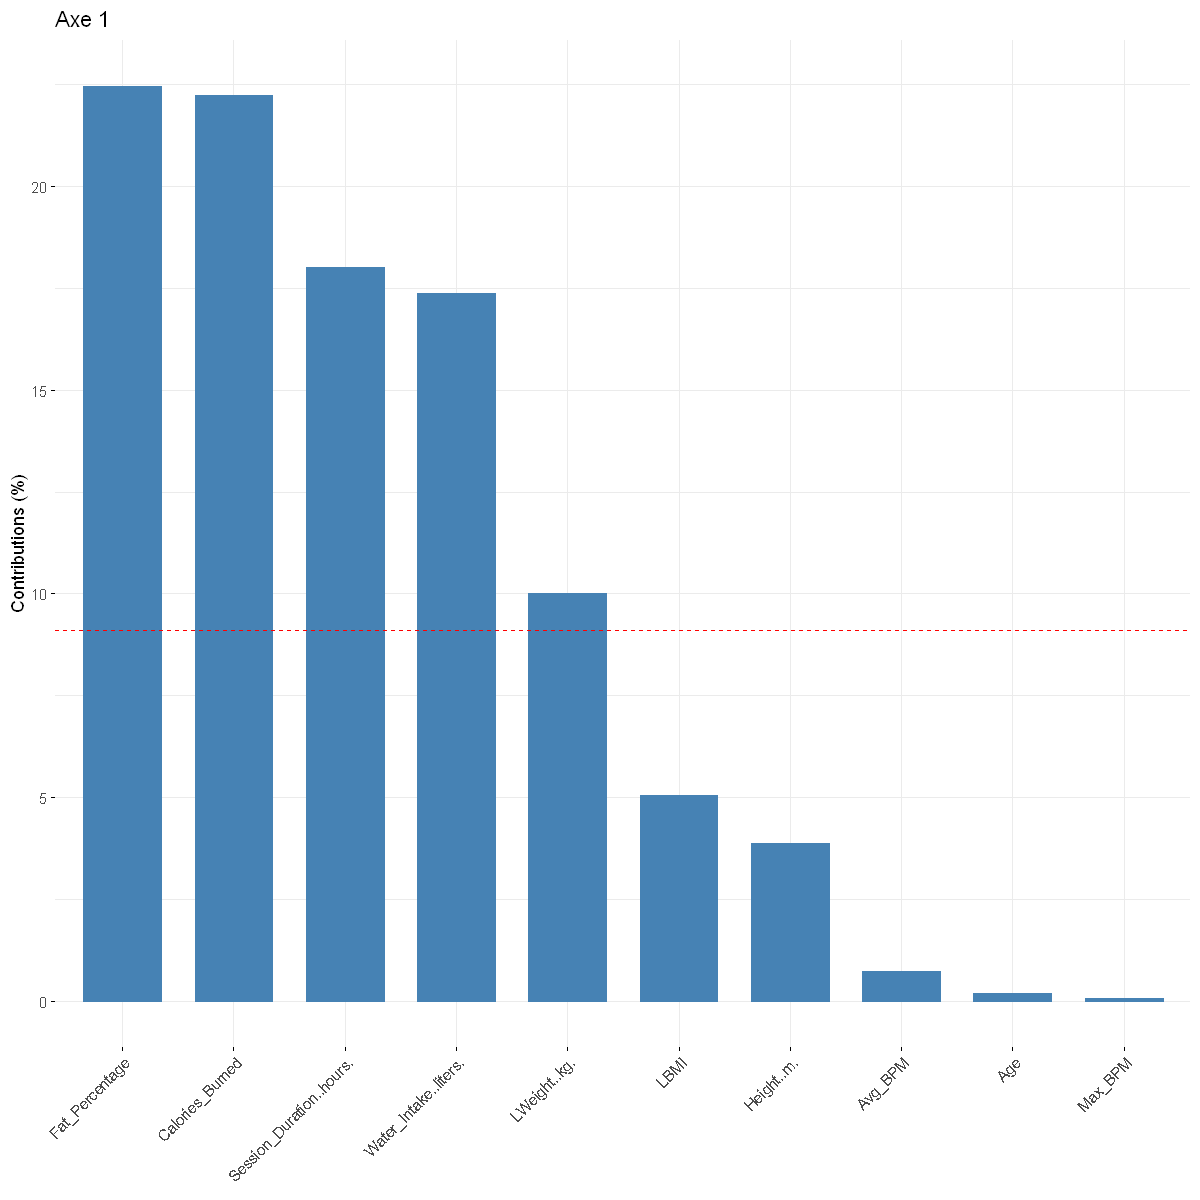

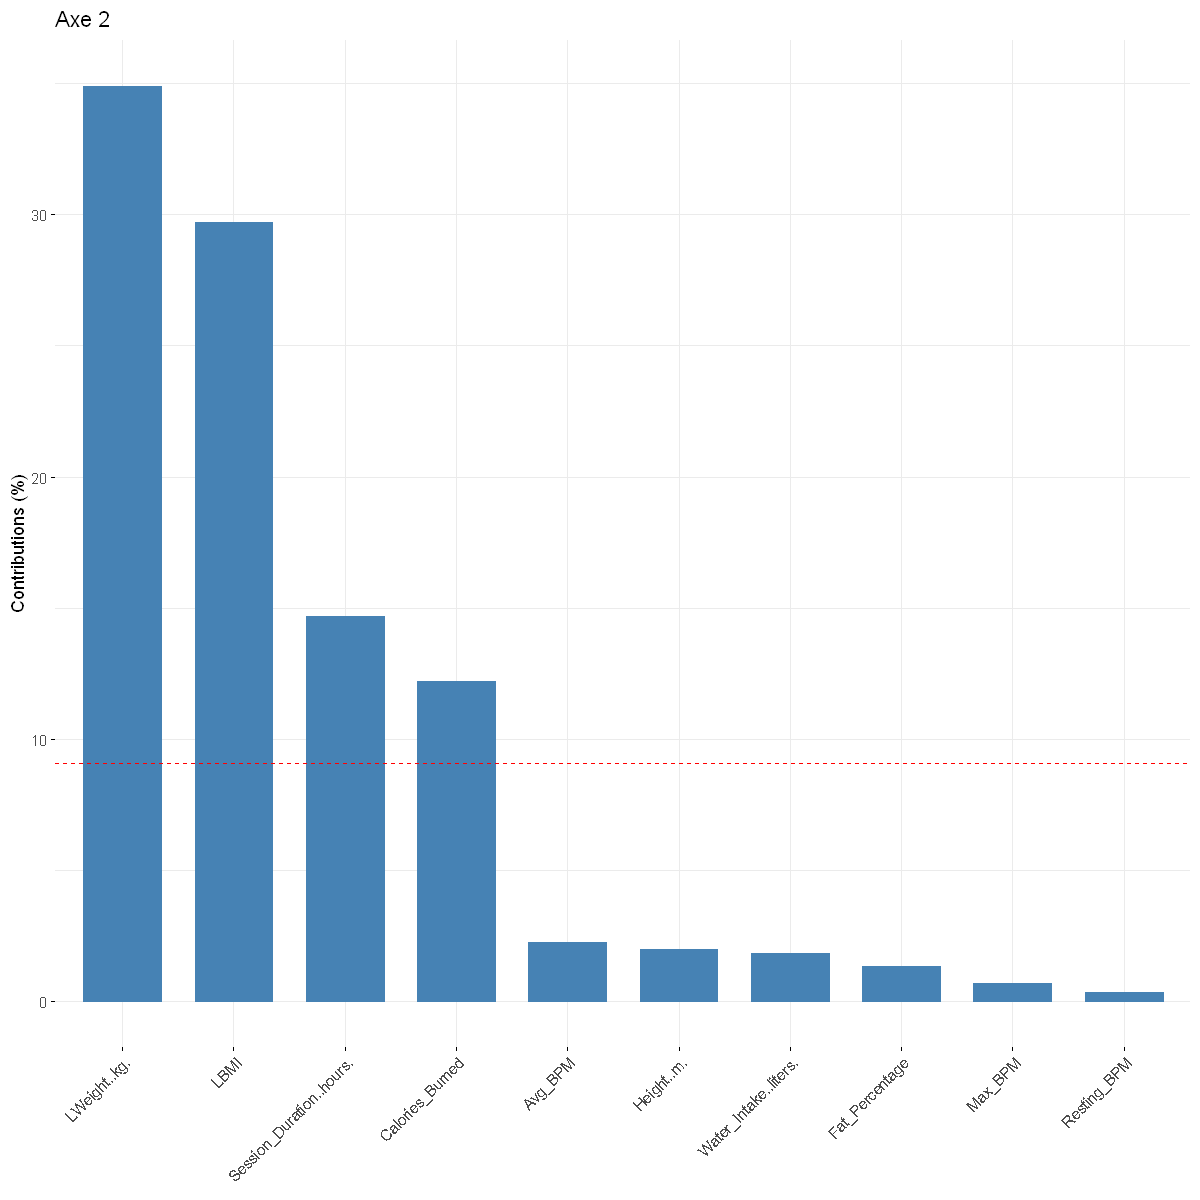

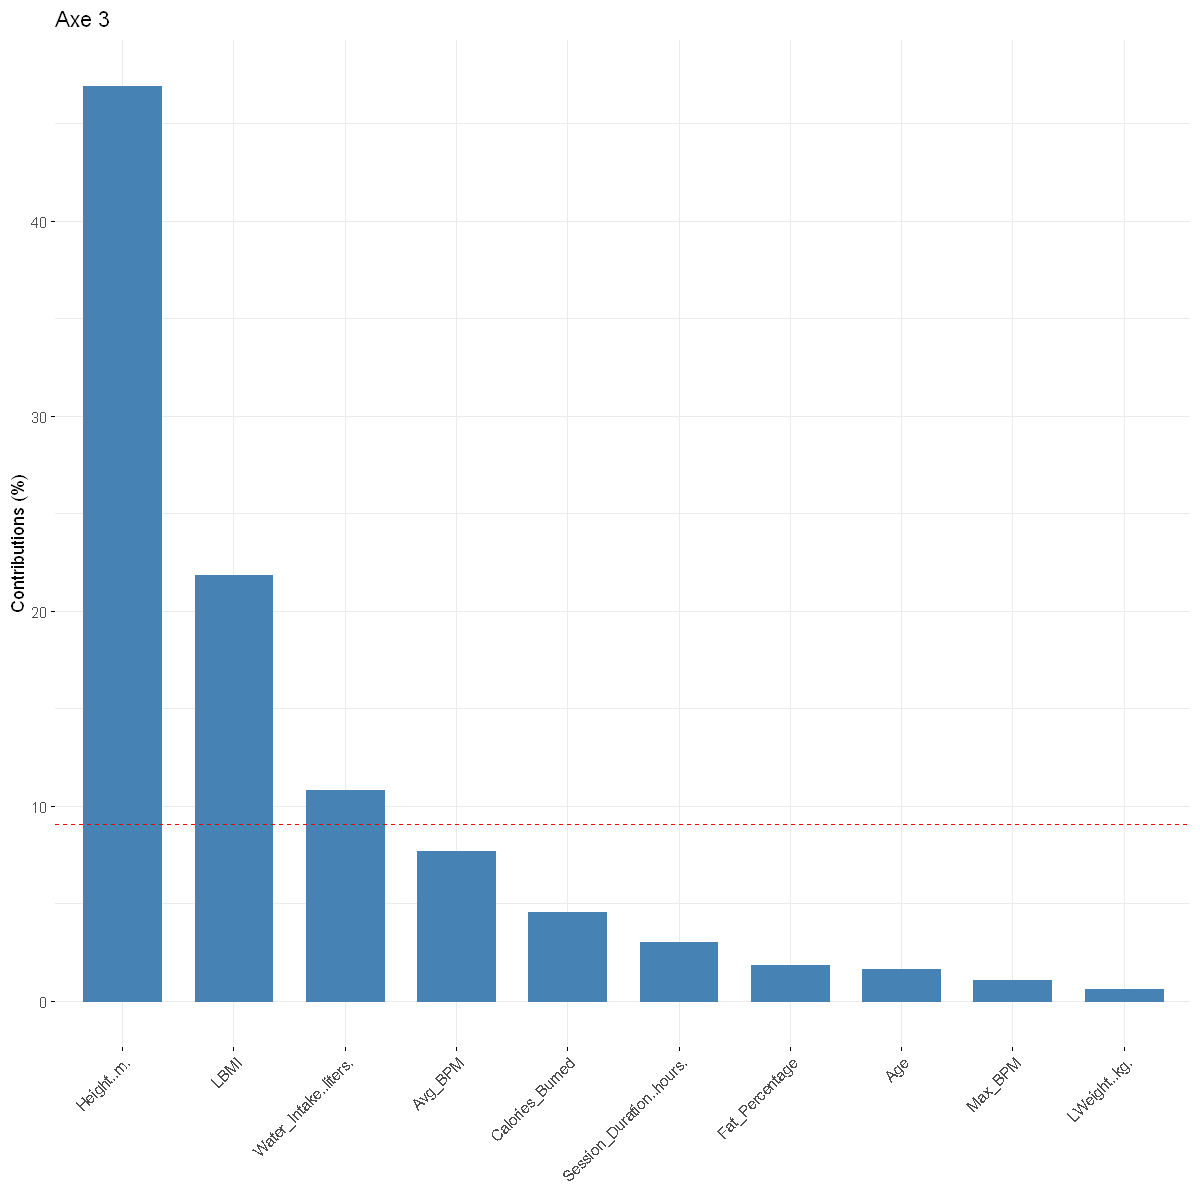

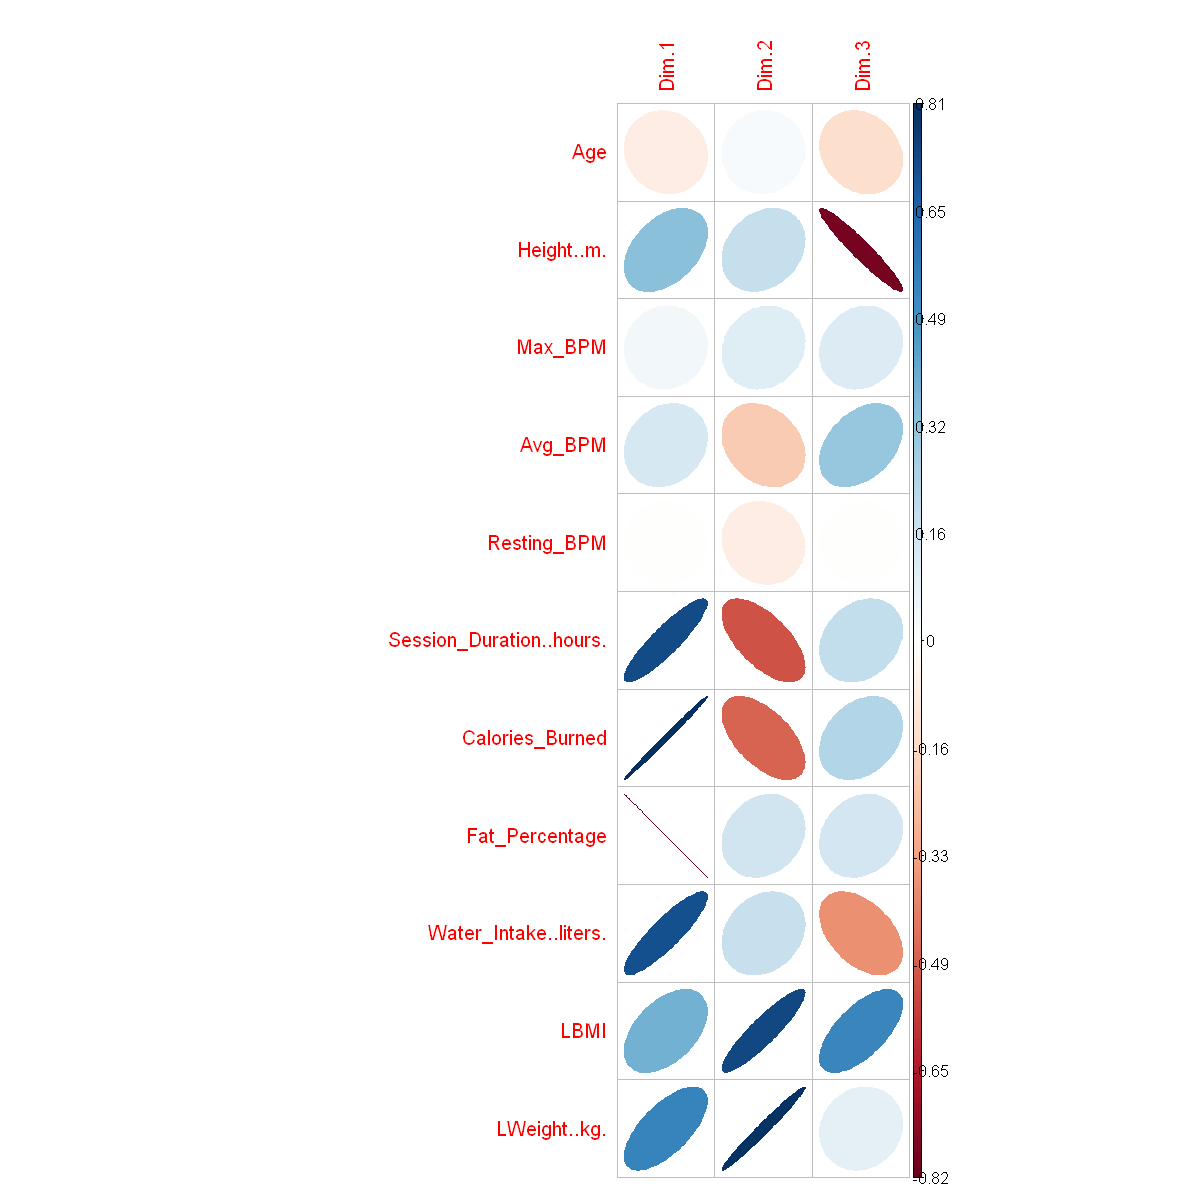

In [24]:
# Contributions des variables à chaque axe
fviz_contrib(acp, choice = "var", axes = 1, top = 10, title = "Axe 1")
fviz_contrib(acp, choice = "var", axes = 2, top = 10, title = "Axe 2")
fviz_contrib(acp, choice= "var", axes = 3, top = 10, title = "Axe 3")

# Corrélogramme des contributions des variables
corrplot(acp$var$cor, is.corr = FALSE, method = "ellipse")

Nous observons bien que chaque graphique peut être interprété de la même facon que la matrice de corrélation :

* Axe 1 : Calories burned , Fat Pourcentage, Session Duration, Water intake, LWeight
* Axe 2 : LWeight, LBMI, Session duration, Calories Burned
* Axe 3 : Height, LBMI, Water Intake

Les axes 1 et 2 sont très corrélés à Calories Burned.

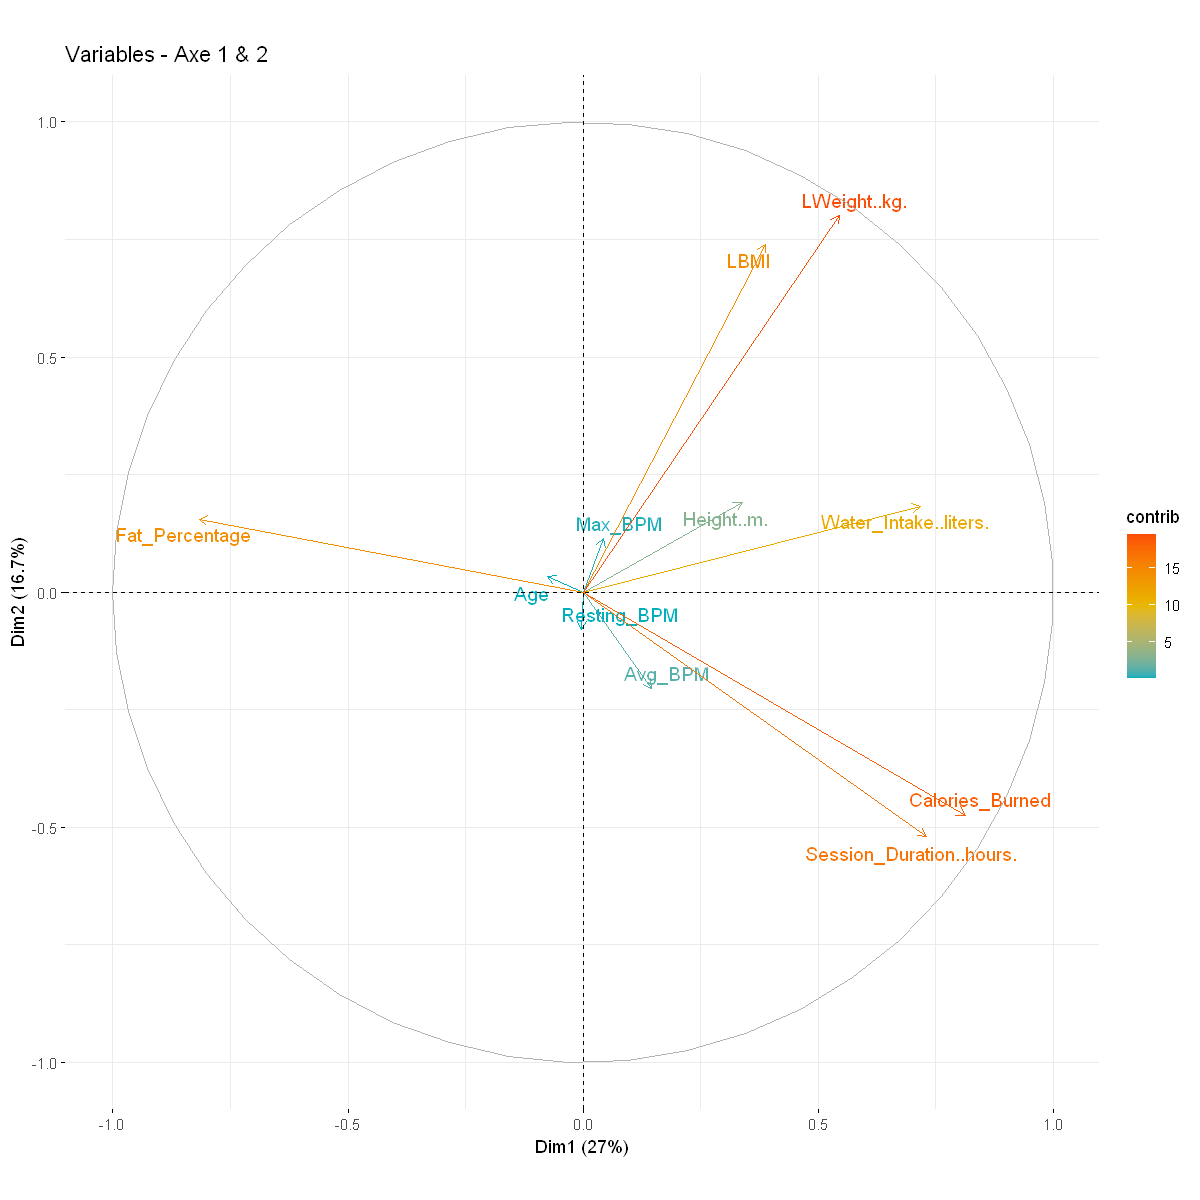

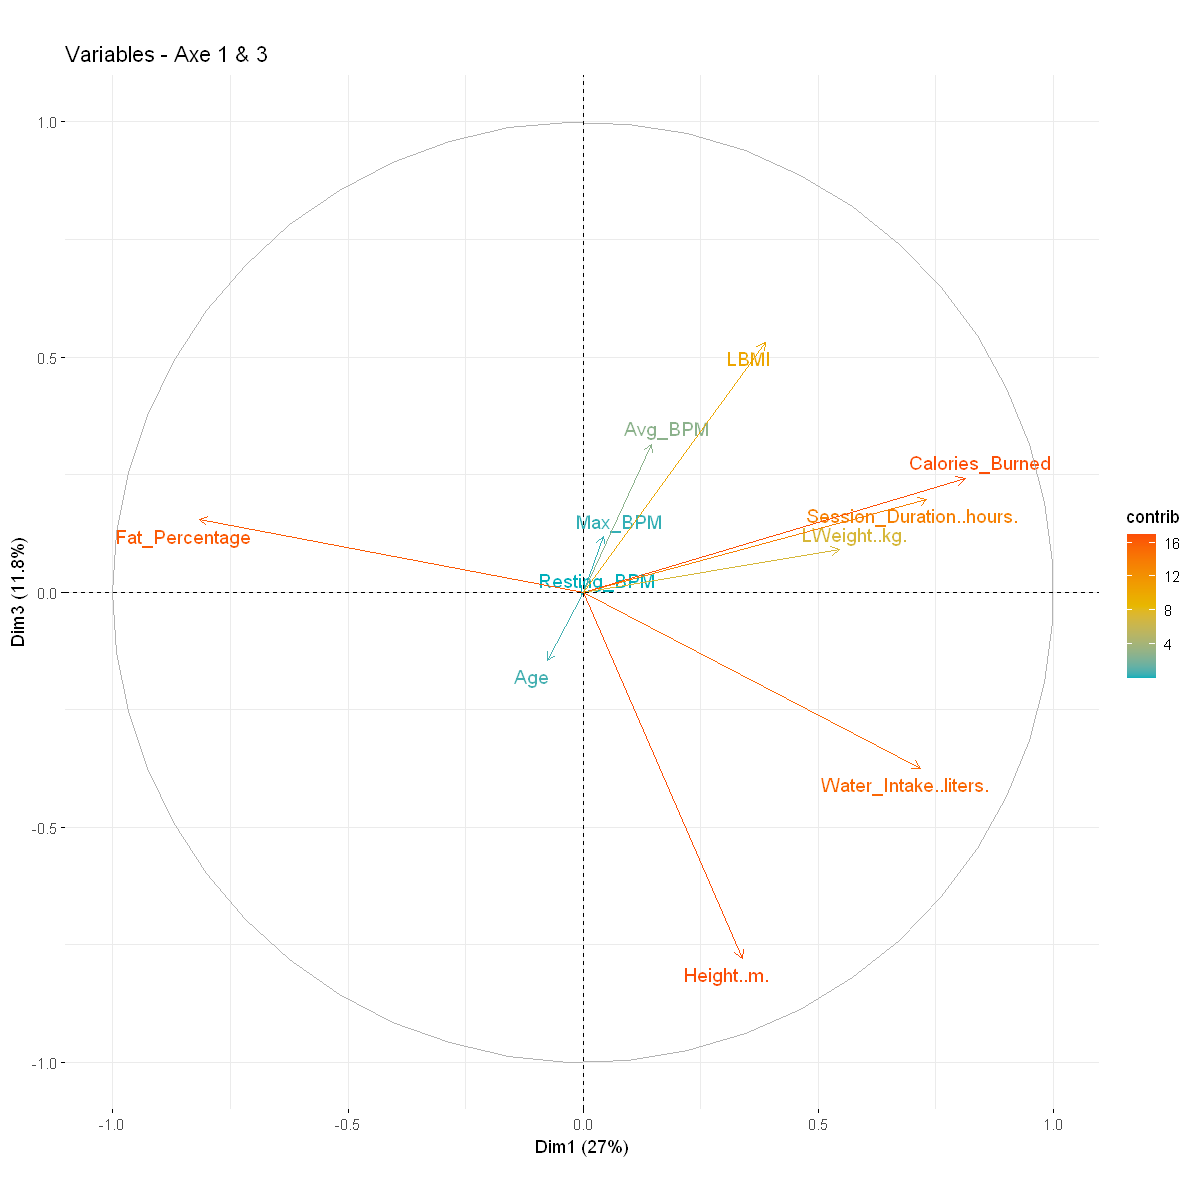

In [25]:
# Variables : plan factoriel 1-2 
fviz_pca_var(acp, col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, title = "Variables - Axe 1 & 2")


# Variables sur le plan 1-3
fviz_pca_var(acp, axes = c(1,3), col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, title = "Variables - Axe 1 & 3")


Analysons les dépendances éventuelles entre les variables à prédire (calories burned et Experience Level) et les variables explicatives : 

* Le nombre de calories brulées est positivement corrélé à la durée de la session et négativement corrélé au pourcentage de gras. Il est intéressant de noter que la taille et le poids dépendent peu des calories brulées.

* Pour analyser le niveau d'experience, nous habillons les graphes des individus de l'ACP selon le niveau d'expérience ci dessous.


In [ ]:
fviz_pca_ind(acp,
             label = "none",
             habillage = as.factor(gym$Experience_Level),
             addEllipses = TRUE,
             axes = c(1,2),
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus selon Experience_Level (Axes 1 & 2)")

fviz_pca_ind(acp,
             label = "none",
             habillage = as.factor(gym$Experience_Level),
             addEllipses = TRUE,
             axes = c(1,3),
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus selon Experience_Level (Axes 1 & 3)")

fviz_pca_ind(acp,
             label = "none",
             habillage = as.factor(gym$Experience_Level),
             addEllipses = TRUE,
             axes = c(2,3),
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus selon Experience_Level (Axes 2 & 3)")




Sur les 2 premiers graphes, on peut voir que seule la dimension 1 peut nous permettre de séparer la classe 3 des deux autres classes. On peut donc interpréter que Experience_Level peut dépendre des variables explicatives de la dimension 1.

<h1 style="color:red">II- Prédiction du nombre de calories brulées</h1>


Nous considérons maintenant le problème de la prédiction de la variable Calories_Burned à partir des autres
variables du point de vue de l’apprentissage automatique. L’objectif est de déterminer les meilleures performances que nous pouvons atteindre, et les modèles qui les atteignent. 

## 2.1 Division du jeu de données en un échantillon d'apprentissage et un échantillon test
Nous divisons le jeu de données en un échantillon d’apprentissage et un échantillon test. Nous prenons un 
pourcentage de 20% pour l’échantillon test.


In [26]:
set.seed(235)
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test, ici 20%
npop <- nrow(gym) 
nvar <- ncol(gym) 

ntest <- ceiling(npop * test.ratio) #Calcule le nombre d’individus dans l’échantillon de test. 

# indices de l'échantillon test
testi <- sample(1:npop, ntest) #Tire au hasard ntest indices parmi 1:npop (toutes les lignes du dataset).

# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) #etdiff(1:npop, testi) renvoie toutes les lignes qui ne sont pas dans testi, donc celles pour l'apprentissage.

In [28]:
# construction de l'échantillon d'apprentissage
datappr0 <- gym[appri, ] 
# construction de l'échantillon test
datestr0 <- gym[testi, ] 
# vérification
str(datappr0)
str(datestr0)

'data.frame':	778 obs. of  15 variables:
 $ Age                          : int  56 46 32 38 56 36 40 28 28 41 ...
 $ Gender                       : Factor w/ 2 levels "Female","Male": 2 1 1 2 1 2 1 2 2 2 ...
 $ Height..m.                   : num  1.71 1.53 1.66 1.79 1.68 1.72 1.51 1.94 1.84 2 ...
 $ Max_BPM                      : int  180 179 167 188 168 174 189 185 169 179 ...
 $ Avg_BPM                      : int  157 151 122 158 156 169 141 127 136 136 ...
 $ Resting_BPM                  : int  60 66 54 68 74 73 64 52 64 69 ...
 $ Session_Duration..hours.     : num  1.69 1.3 1.11 0.64 1.59 1.49 1.27 1.03 1.08 1.18 ...
 $ Calories_Burned              : num  1313 883 677 556 1116 ...
 $ Workout_Type                 : Factor w/ 4 levels "Cardio","HIIT",..: 4 2 1 3 2 1 1 3 1 2 ...
 $ Fat_Percentage               : num  12.6 33.9 33.4 29.2 15.5 21.3 30.6 28.9 29.7 27.6 ...
 $ Water_Intake..liters.        : num  3.5 2.1 2.3 2.8 2.7 2.3 1.9 2.6 2.7 3.7 ...
 $ Workout_Frequency..days.week.:

On normalise l'échantillon d'apprentissage et de test pour éviter le déséquilibre entre les variables : certaines variables comme Height..m. (de l'ordre de 1-2) et Calories_Burned (de l'ordre de centaines ou milliers) ont des échelles très différentes.
Cela permet aussi d'améliorer la convergence de certains algorithmes (SVM, réseaux de neurones ou reg logistique par exemple) et d'améliorer les performances.

On ne normalise pas les variables qualitatives donc on va les exclure de la normalisation. On les exclut seulement de la normalisation mais pas des échantillons tests et apprentissages. Pour cela, on récupère les identifiants des colonnes de toutes les variables qualitatives :



In [29]:
which(sapply(datappr0, is.factor))
cat("Calories_Burned : " ,which(colnames(datappr0) == "Calories_Burned"))

Gender                  Workout_Type 
                            2                             9 
Workout_Frequency..days.week.              Experience_Level 
                           12                            13

Calories_Burned :  8

In [30]:
#échantillon appr
datappr=datappr0

#on ne modifie pas les variables quali + calories brulées
datappr[,-c(2,8,9,12,13)]=scale(datappr0[,-c(2,8,9,12,13)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr=datestr0
datestr[,-c(2,8,9,12,13)]=scale(datestr0[,-c(2,8,9,12,13)],
                            center=sapply(datappr0[,-c(2,8,9,12,13)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr0[,-c(2,8,9,12,13)],sd)) # on réduit avec les écart-types de l'échantillon d'apprentissage
summary(datappr)
summary(datestr)

      Age              Gender      Height..m.          Max_BPM        
 Min.   :-1.68603   Female:368   Min.   :-1.75705   Min.   :-1.73044  
 1st Qu.:-0.86543   Male  :410   1st Qu.:-0.82012   1st Qu.:-0.87212  
 Median : 0.03723                Median :-0.03934   Median : 0.07204  
 Mean   : 0.00000                Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.85783                3rd Qu.: 0.58528   3rd Qu.: 0.84454  
 Max.   : 1.67844                Max.   : 2.14683   Max.   : 1.61703  
    Avg_BPM          Resting_BPM       Session_Duration..hours.
 Min.   :-1.64966   Min.   :-1.64729   Min.   :-2.20804        
 1st Qu.:-0.87874   1st Qu.:-0.83521   1st Qu.:-0.60730        
 Median :-0.03774   Median :-0.02314   Median : 0.03299        
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000        
 3rd Qu.: 0.87334   3rd Qu.: 0.78894   3rd Qu.: 0.55687        
 Max.   : 1.78442   Max.   : 1.60101   Max.   : 2.15761        
 Calories_Burned    Workout_Type Fat_Percentage    Wate

      Age              Gender      Height..m.         Max_BPM        
 Min.   :-1.68603   Female: 94   Min.   :-1.7570   Min.   :-1.73044  
 1st Qu.:-0.86543   Male  :101   1st Qu.:-0.8982   1st Qu.:-0.87212  
 Median : 0.20135                Median :-0.3517   Median :-0.09962  
 Mean   : 0.05617                Mean   :-0.0958   Mean   :-0.11855  
 3rd Qu.: 0.93989                3rd Qu.: 0.5072   3rd Qu.: 0.67287  
 Max.   : 1.67844                Max.   : 2.1468   Max.   : 1.61703  
    Avg_BPM          Resting_BPM       Session_Duration..hours.
 Min.   :-1.64966   Min.   :-1.64729   Min.   :-2.17893        
 1st Qu.:-0.87874   1st Qu.:-0.69987   1st Qu.:-0.66551        
 Median : 0.03234   Median : 0.11221   Median : 0.00389        
 Mean   : 0.07978   Mean   : 0.03517   Mean   :-0.03253        
 3rd Qu.: 1.01350   3rd Qu.: 0.78894   3rd Qu.: 0.58598        
 Max.   : 1.78442   Max.   : 1.60101   Max.   : 2.07030        
 Calories_Burned    Workout_Type Fat_Percentage     Water_Inta

Avant de passer aux différents algorithmes, on définit une fonction tracant le graphe des résidus avec des couleurs et des échelles fixes sur les axes.

In [31]:
gplot.res <- function(x, y, titre = "titre") {
  ggplot(data.frame(x = x, y = y), aes(x, y)) +
    geom_point(col = "blue") +
    coord_cartesian(xlim = c(250, 1700), ylim = c(-155, 155)) +
    ylab("Résidus") +
    xlab("Valeurs prédites") +
    ggtitle(titre) +
    geom_hline(yintercept = 0, col = "red")}

##  2.2 Modèle linéaire (généralisé) avec/sans sélection de variables, avec/sans pénalisation


Dans cette première partie, nous allons nous intéresser aux différens types de modèles linéaires. 
L'objectif est d'estimer une relation linéaire entre les variables explicatives (ex. fréquence cardiaque, durée, âge...) et la variable cible (Calories_Burned).

### 2.2.1 Modèle linéaire

                               Df   Sum Sq  Mean Sq   F value   Pr(>F)    
Age                             1  1276747  1276747   868.731  < 2e-16 ***
Gender                          1  1396801  1396801   950.419  < 2e-16 ***
Height..m.                      1      130      130     0.088 0.766257    
Max_BPM                         1      321      321     0.219 0.640127    
Avg_BPM                         1  6885236  6885236  4684.891  < 2e-16 ***
Resting_BPM                     1    18071    18071    12.296 0.000481 ***
Session_Duration..hours.        1 47122528 47122528 32063.377  < 2e-16 ***
Workout_Type                    3     5711     1904     1.295 0.274876    
Fat_Percentage                  1     1552     1552     1.056 0.304412    
Water_Intake..liters.           1       37       37     0.025 0.873810    
Workout_Frequency..days.week.   3     2393      798     0.543 0.653113    
Experience_Level                2     3426     1713     1.166 0.312313    
LBMI                     

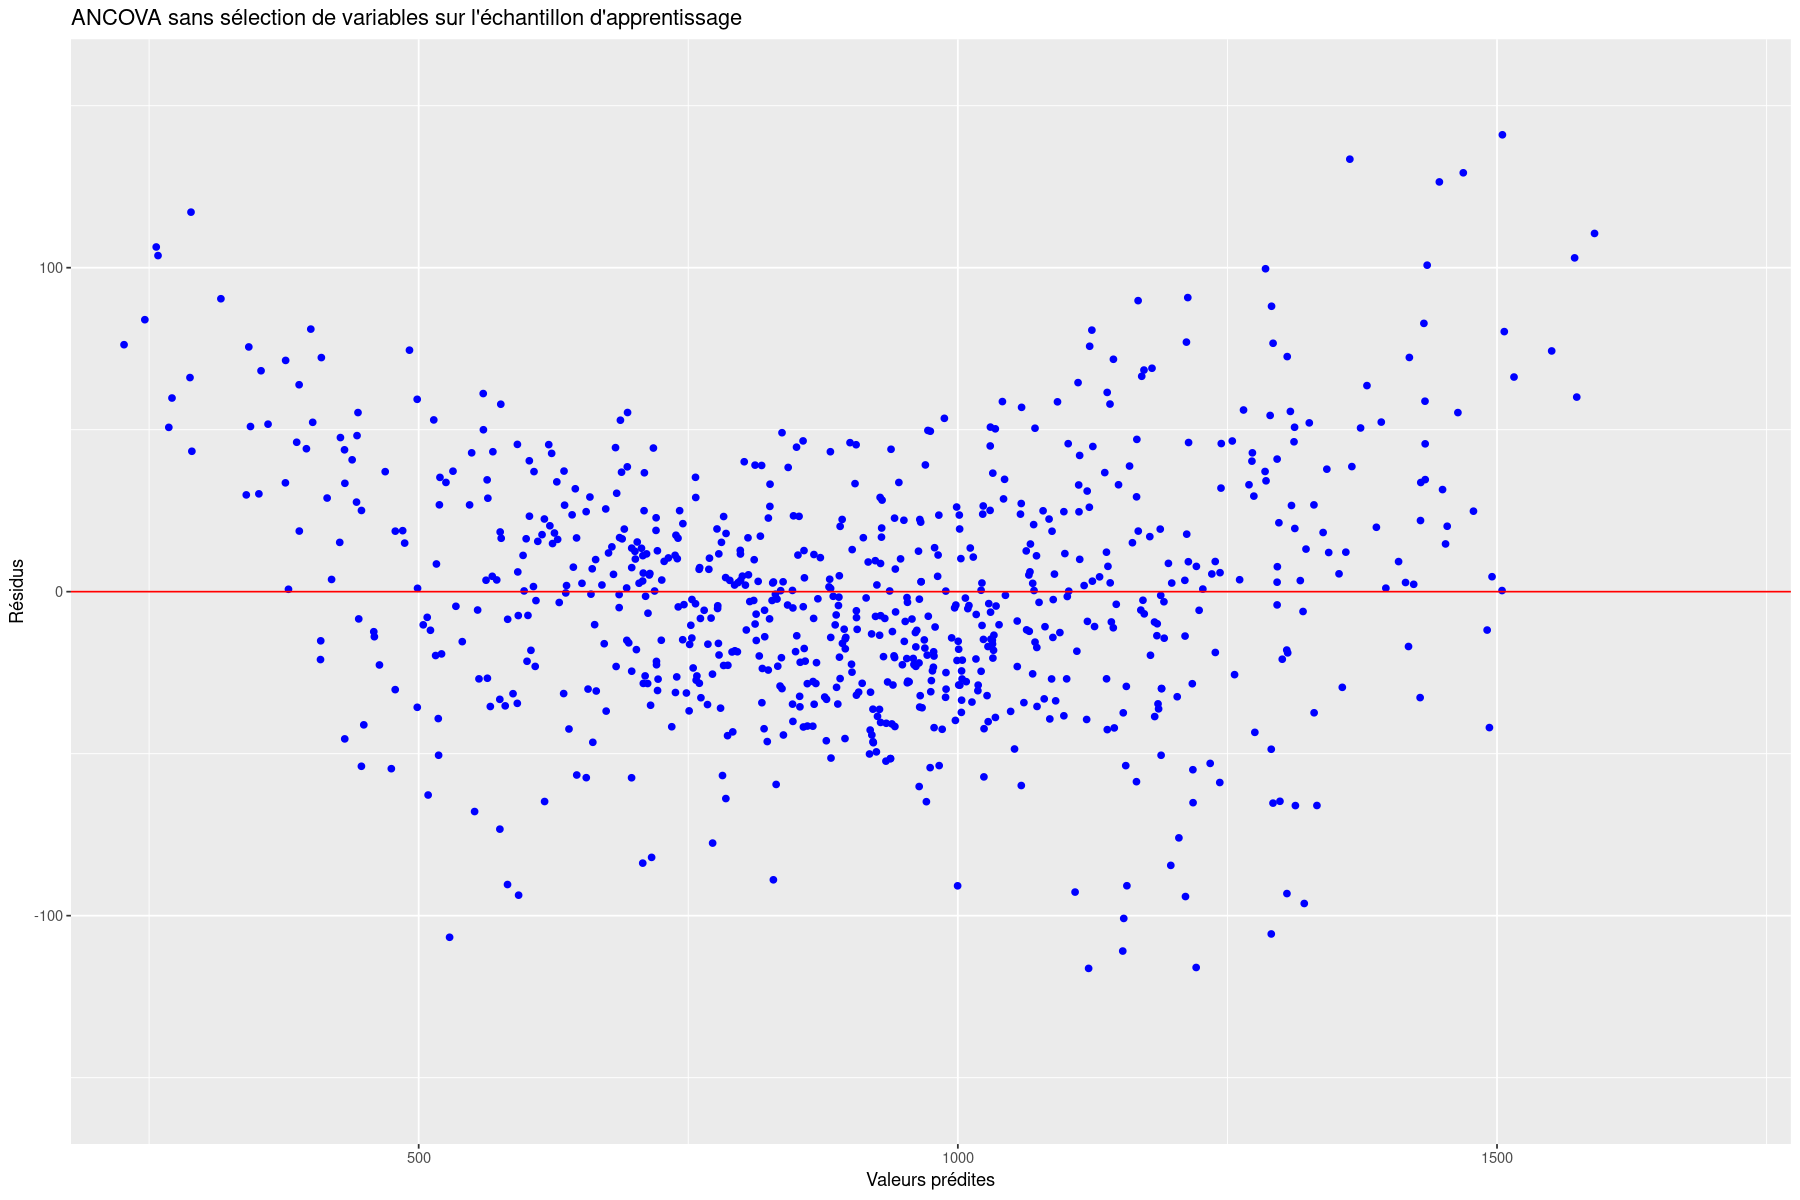

In [99]:
# estimation du modèle sans interaction
reg.lm <-aov(Calories_Burned ~ . , data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# Graphe des résidus.
gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables sur l'échantillon d'apprentissage")

summary(reg.lm)

Les résidus ne sont pas indépendants, car on observe une parabole.

Voyons si un critère de pénalité Ridge améliore notre modèle (ce critère cherche à minimiser les coefficients de l'estimateur mais il ne fait pas de sélection de variable).

### 2.2.2 Ridge

Pour le modèle Ridge, on rajoute une pénalité l2 sur les coefficients du modèle (estimateur Ridge). La pénalité l2 réduit la taille des coefficients mais les garde tous (pas de sélection).

In [100]:
x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)
y <- datappr$Calories_Burned

In [101]:
reg.ridge <- glmnet(y = y, x = x.mat, alpha = 0)

Determinons le lambda optimal par validation croisée

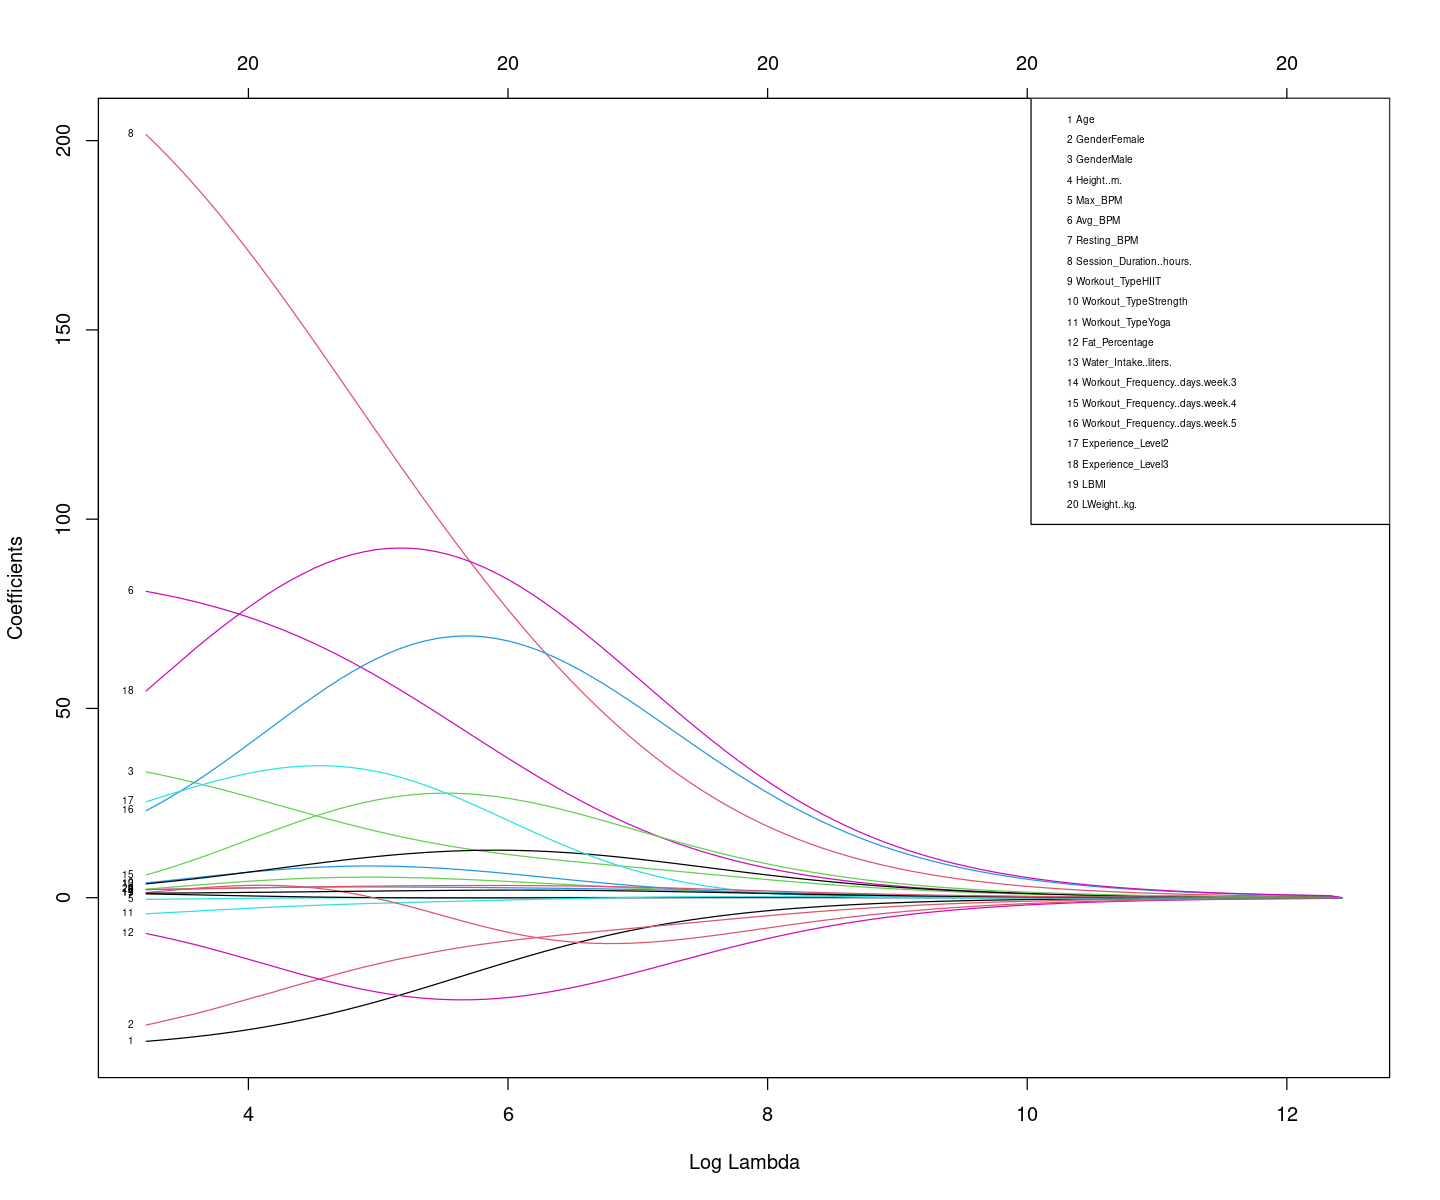

In [102]:
reg.ridge.cv <- cv.glmnet(y = y, x = x.mat, alpha = 0)
options(repr.plot.width = 12, repr.plot.height = 10)

plot(reg.ridge, xvar = "lambda", label = TRUE)
legend("topright", legend = paste(1:ncol(x.mat), colnames(x.mat)), cex = 0.5)

Nous observons que les coefficients sont bien réduits lorsque lambda augmente.

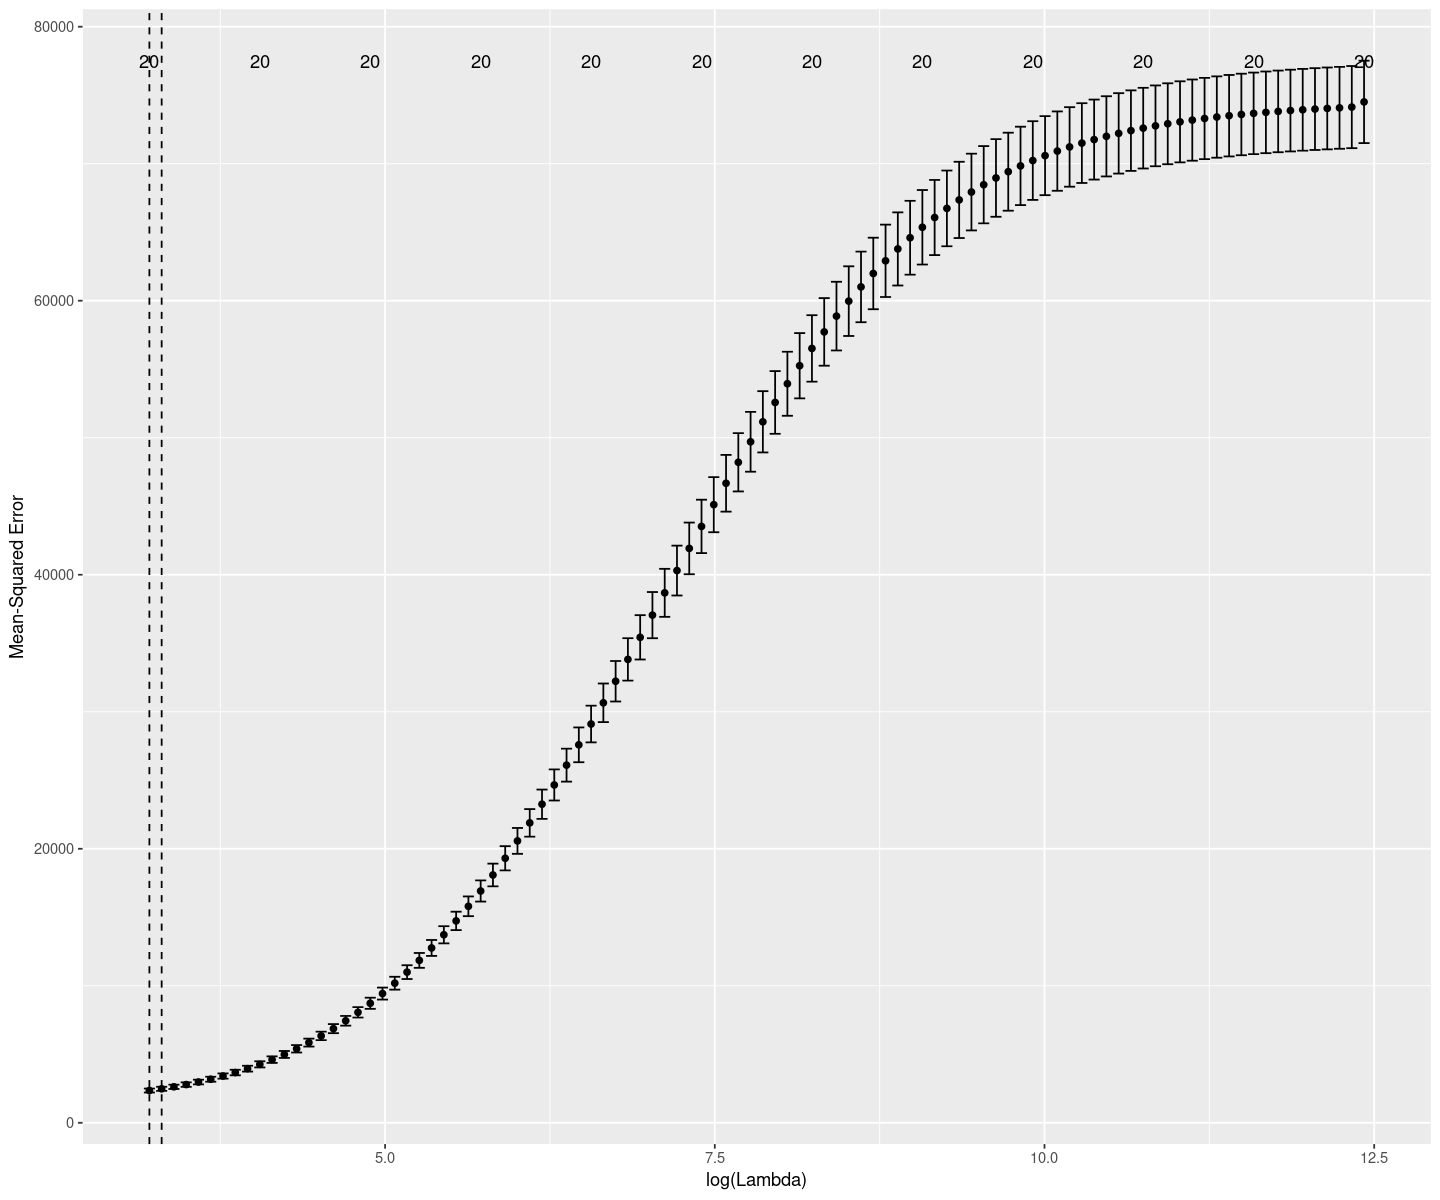

In [103]:
autoplot(reg.ridge.cv)

In [104]:
paste("CV estimée de lambda 1se:", round(reg.ridge.cv$lambda.1se, 3))
coef(reg.ridge.cv, s = "lambda.1se") #modèle correspondant
paste("CV estimée de lambda min:", round(reg.ridge.cv$lambda.min, 3))
coef(reg.ridge.cv, s = "lambda.min")


[1] "CV estimée de lambda 1se: 27.272"

21 x 1 sparse Matrix of class "dgCMatrix"
                                        s1
(Intercept)                    876.1443825
Age                            -37.6886483
GenderFemale                   -32.9369700
GenderMale                      32.5798508
Height..m.                       2.1694834
Max_BPM                         -0.4125259
Avg_BPM                         80.3299888
Resting_BPM                      0.9449190
Session_Duration..hours.       198.4639491
Workout_TypeHIIT                 2.4989152
Workout_TypeStrength             4.2272727
Workout_TypeYoga                -4.0885334
Fat_Percentage                 -10.1380172
Water_Intake..liters.            3.9671998
Workout_Frequency..days.week.3   1.6168060
Workout_Frequency..days.week.4   6.9427495
Workout_Frequency..days.week.5  24.7099734
Experience_Level2               26.3523575
Experience_Level3               57.4027456
LBMI                             1.1989268
LWeight..kg.                     2.1966230

[1] "CV estimée de lambda min: 24.849"

21 x 1 sparse Matrix of class "dgCMatrix"
                                        s1
(Intercept)                    877.9097862
Age                            -37.9510513
GenderFemale                   -33.6340102
GenderMale                      33.2290698
Height..m.                       2.1072753
Max_BPM                         -0.4438016
Avg_BPM                         80.9255143
Resting_BPM                      1.0074396
Session_Duration..hours.       201.5761448
Workout_TypeHIIT                 2.2379594
Workout_TypeStrength             3.8840313
Workout_TypeYoga                -4.2590289
Fat_Percentage                  -9.4717327
Water_Intake..liters.            3.6574889
Workout_Frequency..days.week.3   1.3136102
Workout_Frequency..days.week.4   6.0065459
Workout_Frequency..days.week.5  22.9828108
Experience_Level2               25.3451709
Experience_Level3               54.6257274
LBMI                             1.1767832
LWeight..kg.                     2.1543309

On trace ensuite les résidus en fonction des valeurs prédites.

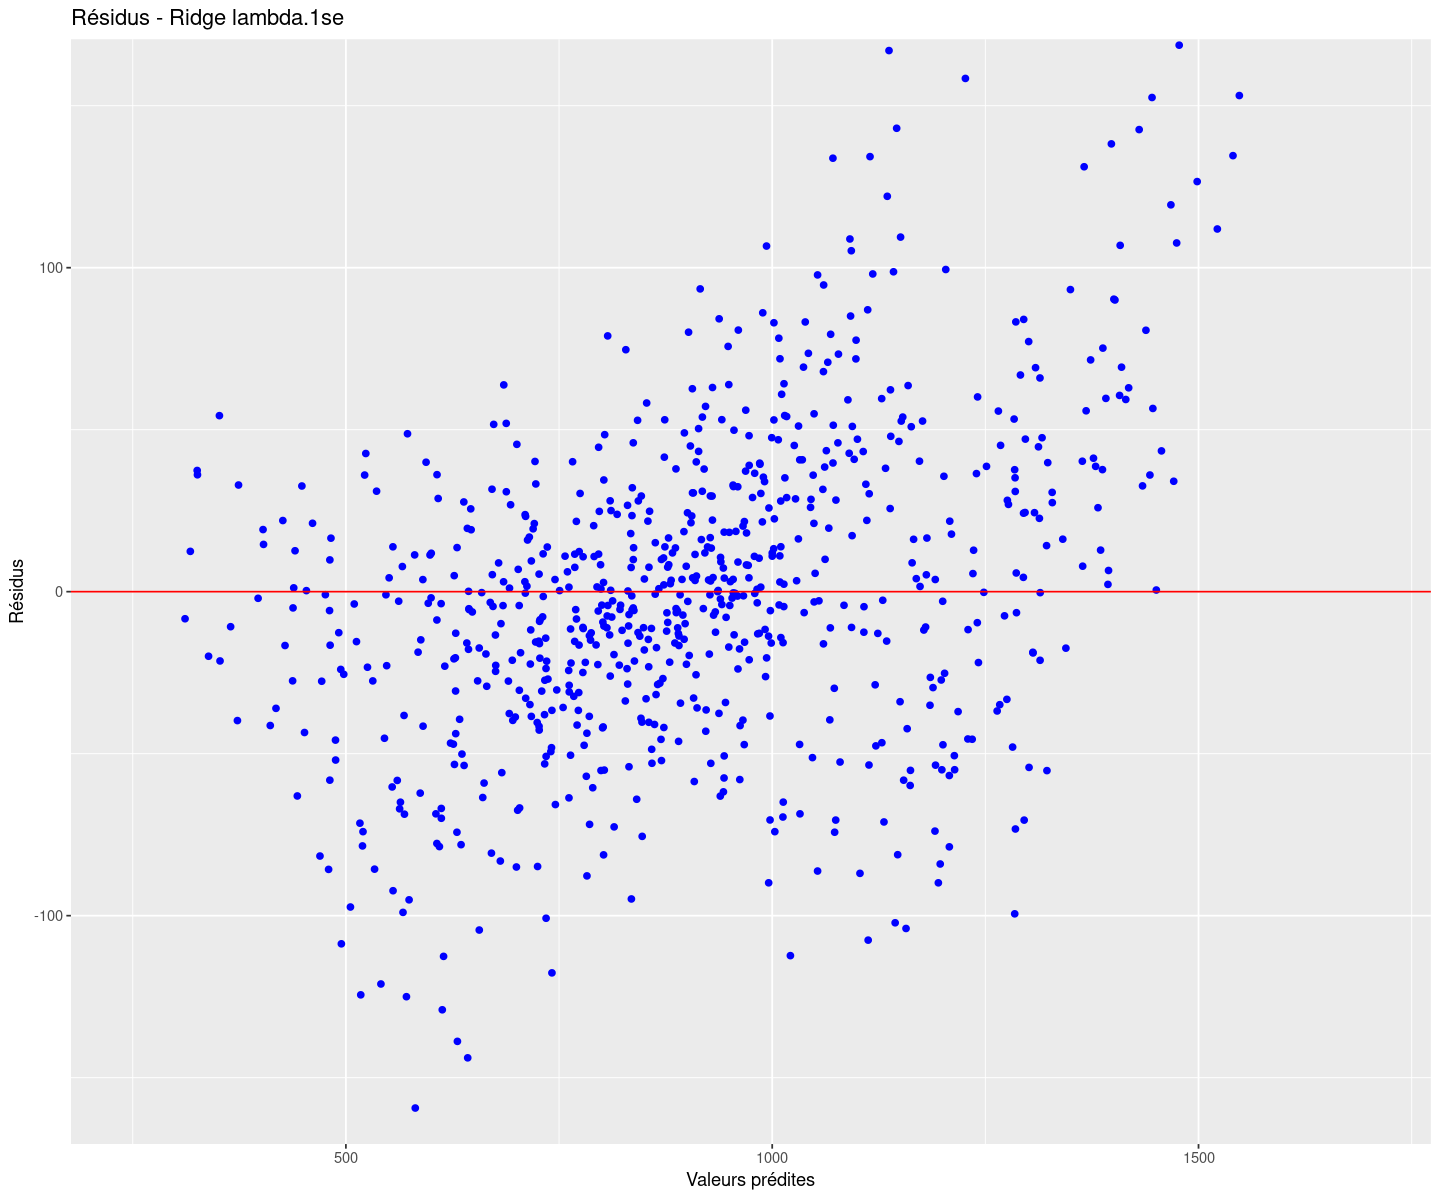

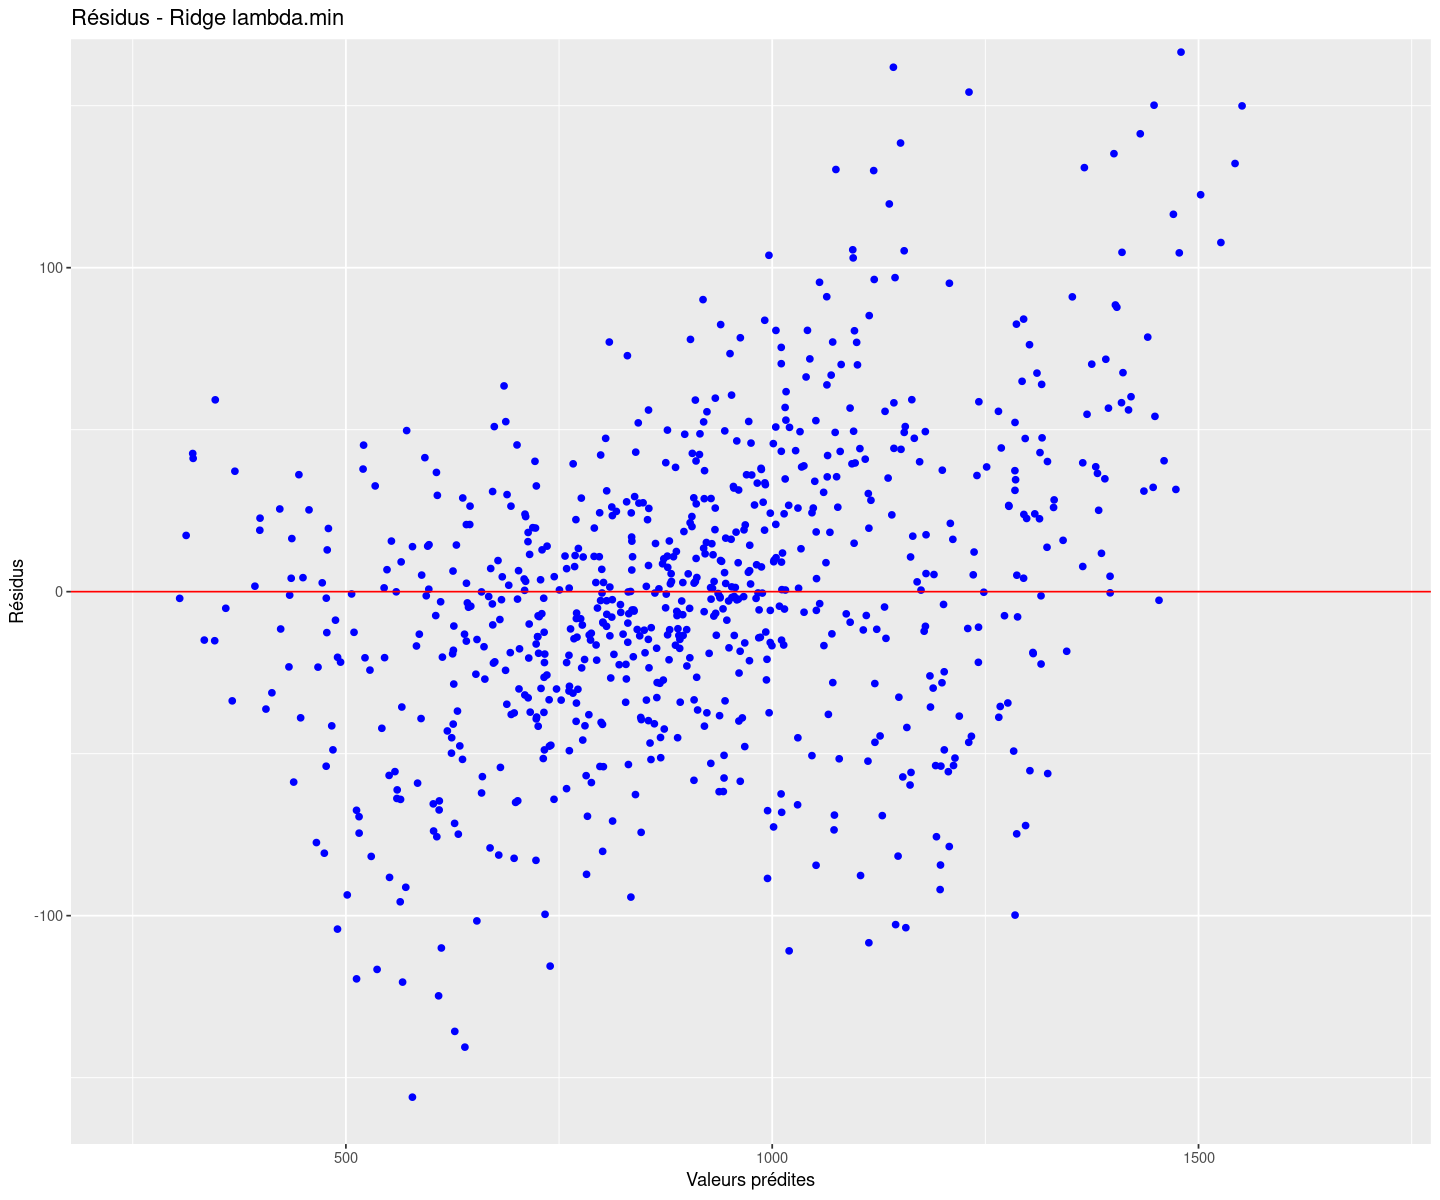

In [105]:
# lambda.1se
fit.ridge.1se <- predict(reg.ridge.cv, s = "lambda.1se", newx = x.mat)
res.ridge.1se <- y - fit.ridge.1se
gplot.res(fit.ridge.1se, res.ridge.1se, "Résidus - Ridge lambda.1se")

# lambda.min
fit.ridge.min <- predict(reg.ridge.cv, s = "lambda.min", newx = x.mat)
res.ridge.min <- y - fit.ridge.min
gplot.res(fit.ridge.min, res.ridge.min, "Résidus - Ridge lambda.min")


Nous testerons ce modèle sur l'échantillon de test à la fin de la partie modèle linéaire afin de pouvoir de pouvoir comparer les différents modèles linéaires.

### 2.2.3 Sélection de variable par régularisation L1 (LASSO)

La sélection de variable a pour objectif de garder uniquement les variables les plus pertinentes pour améliorer la performance et l’interprétation du modèle. On ajoute ainsi une pénalisation l1 (LASSO) qui cherche à mettre certains coefficients à 0. On va estimer le critère de pénalisation optimal et observer le nombre de variables qu'il garde et qu'il met à 0. Le Lasso avec validation croisée permet de choisir un compromis entre précision et parcimonie (lambda.min vs lambda.1se).


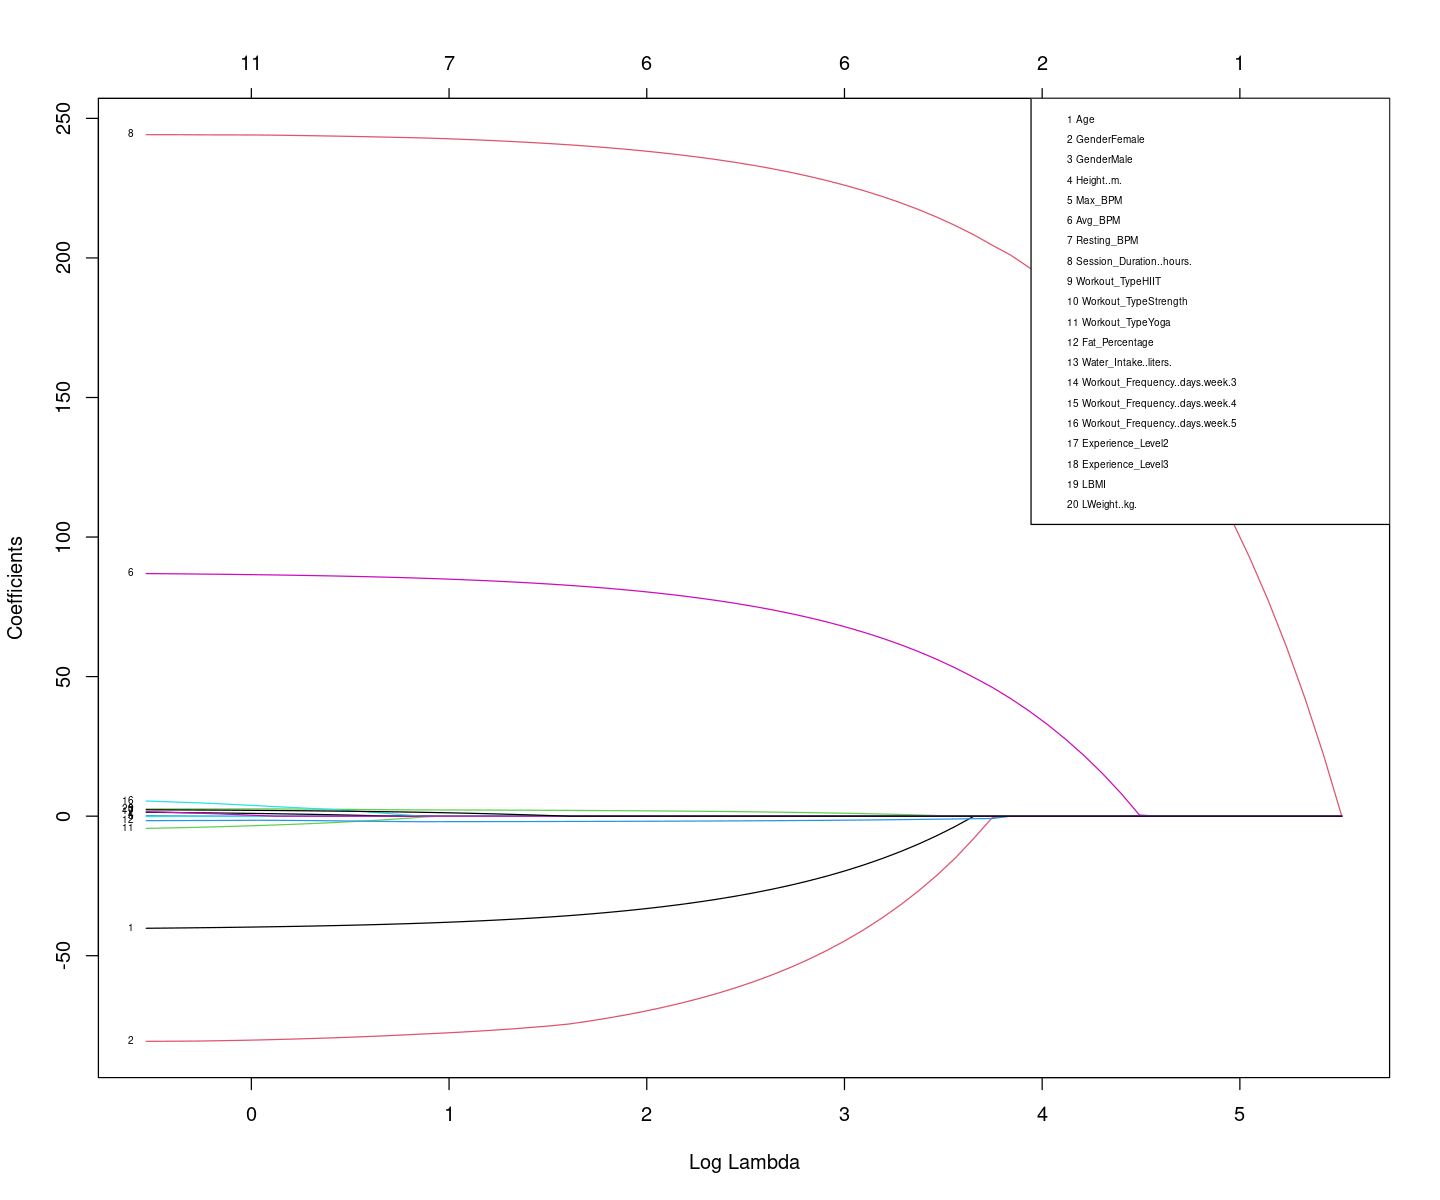

In [106]:
library(glmnet)
reg.lasso.quanti <- glmnet(y = datappr[, 8],
                           x = as.matrix(datappr[, -c(2,8,9,12,13)]))


x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$Calories_Burned, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)


plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright",legend = paste(1:ncol(x.mat), colnames(x.mat)),cex = 0.5) 


Chaque ligne du graphique représente le coefficient estimé d’une variable dans le modèle.
Lambda est le paramètre de pénalisation (plus il est grand, plus les coefficients sont poussés vers zéro).

À gauche (lambda grand), beaucoup de coefficients sont nuls car pénalisation forte ➜ le modèle est simple 

À droite (lambda petit), plus de variables entrent dans le modèle car pénalisation faible (coefficients ≠ 0) ➜ modèles plus complexes.

Pour choisir le lambda optimal nous allons effectuer une validation croisée.

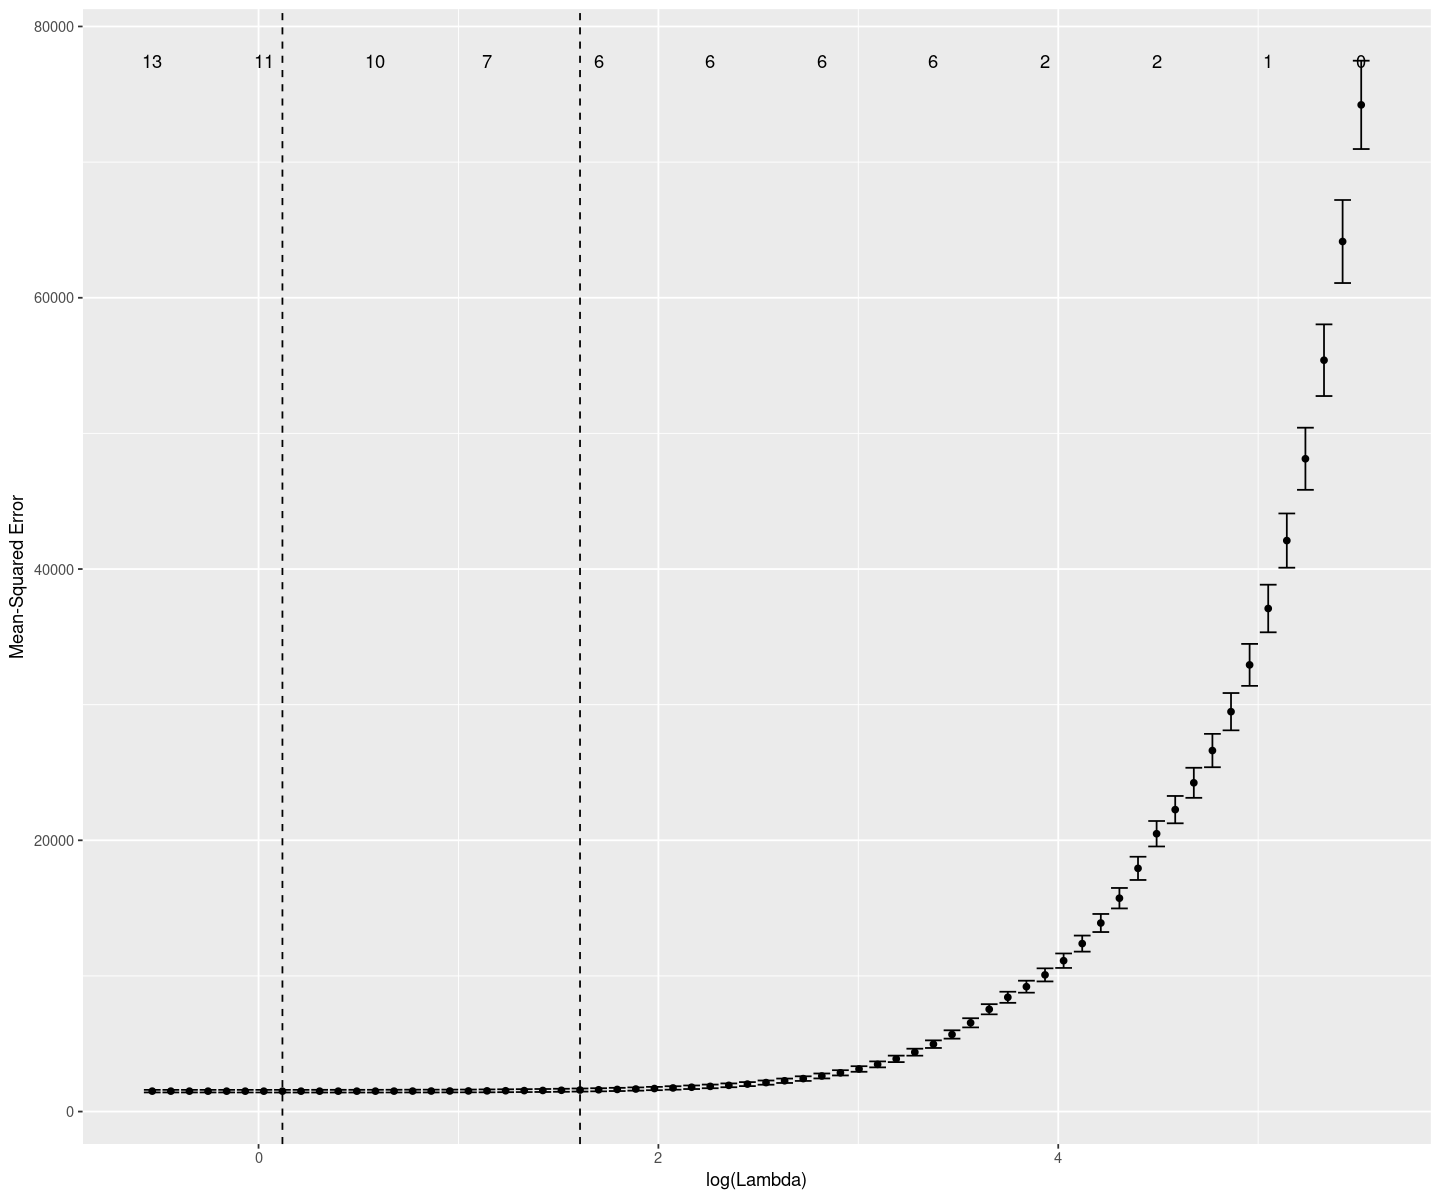

In [107]:
reg.lasso.cv<-cv.glmnet(y=datappr[,8],x=x.mat)
autoplot(reg.lasso.cv)

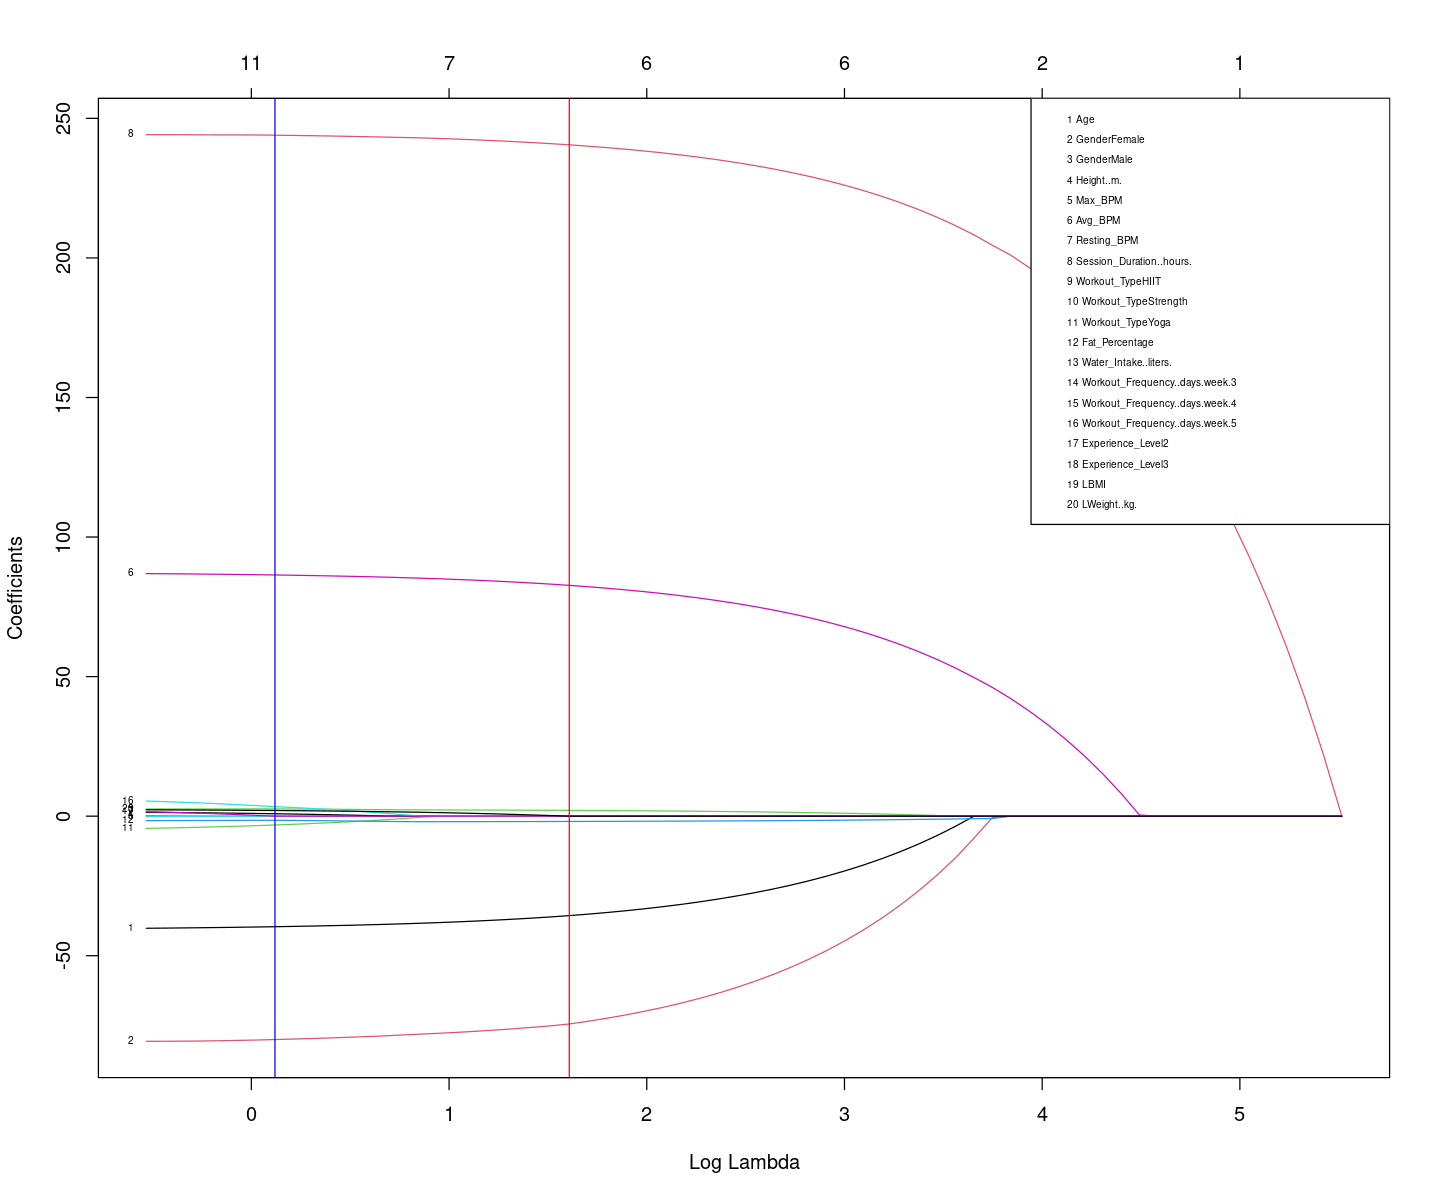

In [108]:
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright",
       legend = paste(1:ncol(x.mat), colnames(x.mat)),
       cex = 0.5) 
abline(v=log(reg.lasso.cv$lambda.1se),col="red")
abline(v=log(reg.lasso.cv$lambda.min),col="blue")

In [109]:
#LAMBDA LSE

#valeur estimée
paste("CV estimée de lambda :", round (reg.lasso.cv$lambda.1se, 3))
#modèle correspondant
coef(reg.lasso.cv,s="lambda.1se")

[1] "CV estimée de lambda : 4.993"

21 x 1 sparse Matrix of class "dgCMatrix"
                                       s1
(Intercept)                    940.718702
Age                            -35.640392
GenderFemale                   -74.463335
GenderMale                       2.064286
Height..m.                       .       
Max_BPM                          .       
Avg_BPM                         82.692356
Resting_BPM                      .       
Session_Duration..hours.       240.527551
Workout_TypeHIIT                 .       
Workout_TypeStrength             .       
Workout_TypeYoga                 .       
Fat_Percentage                  -1.900788
Water_Intake..liters.            .       
Workout_Frequency..days.week.3   .       
Workout_Frequency..days.week.4   .       
Workout_Frequency..days.week.5   .       
Experience_Level2                .       
Experience_Level3                .       
LBMI                             .       
LWeight..kg.                     .       

Le lambda LSE est celui qui sélectionne le moins de variables. Dans les variables seléctionnées nous retrouvons bien celles que nous avions analysées comme "corrélées" au nombre de calories brulées lors de la première partie exploratoire, ce qui est cohérent et qui confirme notre travail.

In [110]:
#LAMBDA MIN
#valeur estimée
paste("CV estimée de lambda :", round (reg.lasso.cv$lambda.min, 3))
#modèle correspondant
coef(reg.lasso.cv,s="lambda.min")

[1] "CV estimée de lambda : 1.127"

21 x 1 sparse Matrix of class "dgCMatrix"
                                        s1
(Intercept)                    943.5055809
Age                            -39.6143247
GenderFemale                   -80.0413127
GenderMale                       2.5959776
Height..m.                       .        
Max_BPM                          .        
Avg_BPM                         86.4142354
Resting_BPM                      0.8615968
Session_Duration..hours.       243.9878115
Workout_TypeHIIT                 .        
Workout_TypeStrength             .        
Workout_TypeYoga                -3.1671997
Fat_Percentage                  -1.4883686
Water_Intake..liters.            .        
Workout_Frequency..days.week.3   .        
Workout_Frequency..days.week.4   .        
Workout_Frequency..days.week.5   3.4058138
Experience_Level2                .        
Experience_Level3                .        
LBMI                             .        
LWeight..kg.                     2.0209474

On trace ensuite les résidus en fonction des valeurs prédites. 

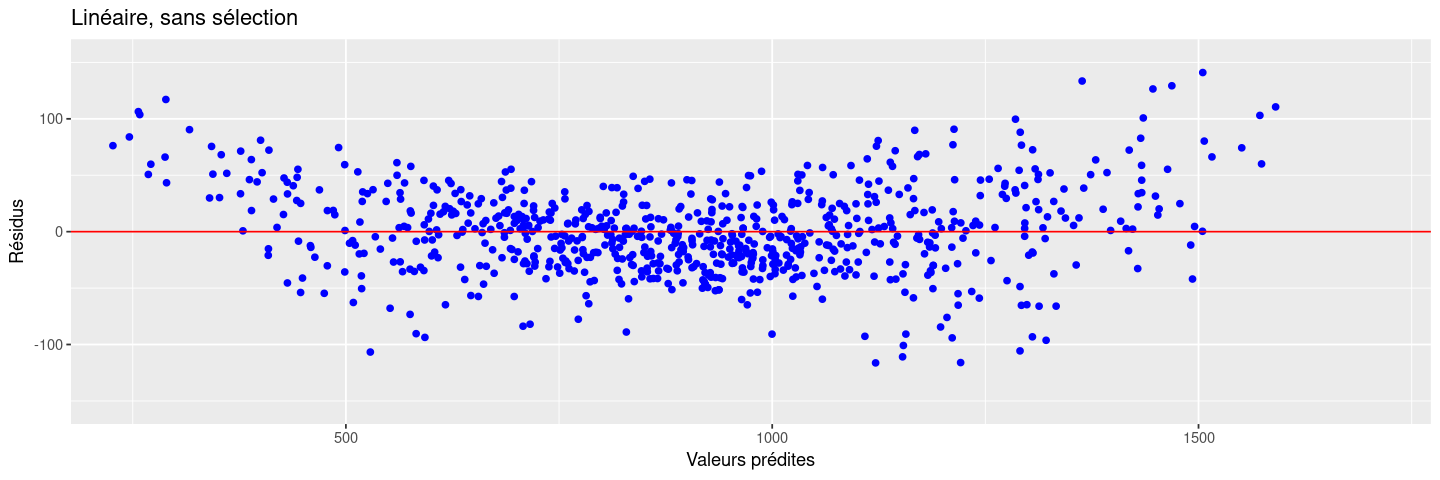

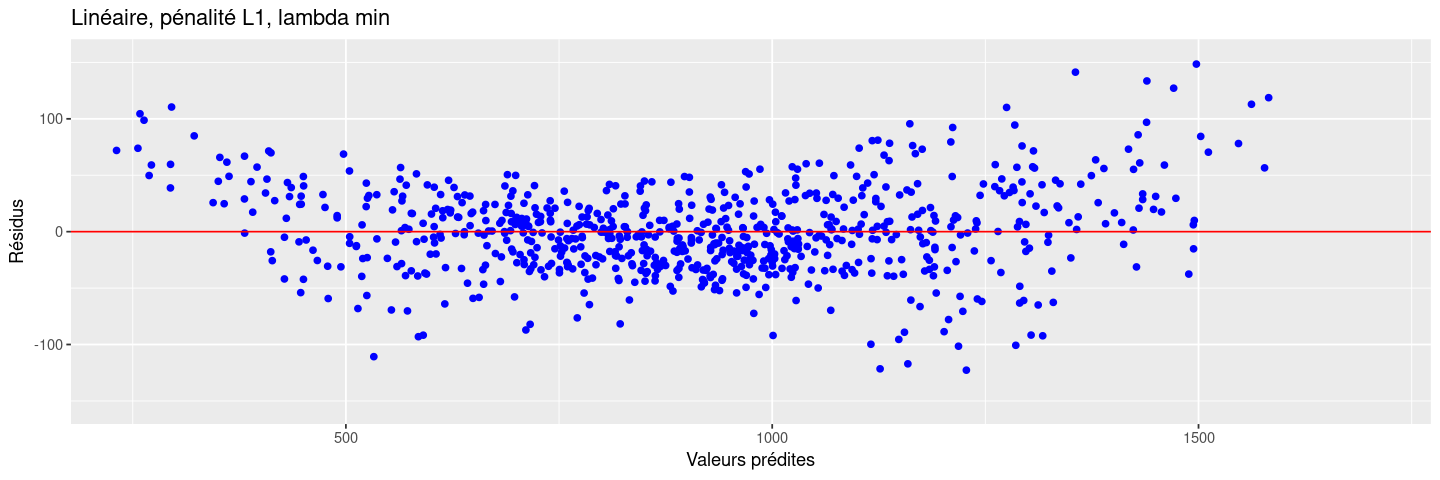

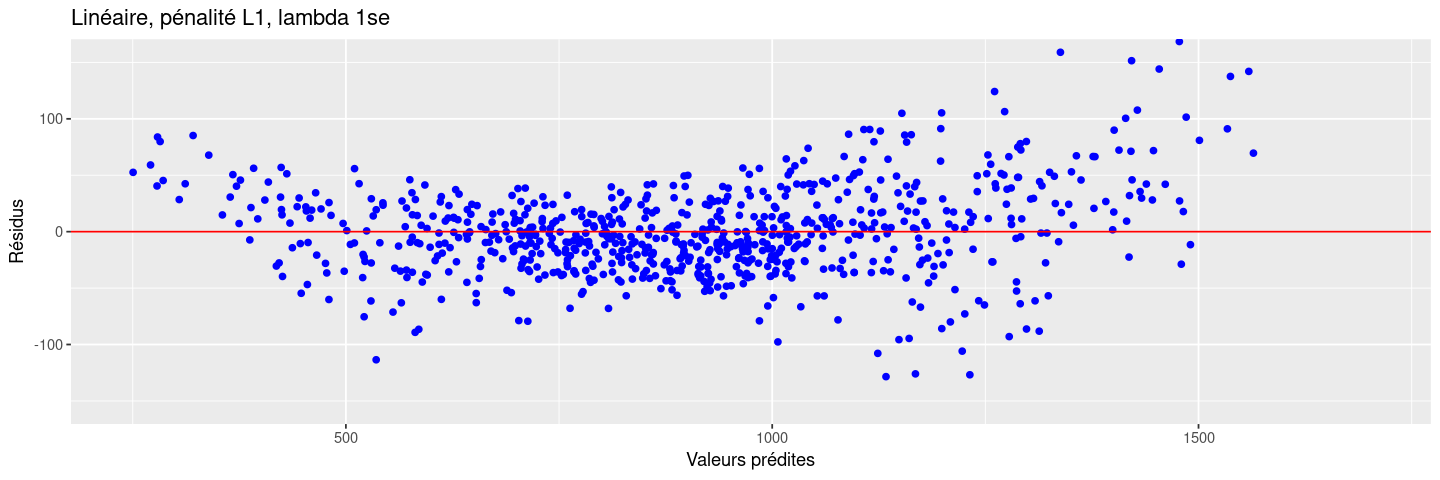

In [111]:
# Extraction des valeurs ajustées et des résidus

fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$Calories_Burned - fit.lasso

fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- datappr$Calories_Burned - fit.lasso.1se 

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 3))
gplot.res(fit.lm, res.lm, "Linéaire, sans sélection")
gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda min")
gplot.res(fit.lasso.1se, res.lasso.1se, "Linéaire, pénalité L1, lambda 1se") 

Quelque soit le modèle linéaire, les résidus ne sont pas indépendants des valeurs prédites.
Regardons l'erreur de prévision par validation croisée.

In [112]:
V=10 ; nV=floor(nrow(datappr)/V)
S=sample(1:nrow(datappr),replace=FALSE)
error.CV = c()
for(v in 1:V)
{
    datappr.learn=datappr[-c(S[(nV*(v-1)):(nV*v)]),] 
    datappr.valid=datappr[c(S[(nV*(v-1)):(nV*v)]),]
    error.CV=c(error.CV,mean((datappr.valid$Calories_Burned-predict(aov(Calories_Burned ~ ., data=datappr.learn),newdata=datappr.valid))^2))
}
mean(error.CV)

print(reg.lasso.cv)

[1] 1534.451


Call:  cv.glmnet(x = x.mat, y = datappr[, 8]) 

Measure: Mean-Squared Error 

    Lambda Index Measure     SE Nonzero
min  1.127    59    1504  96.12      10
1se  4.993    43    1587 112.36       6


On voit que le modèle sans sélection de variable n'est pas intéressant car l'erreur est proche de celle avec LASSO et lambda lse (qui garde beaucoup moins de variables).
Par validation croisée, LASSO avec lamda min est le plus précis mais garde 13 variables contre 7 variables conservées par LASSO avec lambda lse.


### 2.2.4 Prévision de l'échantillon test : Erreur de régression des modèles linéaires

In [113]:
# Préparations des données test 
x.mattest <- model.matrix(Calories_Burned ~ . - 1, data = datestr)

mean_train <- mean(datappr[, "Calories_Burned"])

# Prédictions et MSE pour lambda.1se
pred.lasso.1se <- predict(reg.lasso.cv, newx = x.mattest, s = "lambda.1se")
mse.lasso.1se <- mean((pred.lasso.1se - datestr[, "Calories_Burned"])^2)
cat("Erreur quadratique moyenne (MSE) pour Lasso avec lambda.1se :", mse.lasso.1se, "\n")

# Prédictions et MSE pour lambda.min
pred.lasso.min <- predict(reg.lasso.cv, newx = x.mattest, s = "lambda.min")
mse.lasso.min <- mean((pred.lasso.min - datestr[, "Calories_Burned"])^2)
cat("Erreur quadratique moyenne (MSE) pour Lasso avec lambda.min :", mse.lasso.min, "\n")

# Prédictions et MSE pour le modèle sans sélection
pred.lm <- predict(reg.lm, newdata = datestr)
mse.lm <- mean((pred.lm - datestr[, "Calories_Burned"])^2)
cat("Erreur quadratique moyenne modèle linéaire sans sélection de variable :", mse.lm, "\n")

# Prédictions et MSE pour le modèle sans sélection Ridge pour lambda 1se
x.mattest <- model.matrix(Calories_Burned ~ . - 1, data = datestr)
pred.ridge.1se <- predict(reg.ridge.cv, newx = x.mattest, s = "lambda.1se")
mse.ridge.1se <- mean((pred.ridge.1se - datestr[, "Calories_Burned"])^2)
cat("Erreur quadratique moyenne (MSE) pour Ridge avec lambda.1se :", mse.ridge.1se, "\n")

# Prédictions et MSE pour le modèle sans sélection Ridge pour lambda min
pred.ridge.min <- predict(reg.ridge.cv, newx = x.mattest, s = "lambda.min")
mse.ridge.min <- mean((pred.ridge.min - datestr[, "Calories_Burned"])^2)
cat("Erreur quadratique moyenne (MSE) pour Ridge avec lambda.min :", mse.ridge.min, "\n")


#Comparaison des Q2
q2.lasso.1se <- 1 - sum((pred.lasso.1se - datestr[, "Calories_Burned"])^2) / 
                    sum((datestr[, "Calories_Burned"] - mean_train)^2)
cat("Q2 pour Lasso avec lambda.1se :", q2.lasso.1se, "\n")

q2.lasso.min <- 1 - sum((pred.lasso.min - datestr[, "Calories_Burned"])^2) / 
                    sum((datestr[, "Calories_Burned"] - mean_train)^2)
cat("Q2 pour Lasso avec lambda.min :", q2.lasso.min, "\n")

q2.lm <- 1 - sum((pred.lm - datestr[, "Calories_Burned"])^2) / 
              sum((datestr[, "Calories_Burned"] - mean_train)^2)
cat("Q2 pour modèle linéaire sans sélection :", q2.lm, "\n")

q2.ridge.1se <- 1 - sum((pred.ridge.1se - datestr[, "Calories_Burned"])^2) / 
                     sum((datestr[, "Calories_Burned"] - mean_train)^2)
cat("Q2 pour Ridge avec lambda.1se :", q2.ridge.1se, "\n")

q2.ridge.min <- 1 - sum((pred.ridge.min - datestr[, "Calories_Burned"])^2) / 
                     sum((datestr[, "Calories_Burned"] - mean_train)^2)
cat("Q2 pour Ridge avec lambda.min :", q2.ridge.min, "\n")


Erreur quadratique moyenne (MSE) pour Lasso avec lambda.1se : 2220.405 
Erreur quadratique moyenne (MSE) pour Lasso avec lambda.min : 2017.571 
Erreur quadratique moyenne modèle linéaire sans sélection de variable : 1993.801 
Erreur quadratique moyenne (MSE) pour Ridge avec lambda.1se : 3087.791 
Erreur quadratique moyenne (MSE) pour Ridge avec lambda.min : 2950 
Q2 pour Lasso avec lambda.1se : 0.9699792 
Q2 pour Lasso avec lambda.min : 0.9727216 
Q2 pour modèle linéaire sans sélection : 0.973043 
Q2 pour Ridge avec lambda.1se : 0.9582517 
Q2 pour Ridge avec lambda.min : 0.9601147 


Bien que le modèle linéaire complet ait une MSE légèrement plus faible, il utilise l’ensemble des variables, ce qui le rend complexe et potentiellement surajusté.

Le LASSO avec lambda.min offre la meilleure précision tout en éliminant des variables inutiles.

Le LASSO avec lambda.1se est un bon compromis si l’on privilégie la simplicité et l’interprétabilité du modèle, au prix d’une légère perte de précision.

Choix dépendant de notre objectif :

Si l’objectif est la meilleure performance prédictive, on retient lambda.min.
Si on souhaite un modèle plus léger, robuste, et facilement interprétable, lambda.1se est préférable.

#### 2.2.5 Modèle quadratique avec sélection de variables par critère AIC

Le modèle quadratique met en oeuvre toutes les interactions d'ordre 2 entre les variables.  A chaque étape, chaque modèle est comparé à tous les sous-modèles possibles obtenus par suppression d'une des interactions ou une des variables, à condition qu'elle ne soit pas présente dans une interaction. La variable sélectionnée et supprimée est celle qui fait décroîre le critère considéré : AIC (*Akaïke Information Criterion*).

In [32]:
# Estimation du modèle avec toutes les interactions d'ordre 2
reg.glm <- glm(Calories_Burned ~ .^2, data = datappr)

# Recherche du meilleur modèle au sens du critère d'Akaïke par méthode descendante
reg.glm.step <- step(reg.glm, direction = "backward")


Start:  AIC=7349.19
Calories_Burned ~ (Age + Gender + Height..m. + Max_BPM + Avg_BPM + 
    Resting_BPM + Session_Duration..hours. + Workout_Type + Fat_Percentage + 
    Water_Intake..liters. + Workout_Frequency..days.week. + Experience_Level + 
    LBMI + LWeight..kg.)^2


Step:  AIC=7349.19
Calories_Burned ~ Age + Gender + Height..m. + Max_BPM + Avg_BPM + 
    Resting_BPM + Session_Duration..hours. + Workout_Type + Fat_Percentage + 
    Water_Intake..liters. + Workout_Frequency..days.week. + Experience_Level + 
    LBMI + LWeight..kg. + Age:Gender + Age:Height..m. + Age:Max_BPM + 
    Age:Avg_BPM + Age:Resting_BPM + Age:Session_Duration..hours. + 
    Age:Workout_Type + Age:Fat_Percentage + Age:Water_Intake..liters. + 
    Age:Workout_Frequency..days.week. + Age:Experience_Level + 
    Age:LBMI + Age:LWeight..kg. + Gender:Height..m. + Gender:Max_BPM + 
    Gender:Avg_BPM + Gender:Resting_BPM + Gender:Session_Duration..hours. + 
    Gender:Workout_Type + Gender:Fat_Percentage + Gender

ERROR: Error in cv.glm(datappr, reg.glm.step, K = 5): impossible de trouver la fonction "cv.glm"


In [156]:
# Coefficients du modèle
anova(reg.glm.step, test = "F")


Df Deviance     Resid. Df
NULL                                         NA           NA 777      
Age                                           1 1.276747e+06 776      
Gender                                        1 1.396801e+06 775      
Height..m.                                    1 1.299713e+02 774      
Max_BPM                                       1 3.214936e+02 773      
Avg_BPM                                       1 6.885236e+06 772      
Resting_BPM                                   1 1.807065e+04 771      
Session_Duration..hours.                      1 4.712253e+07 770      
Workout_Type                                  3 5.711084e+03 767      
Fat_Percentage                                1 1.552259e+03 766      
Water_Intake..liters.                         1 3.709633e+01 765      
Workout_Frequency..days.week.                 3 2.393254e+03 762      
Experience_Level                              2 3.425908e+03 760      
LBMI                                          1 3.756870e+03 759      
LWeight..kg.                                  1 3.665529e+01 758      
Age:Gender                                    1 1.304067e+03 757      
Age:Avg_BPM                                   1 5.107505e+03 756      
Age:Session_Duration..hours.                  1 6.905657e+04 755      
Age:LWeight..kg.                              1 1.036007e+03 754      
Gender:Avg_BPM                                1 2.077823e+04 753      
Gender:Session_Duration..hours.               1 1.531179e+05 752      
Gender:Water_Intake..liters.                  1 1.318622e+01 751      
Gender:Experience_Level                       2 1.580112e+03 749      
Height..m.:Avg_BPM                            1 5.296157e+03 748      
Height..m.:Resting_BPM                        1 1.585518e+03 747      
Height..m.:Session_Duration..hours.           1 3.192070e+02 746      
Height..m.:Workout_Type                       3 1.661359e+04 743      
Height..m.:Fat_Percentage                     1 9.258299e+01 742      
Height..m.:Water_Intake..liters.              1 6.609986e+03 741      
Height..m.:Experience_Level                   2 3.474460e+03 739      
Max_BPM:Fat_Percentage                        1 6.169706e+00 738      
Max_BPM:Water_Intake..liters.                 1 1.031782e+03 737      
Max_BPM:Workout_Frequency..days.week.         3 1.014686e+04 734      
Max_BPM:Experience_Level                      2 1.371026e+04 732      
Max_BPM:LBMI                                  1 5.531626e+03 731      
Avg_BPM:Session_Duration..hours.              1 3.575825e+05 730      
Avg_BPM:Workout_Type                          3 3.028568e+03 727      
Resting_BPM:LWeight..kg.                      1 1.568719e+03 726      
Workout_Type:Experience_Level                 6 1.094831e+04 720      
Workout_Type:LBMI                             3 6.075488e+03 717      
Workout_Type:LWeight..kg.                     3 4.088946e+03 714      
Fat_Percentage:Workout_Frequency..days.week.  3 4.286580e+03 711      
Fat_Percentage:LBMI                           1 2.421615e+01 710      
Fat_Percentage:LWeight..kg.                   1 1.529439e+03 709      
Water_Intake..liters.:Experience_Level        1 1.386277e+03 708      
Water_Intake..liters.:LBMI                    1 2.661049e+00 707      
Water_Intake..liters.:LWeight..kg.            1 1.388424e+03 706      
Experience_Level:LBMI                         2 1.458492e+03 704      
Experience_Level:LWeight..kg.                 2 5.597874e+03 702      
                                             Resid. Dev F           
NULL                                         57830754.9           NA
Age                                          56554008.3 2.248389e+03
Gender                                       55157207.7 2.459808e+03
Height..m.                                   55157077.7 2.288833e-01
Max_BPM                                      55156756.2 5.661600e-01
Avg_BPM                                      48271520.2 1.212511e+04
Resting_BPM 

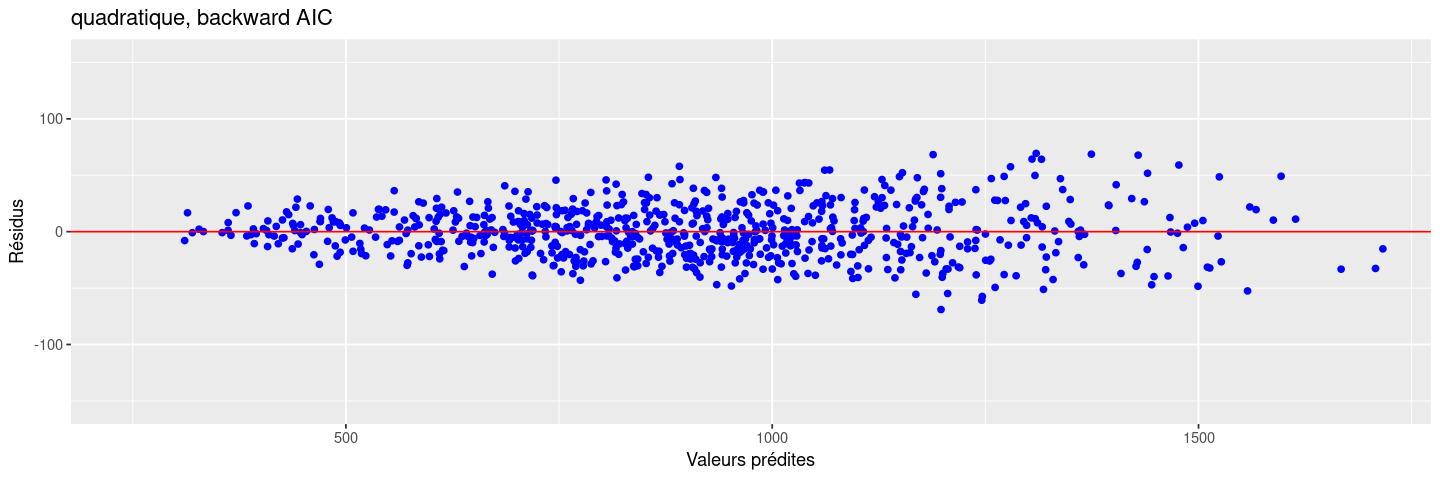

In [157]:
# Extraction des valeurs ajustées et des résidus
fit.glm <- reg.glm.step$fitted.values
res.glm <- reg.glm.step$residuals
gplot.res(fit.glm, res.glm, "quadratique, backward AIC")

##### Prévision de l'échantillon test

In [158]:
# Calcul des prévisions pour le modèle quadratique backward AIC
pred.glm <- predict(reg.glm.step, newdata = datestr)

# Erreur quadratique moyenne de prévision (MSE)
mse.quadratique.aic= sum((pred.glm - datestr[, "Calories_Burned"])^2) / nrow(datestr)
cat("Erreur quadratique moyenne (MSE) pour modèle quadratique, AIC :", mse.quadratique.aic, "\n")


# Q²
q2.quadra.aic <- 1 - sum((pred.glm - datestr[, "Calories_Burned"])^2) / sum((datestr[, "Calories_Burned"] - mean_train)^2)
cat("Q2 pour modèle quadratique, AIC :", q2.quadra.aic, "\n")


Erreur quadratique moyenne (MSE) pour modèle quadratique, AIC : 746.1737 
Q2 pour modèle quadratique, AIC : 0.9899114 


## 2.3 Support Vector Regression (SVR)


Pour cette prochaine partie, l'objectif est de capturer des relations non linéaires entre les variables explicatives et la variable à prédire. Le noyau (kernel) permet d’adapter le modèle à des relations complexes et le choix du noyaux joue un rôle primordial dans cette partie. Il permet de projeter les données dans un espace de dimension potentiellement très élevée, sans avoir à expliciter la fonction phi qui permet cette projection. Le noyau permet donc d’adapter le modèle à la nature des données.


### 2.3.1 Régression sur l'échantillon d'apprentissage

In [139]:
svm.reg0 = svm(Calories_Burned ~ ., data = datappr)
summary(svm.reg0)


Call:
svm(formula = Calories_Burned ~ ., data = datappr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.05 
    epsilon:  0.1 


Number of Support Vectors:  325






Nous allons estimer les meilleurs paramètres pour le SVR avec noyau linéaire, radial et polynomial. Ensuite nous allons prédires les calories brulées puis observer les résidus.

In [140]:
set.seed(2025)
svm.reg.tune.rdl = tune.svm(Calories_Burned ~ ., data = datappr, kernel="radial", cost = c(0.5,1, 1.5, 2, 2.5, 3, 3.5,5,8,10), 
    gamma = seq(0.01, 0.1, by = 0.02))

svm.reg.tune.linear = tune.svm(Calories_Burned ~ ., data = datappr, kernel="linear", cost = c(0.5,1, 1.5, 2, 2.5, 3, 3.5,5,8,10), 
    gamma = seq(0.01, 0.1, by = 0.02))

svm.reg.tune.polynomial = tune.svm(Calories_Burned ~ ., data = datappr, kernel="polynomial", cost = c(0.5,1, 1.5, 2, 2.5, 3, 3.55,8,10), 
    gamma = seq(0.01, 0.1, by = 0.02))

In [141]:
svm.reg.rdl = svm(Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.rdl$best.parameters$cost, 
    gamma = svm.reg.tune.rdl$best.parameters$gamma, kernel="radial")
summary(svm.reg.rdl)

svm.reg.linear = svm(Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.linear$best.parameters$cost, 
    gamma = svm.reg.tune.linear$best.parameters$gamma, kernel="linear")
summary(svm.reg.linear)

svm.reg.poly = svm(Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.polynomial$best.parameters$cost, 
    gamma = svm.reg.tune.polynomial$best.parameters$gamma, kernel="polynomial")
summary(svm.reg.poly)


Call:
svm(formula = Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.rdl$best.parameters$cost, 
    gamma = svm.reg.tune.rdl$best.parameters$gamma, kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.01 
    epsilon:  0.1 


Number of Support Vectors:  244







Call:
svm(formula = Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.linear$best.parameters$cost, 
    gamma = svm.reg.tune.linear$best.parameters$gamma, kernel = "linear")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  0.5 
      gamma:  0.01 
    epsilon:  0.1 


Number of Support Vectors:  348







Call:
svm(formula = Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.polynomial$best.parameters$cost, 
    gamma = svm.reg.tune.polynomial$best.parameters$gamma, kernel = "polynomial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  3 
     degree:  3 
      gamma:  0.09 
     coef.0:  0 
    epsilon:  0.1 


Number of Support Vectors:  491






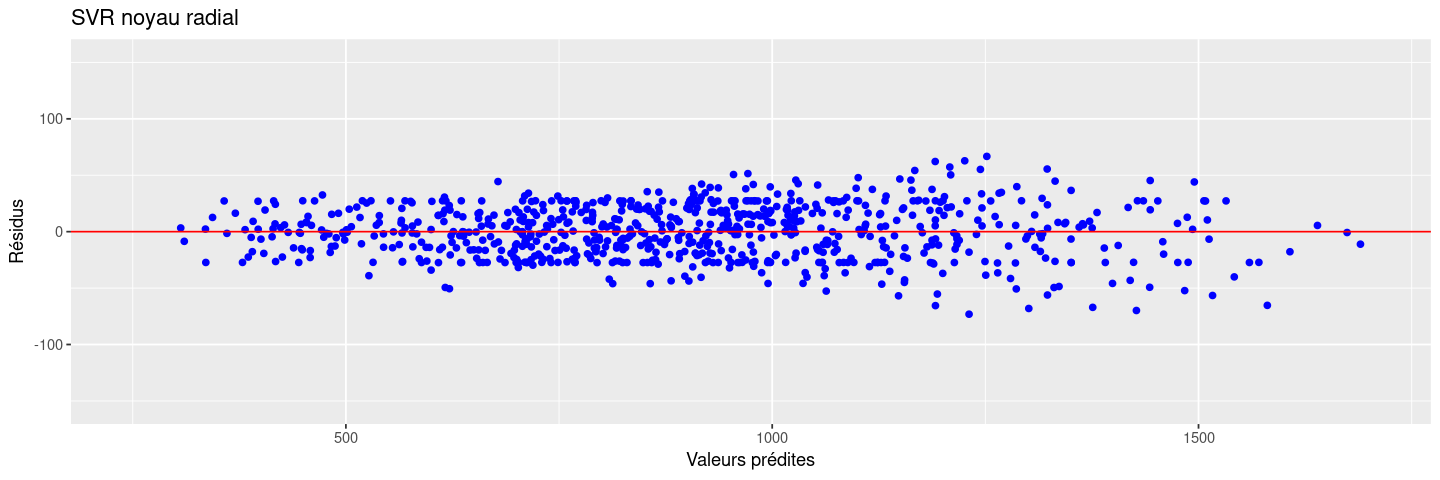

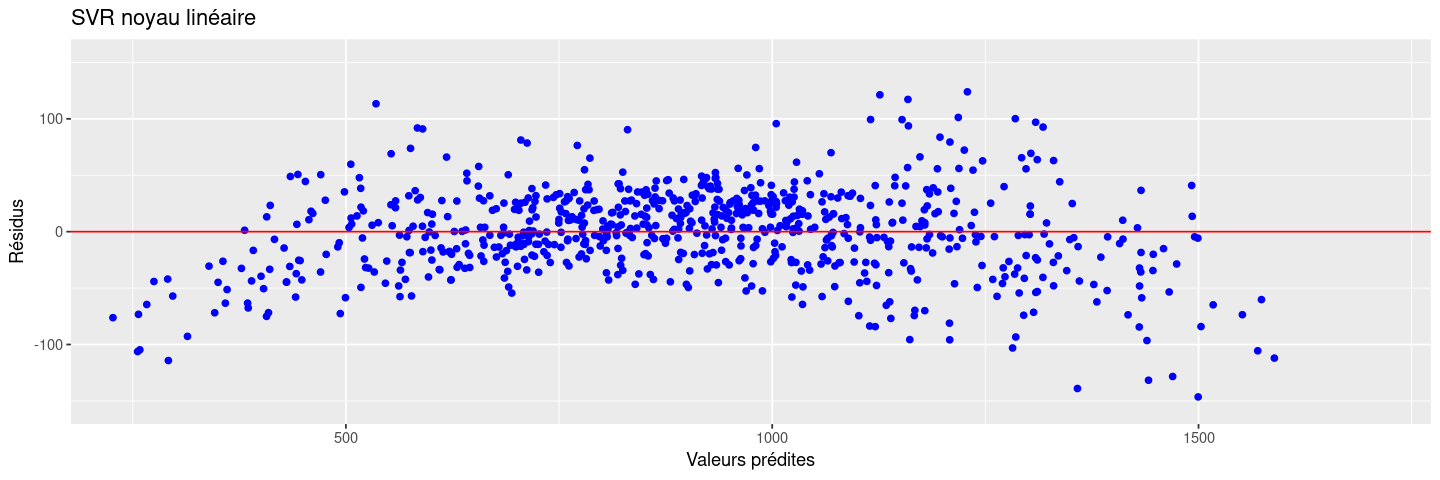

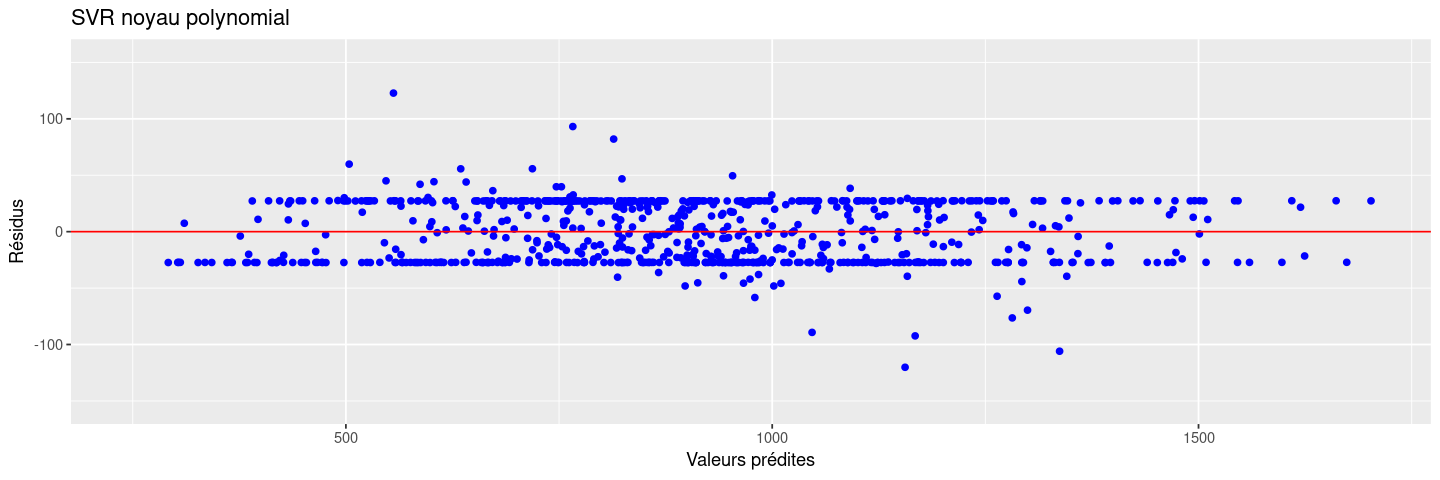

In [142]:
# calcul et graphe des résidus
fit.svmr.rdl=svm.reg.rdl$fitted
res.svmr.rdl=fit.svmr.rdl-datappr[,"Calories_Burned"]
gplot.res(fit.svmr.rdl,res.svmr.rdl,titre="SVR noyau radial")

fit.svmr.linear=svm.reg.linear$fitted
res.svmr.linear=fit.svmr.linear-datappr[,"Calories_Burned"]
gplot.res(fit.svmr.linear,res.svmr.linear,titre="SVR noyau linéaire")

fit.svmr.polynomial=svm.reg.poly$fitted
res.svmr.polynomial=fit.svmr.polynomial-datappr[,"Calories_Burned"]
gplot.res(fit.svmr.polynomial,res.svmr.polynomial,titre="SVR noyau polynomial")

Les résidus des SVR avec noyau linéaire et noyau polynomial ne sont pas indépendants. On observe pour le premier une "parabole" et pour le second un effet couloir. Nous choisissons donc de continuer avec le noyau gaussien, RBF (radial).

### 2.3.2 Erreur de regression sur l'échantillon test

Regardons l'erreur de regression sur l'échantillon test.

In [159]:
#Radial
pred.svmr.rdl=predict(svm.reg.rdl,newdata=datestr)
# Erreur quadratique moyenne de prévision
erreur_SVR_radial =sum((pred.svmr.rdl-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne pour un SVR avec noyau radial :",erreur_SVR_radial , "\n")

#Q2
q2.svr.radial <- 1 - sum((pred.svmr.rdl - datestr[, "Calories_Burned"])^2) / 
               sum((datestr[, "Calories_Burned"] - mean_train)^2)
cat("Q2 pour le SVR avec noyau radial :", q2.svr.radial, "\n")



#Linéaire
pred.svmr.lin=predict(svm.reg.linear,newdata=datestr)
# Erreur quadratique moyenne de prévision
erreur_SVR_lin =sum((pred.svmr.lin-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne pour un SVR avec noyau linéaire :",erreur_SVR_lin, "\n")

#Q2
q2.svr.lin<- 1 - sum((pred.svmr.lin - datestr[, "Calories_Burned"])^2) / 
               sum((datestr[, "Calories_Burned"] - mean_train)^2)
cat("Q2 pour le SVR avec noyau linéaire :", q2.svr.lin, "\n")


#Polynomial
pred.svmr.poly=predict(svm.reg.poly,newdata=datestr)
# Erreur quadratique moyenne de prévision
erreur_SVR_poly =sum((pred.svmr.poly-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne pour un SVR avec noyau polynomial :",erreur_SVR_poly, "\n")

#Q2
q2.svr.poly <- 1 - sum((pred.svmr.poly - datestr[, "Calories_Burned"])^2) / 
               sum((datestr[, "Calories_Burned"] - mean_train)^2)
cat("Q2 pour le SVR avec noyau polynomial :", q2.svr.poly, "\n")



Erreur quadratique moyenne pour un SVR avec noyau radial : 854.51 
Q2 pour le SVR avec noyau radial : 0.9884467 
Erreur quadratique moyenne pour un SVR avec noyau linéaire : 2008.954 
Q2 pour le SVR avec noyau linéaire : 0.9728381 
Erreur quadratique moyenne pour un SVR avec noyau polynomial : 3839.245 
Q2 pour le SVR avec noyau polynomial : 0.9480918 


Le modèle SVR avec un noyau radial est bien plus performant que les modèles linéaires et c'est celui que l'on gardera pour la comparaison finale. En effet, l'erreur de prevision est d'environ 900 pour le SVR alors qu'elle est autour de 2000 pour les modèles linéaires. Ainsi, SVR est plus précis.

## 2.4 Arbre optimal

Dans cette partie, on va modéliser la prédiction par une succession de règles de décision simples et facilement interprétables représentées sous forme d'arbre.
On obtient l'arbre de décision en divisant progressivement l’espace des données pour faire des prédictions simples dans chaque branche.
Il divise donc les données en sous-groupes homogènes selon les variables qui expliquent le mieux Calories_Burned. L'élagage permet de réduire la complexité pour éviter le sur-apprentissage.

### 2.4.1 Estimation et élagage de l'arbre de régression

In [90]:
options(repr.plot.width = 15, repr.plot.height = 10)

On va tout d'abord s'intéresser à un paramètre très important pour l'élagage de l'arbre : le critère cp. C’est un paramètre de pénalisation qui contrôle l’élagage de l’arbre. Lors de l’élagage, on cherche à équilibrer : la qualité d’ajustement et la complexité de l’arbre (nombre de feuilles). Le cp optimal est donc le bon compromis entre biais et variance. C'est important de choisir un cp optimal car :
- Un arbre trop complexe (cp trop faible) colle trop aux données, mais généralise mal => surapprentissage
- Un arbre trop simple (cp trop élevé) ne capture pas assez la structure => sous-apprentissage
  
On va donc essayer d'optimiser ce paramètre par validation croisée.

##### Recherche du cp optimal

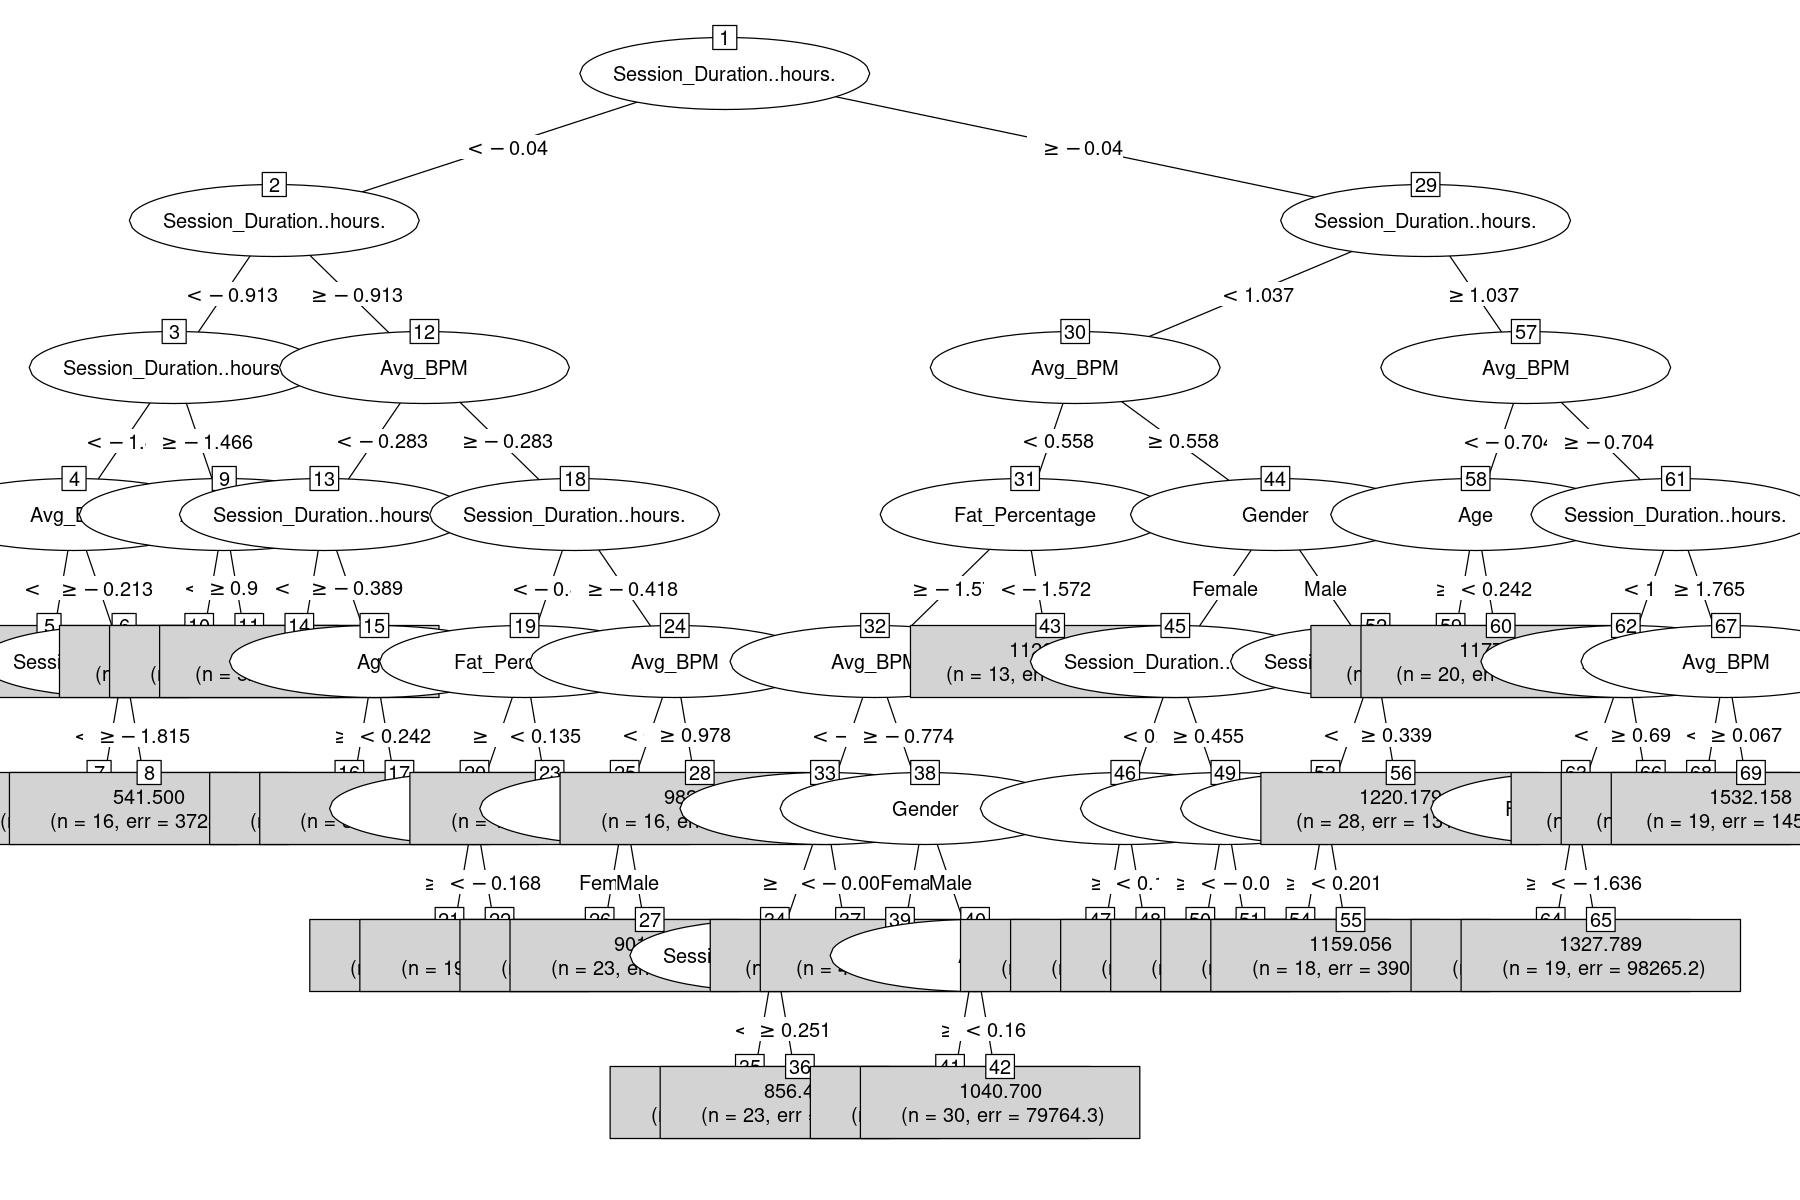

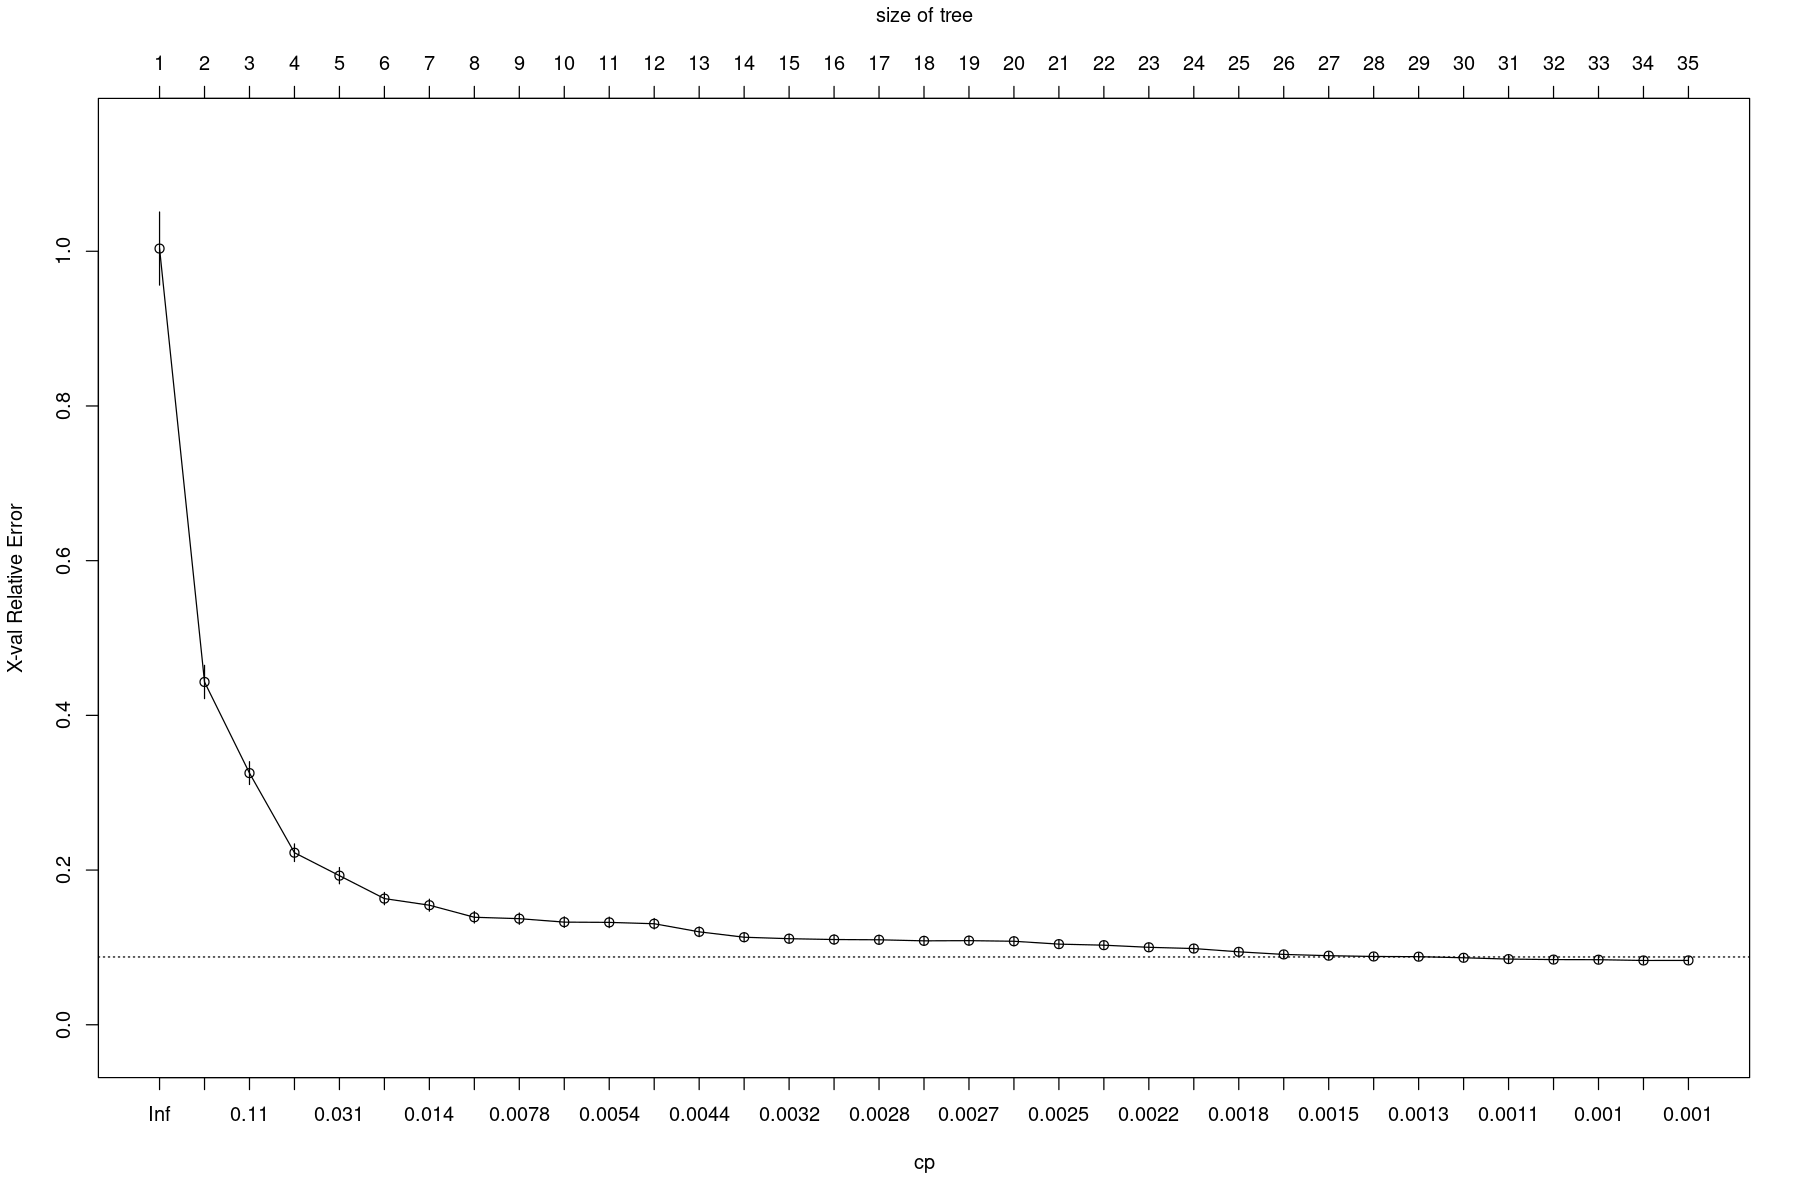

In [94]:
set.seed(327)
tree.reg=rpart(Calories_Burned~.,data=datappr,control=rpart.control(cp=0.001)) #Création de l’arbre de régression avec un cp très petit 
plot(as.party(tree.reg), type="simple")
#identifier le cp optimal via validation croisée
xmat<-xpred.rpart(tree.reg,xval=10) 

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"Calories_Burned"])^2,2,sum)

plotcp(tree.reg)

Ce graphe représente : l’erreur de validation croisée associée à chaque cp en fonction des valeurs de cp (du plus grand au plus petit). Sur le graphe on voit que la valeur de cp optimale est la valeur la plus basse et qu'elle se stabilise autour de 0.001. Nous choisissons donc cp = 0.001.

##### Arbre Optimal (associé à ce cp)

[1] 0.001004666

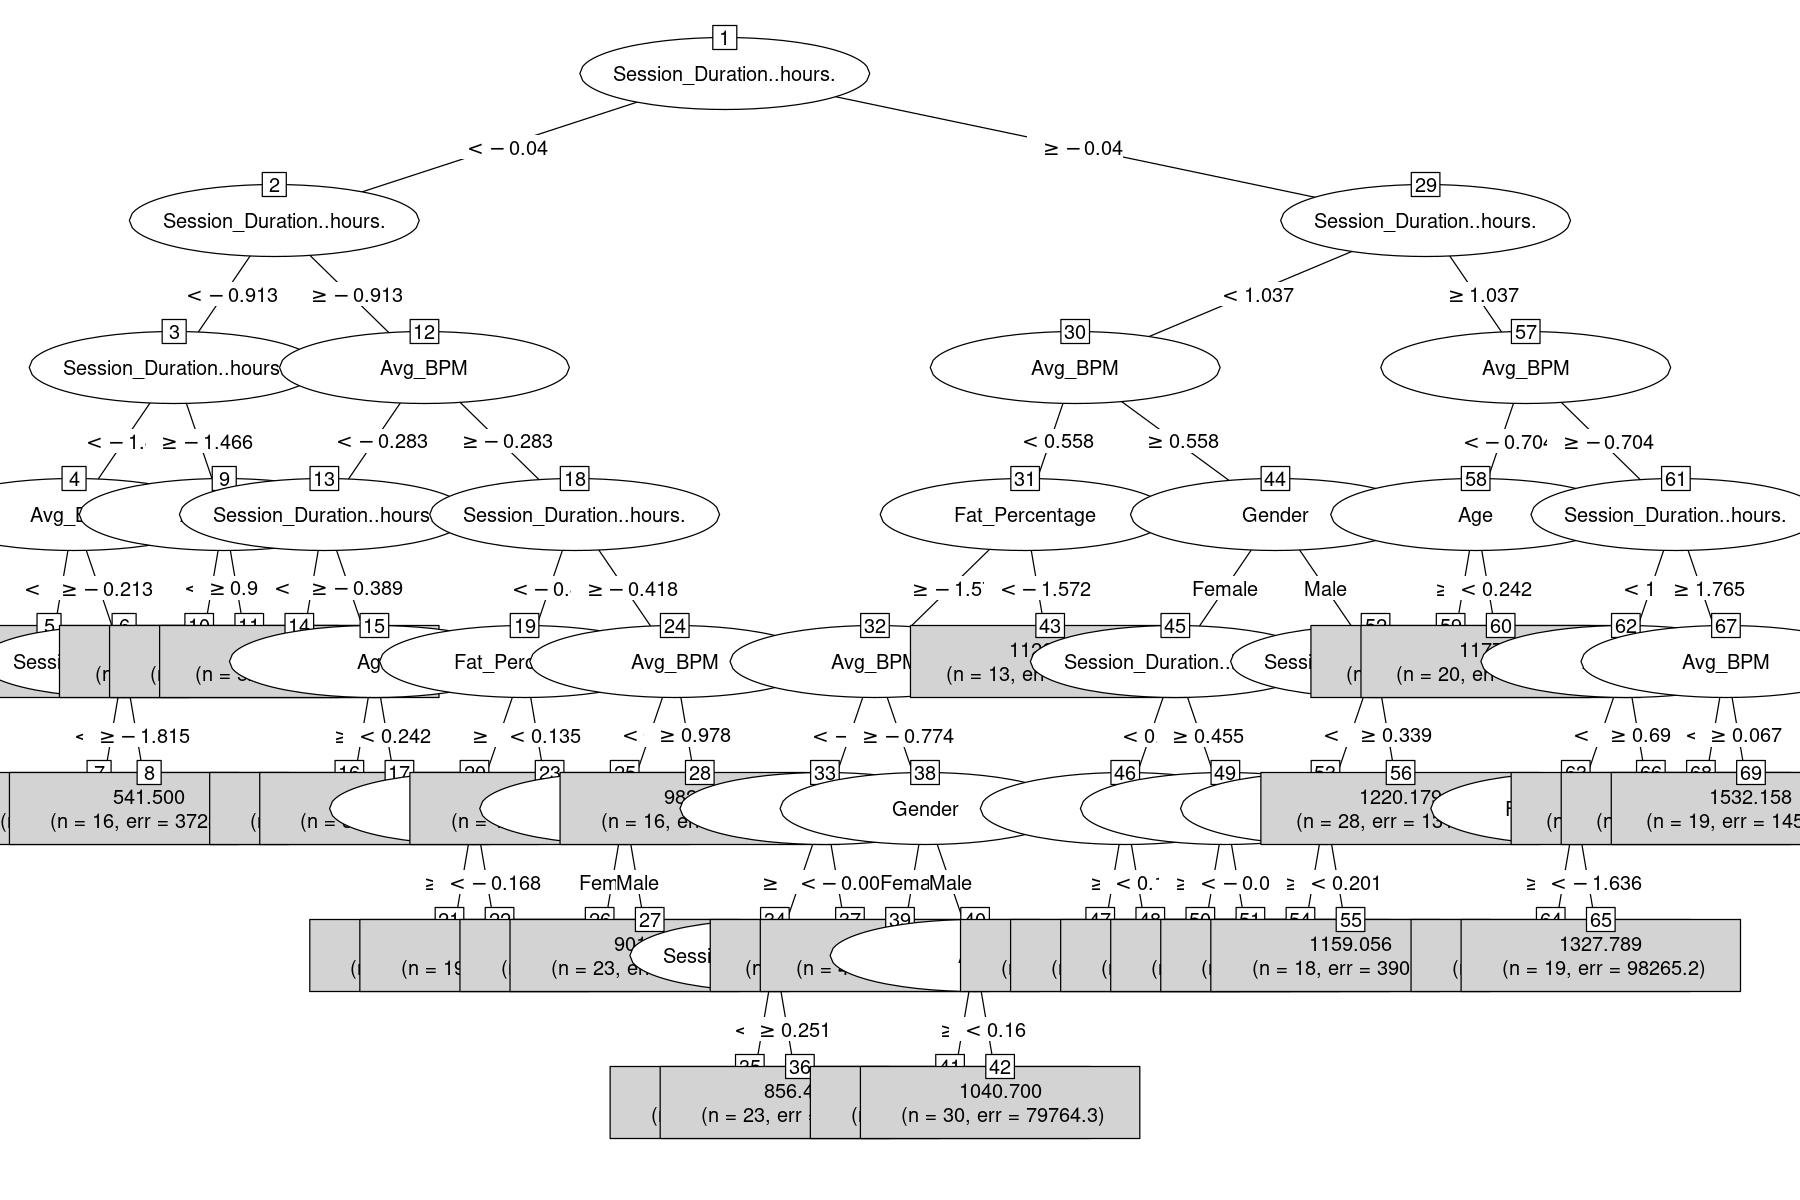

In [95]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(Calories_Burned~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
plot(as.party(tree.reg), type="simple")

Cet arbre montre clairement que la durée de la session est la variable qui contribue le plus au nombre de calories brulées ce qui correspond bien aux analyses faites dans la partie 1. En effet, l'arbre de décision construit son modèle en cherchant, à chaque étape, la variable qui permet de mieux séparer les classes. Donc,  la variable à la racine est celle qui permet le meilleur gain en information au départ et c'est donc la plus influente pour expliquer la variable cible.
Avg_Bpm a aussi une importance non négligeable par rapport aux calories brulées (nous nous intéresserons à l'importance de ces variables dans la partie Random Forest).

##### Graphe des résidus

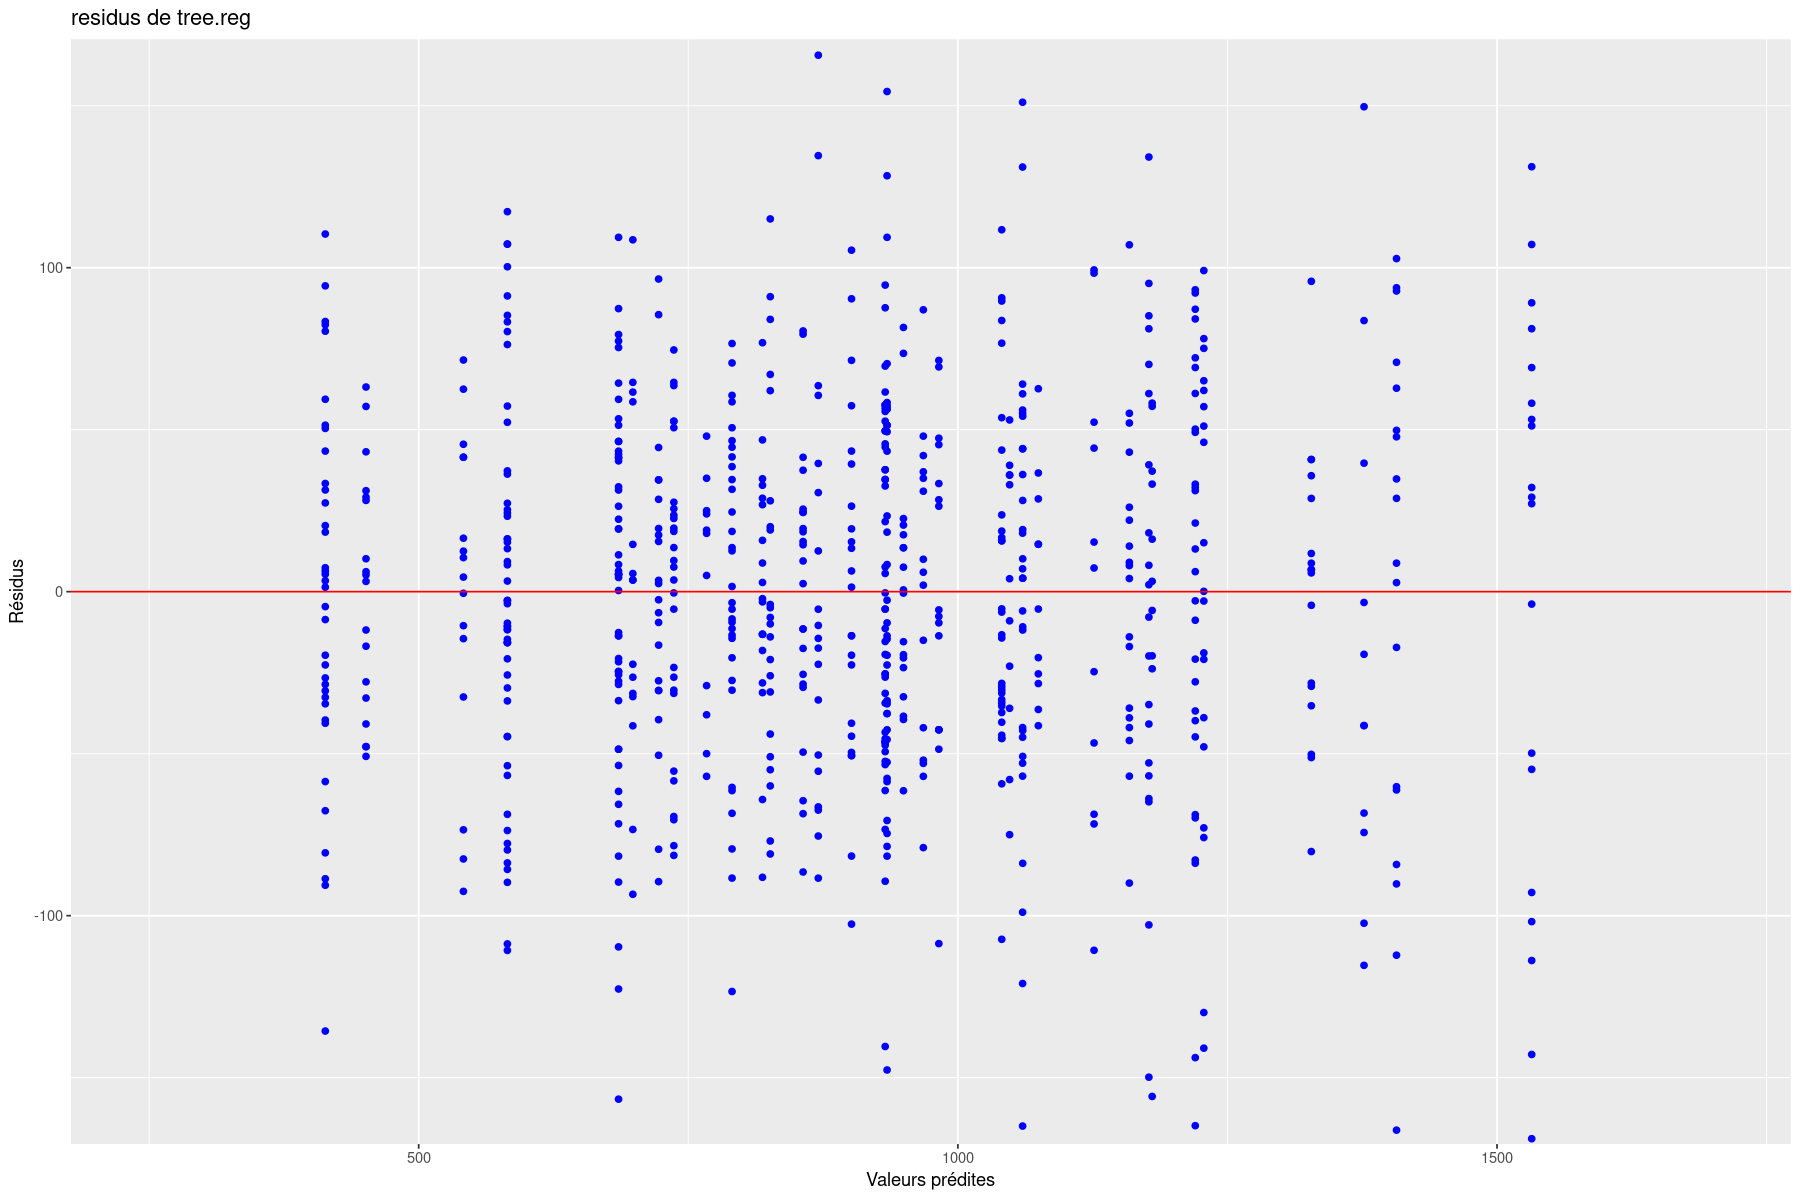

In [96]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"Calories_Burned"]
gplot.res(fit.tree,res.tree,"residus de tree.reg")

On a une forme de pluie car la variable à prédire est discrète. Ainsi les résidus vont naturellement se concentrer en bandes verticales autour des prédictions associées à chaque valeur discrète.
Nous n'observons pas de forme particulière ainsi pas de dépendance.

### 2.4.2 Erreur de régression

In [116]:
# Calcul des prévisions
pred.tree=predict(tree.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision en régression
erreur_arbreoptimal=sum((pred.treer-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne Arbre optimal :",erreur_arbreoptimal , "\n")

#Q2
q2.arbreoptimal <- 1 - sum((pred.tree - datestr[, "Calories_Burned"])^2) / 
               sum((datestr[, "Calories_Burned"] - mean_train)^2)
cat("Q2 pour l'arbre optimal :", q2.arbreoptimal, "\n")


Erreur quadratique moyenne Arbre optimal : 6325.555 
Q2 pour l'arbre optimal : 0.9144758 


Avec une erreur de prévision sur l'échantillon test de 6325, l'arbre optimal est moins précis que le SVR et les modèles linéaires. On va tester de combiner plusieurs arbres pour obtenir une méthode plus performante. En effet, un seul arbre est plutôt rapide et interprétable mais il est instable : s’il voit des données un peu différentes, il peut donner un résultat complètement différent. On va donc construire plusieurs arbres sur des jeu de données différentes, c'est le Random Forest.

## 2.5 Forêt aléatoire

Comme on vient de l'expliquer précédemment, on va chercher à combiner plusieurs arbres pour obtenir un modèle plus robuste et plus précis. 

In [117]:
library(randomForest)
library(e1071)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


L'objet suivant est masqué depuis ‘package:ggplot2’:

    margin




### 2.5.1 Regression

Dans un premier temps, on affiche l'erreur de validation interne et l'erreur de généralisation sur l’échantillon test externe selon le nombre d'abre pour déterminer le nombre d'arbre optimal 

In [118]:
rf.reg=randomForest(Calories_Burned~., data=datappr,xtest=datestr[,-8],ytest=datestr[,"Calories_Burned"],
   ntree=600,do.trace=50,importance=TRUE)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |     4608     6.20 |     4884     6.61 |
 100 |     4059     5.46 |     4697     6.35 |
 150 |     4010     5.39 |     4679     6.33 |
 200 |     4017     5.40 |     4754     6.43 |
 250 |     3994     5.37 |     4782     6.47 |
 300 |     4017     5.40 |     4869     6.59 |
 350 |     4003     5.39 |     4882     6.60 |
 400 |     3967     5.34 |     4839     6.55 |
 450 |     3960     5.33 |     4884     6.61 |
 500 |     3937     5.30 |     4871     6.59 |
 550 |     3918     5.27 |     4841     6.55 |
 600 |     3932     5.29 |     4865     6.58 |


500 arbres semble être un choix optimal car l'erreur interne (out of bag) semble "ralentir" à partir de 500 arbres.
Un autre paramètre très important dans le random Forest est le nombre de variable gardé à chaque noeud. En effet, quand un arbre de la forêt doit choisir sur quelle variable couper à un nœud, il ne regarde pas toutes les variables, mais seulement un sous-ensemble de taille mtry choisi au hasard. Le principal objectif de cette méthode est de diversifier les arbres de la forêt afin qu'ils soient moins corrélés entre eux. Le choix de mtry est une étape cruciale pour notre algorithme Random Forest car il a un impact direct sur le biais, la variance, et la performance globale du modèle : 

- si mtry est trop grand : chaque arbre est plus puissant individuellement car chaque split a accès à plus de variables et a donc plus de chances de trouver la meilleure séparation possible localement. Cependant, tous les arbres risquent d'être corréles fortement et c'est contradictoire avec l'objectif de Random Forest (on se rapproche d'un algortithme de bagging).
- Si mtry est trop petit : on a alors une forêt robuste et plus stable de part la diversité entre chaque arbre. Cependant, chaque split se fait avec trop peu de variables, donc avec des choix sous-optimaux.

Il faut donc trouver un bon compromis et c'est le sujet de l'algortithme ci dessous 


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


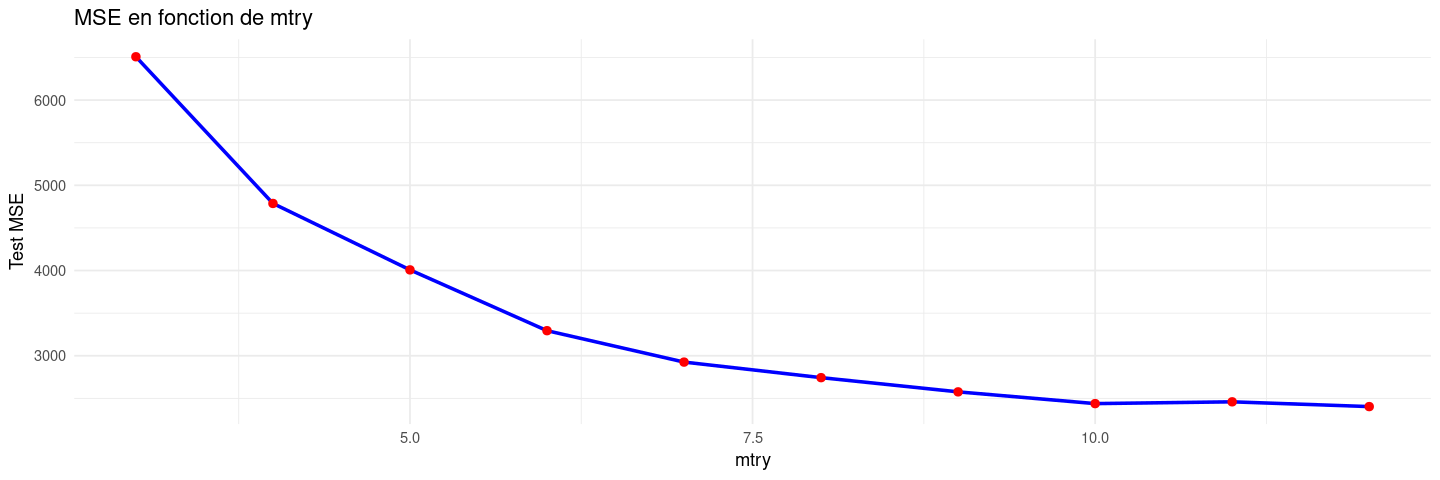

In [119]:
mtry_vals <- 3:12
test_mse <- numeric(length(mtry_vals))

for (i in seq_along(mtry_vals)) {
  set.seed(123)
  rf <- randomForest(Calories_Burned ~ ., data = datappr,
                     xtest = datestr[, -8],
                     ytest = datestr[, "Calories_Burned"],
                     mtry = mtry_vals[i],
                     ntree = 500)

  test_mse[i] <- rf$test$mse[500]  # Erreur après 500 arbres
}
# Mettre les résultats dans un data frame
df_mse <- data.frame(
  mtry = mtry_vals,
  MSE = test_mse
)

# Tracer avec ggplot2
ggplot(df_mse, aes(x = mtry, y = MSE)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "red", size = 2) +
  ggtitle("MSE en fonction de mtry") +
  xlab("mtry") +
  ylab("Test MSE") +
  theme_minimal()


Le mrty optimal est 10.

Le code au dessus ne fait pas de validation croisée.

Déterminons le mtry optimal par validation croisée.

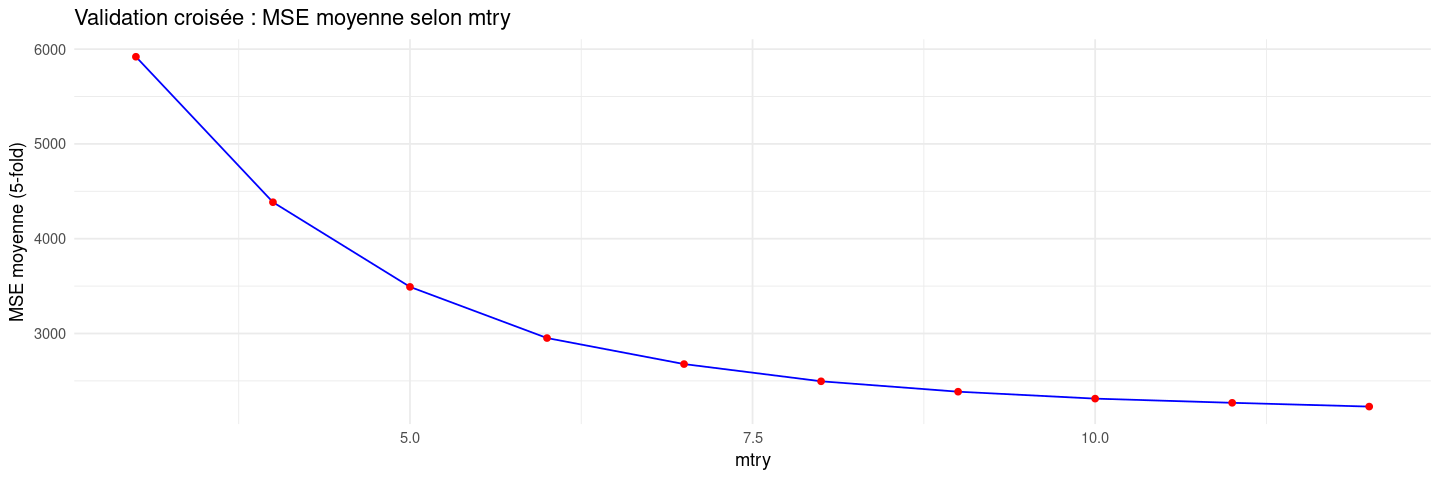

In [120]:
set.seed(123)

k <- 5
mtry_vals <- 3:12
folds <- sample(rep(1:k, length.out = nrow(datappr)))
cv_mse <- numeric(length(mtry_vals))

# Boucle sur les valeurs de mtry
for (j in seq_along(mtry_vals)) {
  mse_folds <- numeric(k)
  
  for (i in 1:k) {
    # Séparer les données : test = fold i, train = tous les autres
    test_idx <- which(folds == i)
    train_data <- datappr[-test_idx, ]
    test_data  <- datappr[test_idx, ]
    
    # Entraîner le modèle
    rf <- randomForest(Calories_Burned ~ ., data = train_data,
                       mtry = mtry_vals[j], ntree = 500)
    
    # Prédire sur le fold de test
    preds <- predict(rf, newdata = test_data)
    
    # Calculer la MSE pour ce fold
    mse_folds[i] <- mean((test_data$Calories_Burned - preds)^2)
  }
  
  # Moyenne des MSE sur les folds
  cv_mse[j] <- mean(mse_folds)
}

# Résultats sous forme de data frame
df_cv <- data.frame(
  mtry = mtry_vals,
  MSE = cv_mse
)

ggplot(df_cv, aes(x = mtry, y = MSE)) +
  geom_line(color = "blue") +
  geom_point(color = "red") +
  ggtitle("Validation croisée : MSE moyenne selon mtry") +
  xlab("mtry") +
  ylab("MSE moyenne (5-fold)") +
  theme_minimal()


Nous décidons ainsi de bien garder mtry égal à 10 car la MSE se stabilise à partir de cette valeur.

In [125]:
#modèle optimal
set.seed(23)
rf.reg=randomForest(Calories_Burned~., data=datappr,xtest=datestr[,-8],ytest=datestr[,"Calories_Burned"],
   ntree=500,do.trace=50,mtry=10,importance=TRUE)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |     2426     3.26 |     2871     3.88 |
 100 |     2115     2.85 |     2611     3.53 |
 150 |     2066     2.78 |     2570     3.48 |
 200 |     2042     2.75 |     2510     3.40 |
 250 |     2033     2.73 |     2500     3.38 |
 300 |     2018     2.72 |     2489     3.37 |
 350 |     2026     2.73 |     2470     3.34 |
 400 |     2016     2.71 |     2459     3.33 |
 450 |     2019     2.72 |     2465     3.33 |
 500 |     2017     2.71 |     2458     3.32 |


On a un modèle de forêt optimisé avec une erreur out of bag beaucoup plus faible.

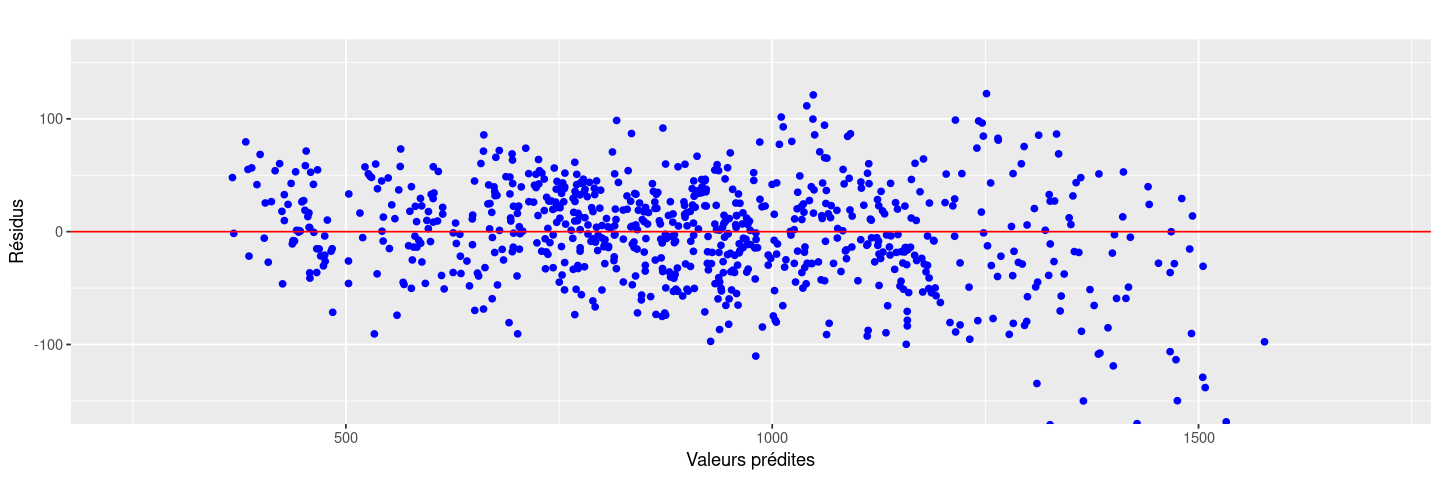

In [122]:
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"Calories_Burned"]
gplot.res(fit.rfr,res.rfr,titre="")

On a bien une absence de structure : les résidus sont indépendants des valeurs prédites.

### 2.5.2 Prévision de l'échantillon test

In [126]:

# Forêts aléatoires
pred.rfr=rf.reg$test$predicted
# Erreur quadratique moyenne de prévision
erreur_randomforest=sum((pred.rfr-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne Foret aléatoire :" ,erreur_randomforest, "\n")

q2.randomforest <- 1 - sum((pred.rfr - datestr[, "Calories_Burned"])^2) / 
               sum((datestr[, "Calories_Burned"] - mean_train)^2)

cat("Q2 pour Random Forest :", q2.randomforest, "\n")


Erreur quadratique moyenne Foret aléatoire : 2457.798 
Q2 pour Random Forest : 0.9667695 


Ainsi les forêts aléatoires proposent un bien meilleur résultat que l'arbre optimal avec une MSE à 2457. C’est une amélioration logique, car les forêts aléatoires réduisent la variance du modèle grâce à l’agrégation de plusieurs arbres construits sur des sous-échantillons. 

### 2.5.3 Importance des variables

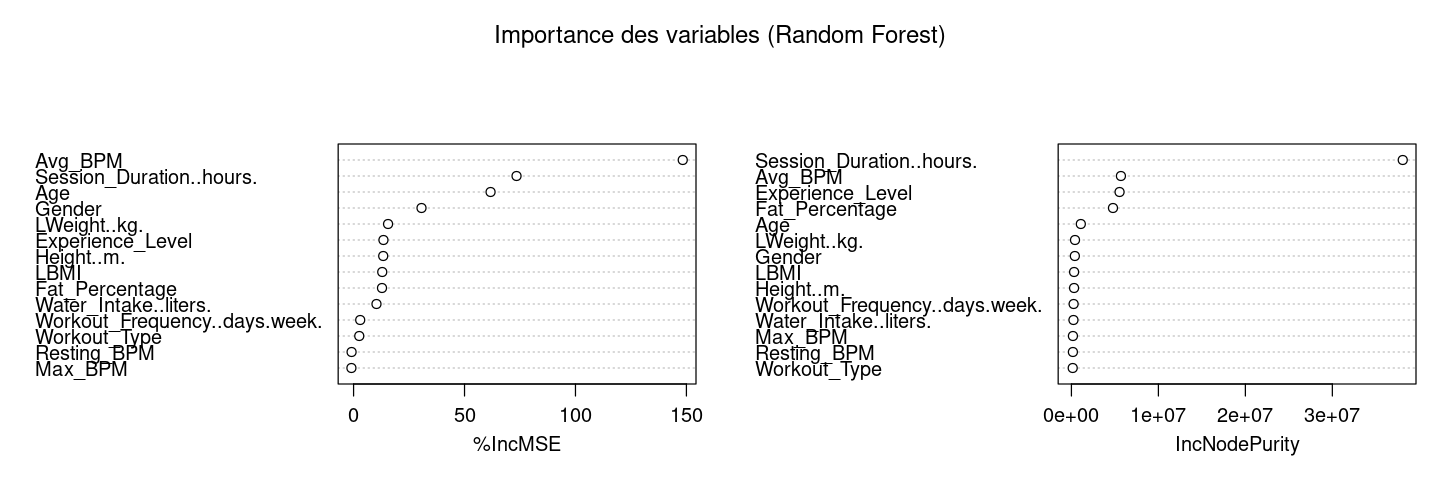

In [127]:
varImpPlot(rf.reg, main = "Importance des variables (Random Forest)")

D'après le graphique de gauche, nous tirons deux analyses.

La variable Avg_BPM (fréquence cardiaque moyenne) se distingue avec une IncMSE supérieure à 150, ce qui montre qu’elle joue un rôle majeur dans la prédiction des calories brûlées.

Ensuite, Session_duration_hours (durée de la session) a également une forte contribution, avec une IncMSE autour de 100.

Par ailleurs, d'après le graphique de droite, nous pouvons dire que la durée de la session est la variable la plus influente avec une augmentation massive de la pureté des nœuds, indiquant que cette variable est très fréquemment utilisée pour diviser les arbres.

Avg_BPM, Experience_Level, et Fat_Percentage sont les suivantes, confirmant leur rôle non négligeable dans la structure décisionnelle des arbres.

Ainsi, Avg_BPM et Session_duration_hours apparaissent comme les variables les plus déterminantes dans la prédiction des calories brûlées, selon les deux critères d’importance, confirmant les hypothèses que l'on avait déjà effectué précedemment.

Leur forte contribution suggère que l’intensité et la durée de l’effort physique sont des déterminants clés de la dépense énergétique.
Des variables comme Age, Gender, Fat_Percentage ou encore Experience_Level ont un rôle secondaire mais non négligeable, probablement en intéraction avec d'autres facteurs physiologiques.


## 2.6 Boosting 

Dans cette partie, nous allons performer l'algorithme de Gradient Boosting. L'idée de cette méthode est de combiner plusieurs prédicteurs faibles et simples pour obtenir un prédicteur robuste. Cependant, la combinaison de ces prédicteurs ne se fait pas de façon aléatoire, chaque nouveau prédicteur cherche à corriger l'erreur du modèle précédent en suivant le gradient de l’erreur globale. Ainsi, le modèle final est obtenu en corrigeant progressivement les erreurs précédentes, en ajoutant à chaque fois un petit modèle qui essaie de rapprocher la prédiction des bonnes réponses.

### 2.6.1 Régression

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



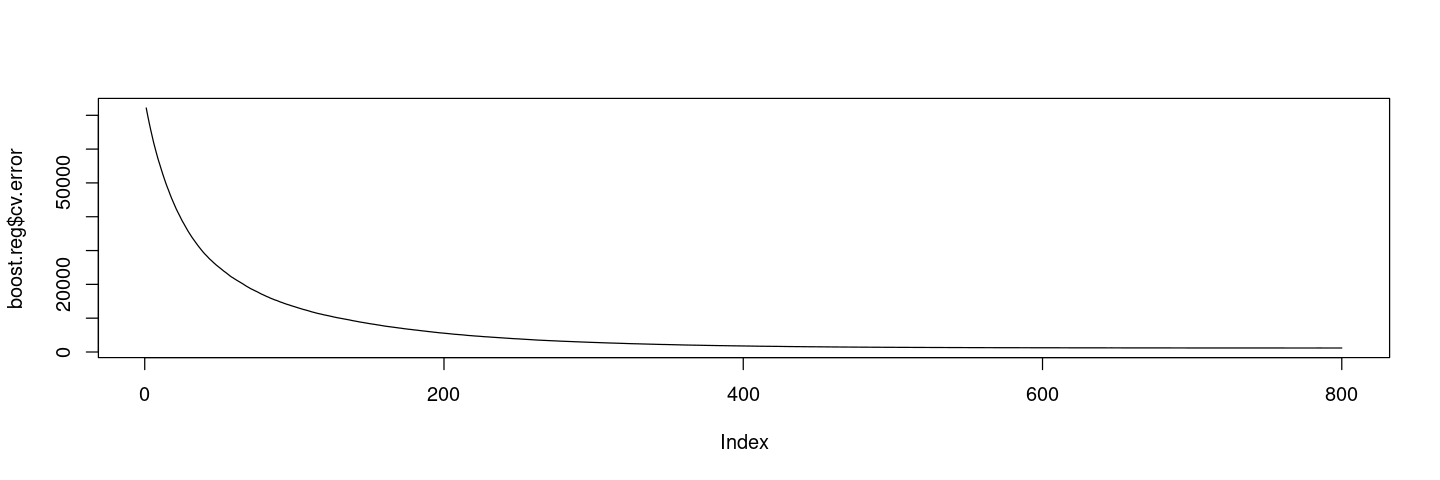

In [128]:
library(gbm)

boost.reg = gbm(Calories_Burned ~ ., data = datappr, distribution = "gaussian", n.trees = 800, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)

# on fixe verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error, type = "l")

On va estimer la valeur optimale du nombre d'arbre par validation croisée.

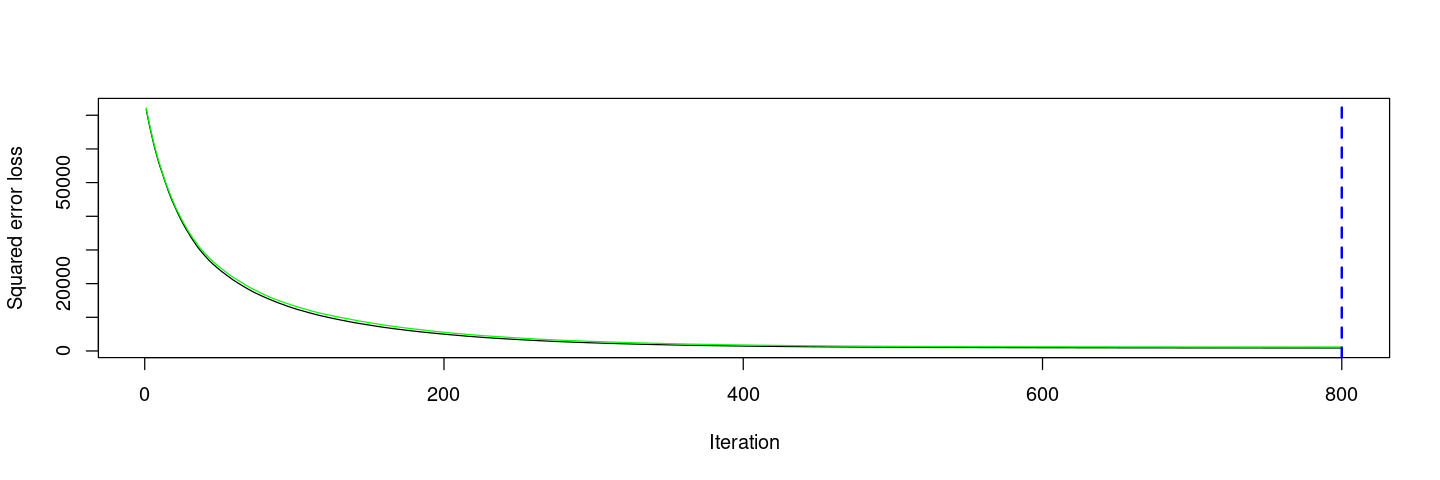

In [129]:
# nombre optimal d'itérations par validation croisée
best.iter=gbm.perf(boost.reg,method="cv")

Le nombre d'arbre optimal est le plus grand soit 800 arbres. On pourrait penser que la valeur optimale se situe donc après 800. Toutefois, la courbe est stable pour 800 donc nous gardons ntree=800. 

In [130]:
set.seed(123)
boost.reg = gbm(Calories_Burned ~ ., data = datappr, distribution = "gaussian", n.trees = 800, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)


##### Calcul des résidus sur l'échantillon d'apprentissage

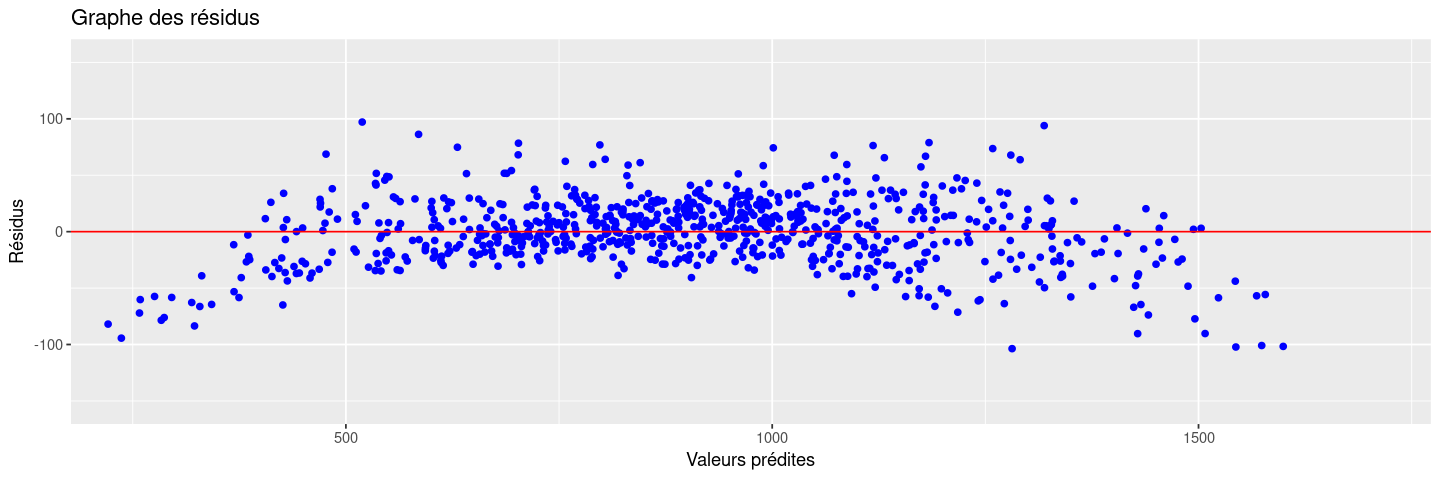

In [132]:
fit.boostr=boost.reg$fit
res.boostr=fit.boostr-datappr[,"Calories_Burned"]
gplot.res(fit.boostr,res.boostr,titre="Graphe des résidus")

### 2.6.2 Prévision de l'échantillon test, erreur de régression

In [135]:
pred.boostr=predict(boost.reg,newdata=datestr,n.trees=800)
# Erreur quadratique moyenne de prévision
erreur_boosting=sum((pred.boostr-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne Boosting :",erreur_boosting, "\n")

#Q2
q2.boosting <- 1 - sum((pred.boostr - datestr[, "Calories_Burned"])^2) / 
               sum((datestr[, "Calories_Burned"] - mean_train)^2)
cat("Q2 pour le Boosting :", q2.boosting, "\n")


Erreur quadratique moyenne Boosting : 1522.04 
Q2 pour le Boosting : 0.9794214 


Le boosting a de bonnes performances. Toutefois, son temps de calcul est plus long et son interprétabilité plus faible.

## 2.7 Réseau de neurones

Dans cette dernière partie, l'objectif est d'apprendre automatiquement des relations complexes et non linéaires entre les variables explicatives et Calories_Burned via un réseau de neurones.
Le réseau est composé de couches de neurones. Chaque neurone effectue une combinaison des entrées (avec des poids et un biais), suivie d'une fonction d’activation. C’est un modèle puissant mais qui nécessite une hyper-paramétrisation (nombre de couches, taille des couches,...) et une paramétrisation précise.

### 2.7.1 Régression

In [136]:
library(nnet)
# apprentissage

# attention au paramètre linout dans le cas de la régression
nnet.reg=nnet(Calories_Burned~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=2000) 

# weights:  106
initial  value 696614301.204971 
iter  10 value 11815488.806902
iter  20 value 9907992.935649
iter  30 value 9239569.297350
iter  40 value 8893252.526438
iter  50 value 8279860.444678
iter  60 value 7823505.581417
iter  70 value 7496233.585802
iter  80 value 7328098.849022
iter  90 value 7183612.038981
iter 100 value 7022005.021008
iter 110 value 6961450.763896
iter 120 value 6927927.812937
iter 130 value 6873960.469433
iter 140 value 6835394.118427
iter 150 value 6778453.455402
iter 160 value 6458490.285151
iter 170 value 5707309.142937
iter 180 value 5505328.310736
iter 190 value 5280869.550518
iter 200 value 5214856.226909
iter 210 value 4944067.162798
iter 220 value 4801973.635761
iter 230 value 4764360.572225
iter 240 value 4696028.822501
iter 250 value 4425686.362202
iter 260 value 3301076.383796
iter 270 value 2258556.561408
iter 280 value 1596727.804780
iter 290 value 1382527.671272
iter 300 value 1291937.213776
iter 310 value 1243275.592187
iter 320 value 11964

2 paramètres cruciaux pour notre réseau de neurones sont : 
- size : Taille de la couche cachée	(Nombre de neurones dans la couche cachée). Plus size est grand, plus le réseau a de la capacité à apprendre des relations complexes (modèles plus puissants). Un size trop petit implique un modèle qui n'a pas suffisamment de capacité.
- decay : coefficient de régularisation L2 (penalisation des poids) qui contrôle la complexité du modèle. Plus decay est grand plus on a une forte régularisation. Un decay trop petit offre un modèle plus libre mais avec un risque de surapprentissage.

Nous cherchons les paramètres optimaux grâce à la fonction Tune.nnet qui fait un balayage combinatoire des valeurs de size et decay (grid search), pour trouver la combinaison qui minimise l’erreur de validation.



In [ ]:
set.seed(123) 
#il faut le paramètre linout=true dans le cas de la régression
plot(tune.nnet(Calories_Burned~.,data=datappr,size=c(3,4,5,6,7,8),decay=c(1,2,3,4,5,6,7),maxit=1000,linout=TRUE))
system.time(tune.nnet(Calories_Burned~.,data=datappr,size=c(3,4,5,6,7,8),decay=c(1,2,3,4,5,6,7),maxit=1000,linout=TRUE))

D'après les graphiques, des paramètres optimaux pour size et decay sont respectivement 7 et 2.

In [150]:
set.seed(12) 
#apprentissage avec les paramètres optimaux
nnet.reg=nnet(Calories_Burned~.,data=datappr,size=7,decay=2,linout=TRUE,maxit=2000)
summary(nnet.reg)

# weights:  148
initial  value 696883965.501210 
iter  10 value 118644678.015947
iter  20 value 88627878.121117
iter  30 value 63450019.639653
iter  40 value 49996167.600951
iter  50 value 40430990.689757
iter  60 value 33401046.240214
iter  70 value 29117948.822376
iter  80 value 26207782.896068
iter  90 value 25131846.335971
iter 100 value 20890792.604868
iter 110 value 18775217.199023
iter 120 value 18289999.638604
iter 130 value 17931531.299032
iter 140 value 17460047.281534
iter 150 value 15544863.380140
iter 160 value 14053586.745768
iter 170 value 13138573.305211
iter 180 value 12549672.255530
iter 190 value 12059872.525297
iter 200 value 11748181.514475
iter 210 value 11640530.628969
iter 220 value 11404660.874059
iter 230 value 11189278.691362
iter 240 value 10952944.453460
iter 250 value 10386457.015276
iter 260 value 10065578.052358
iter 270 value 9483727.188147
iter 280 value 8898104.394158
iter 290 value 8068707.450036
iter 300 value 6847462.063547
iter 310 value 5506568.8

a 19-7-1 network with 148 weights
options were - linear output units  decay=2
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   2.70    0.18   -0.42    3.83    0.02   -0.44    0.01    1.42    0.02   -0.40 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
   0.06    0.18    0.11   -0.52   -2.16    3.43    2.87    2.04    6.78   -7.17 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -0.02   -2.59  -12.05   -2.06    0.93   -7.56    8.32  -11.92    7.33    2.96 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
   0.63   -7.43    6.61   -1.69  -11.24   -8.75   12.21  -12.08   -5.75   -8.89 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -2.05   -0.07    0.43   -0.71   -0.11    0.12    0.13    2.00   -0.17   -0.56 
i10->h3 i11->h3 i12->h3 i13->h3 i14->h3 i15->h3 i16->h3 i17->h3 i18->h3 i19->h3 
   0.11    0.22    0.05   -1.62

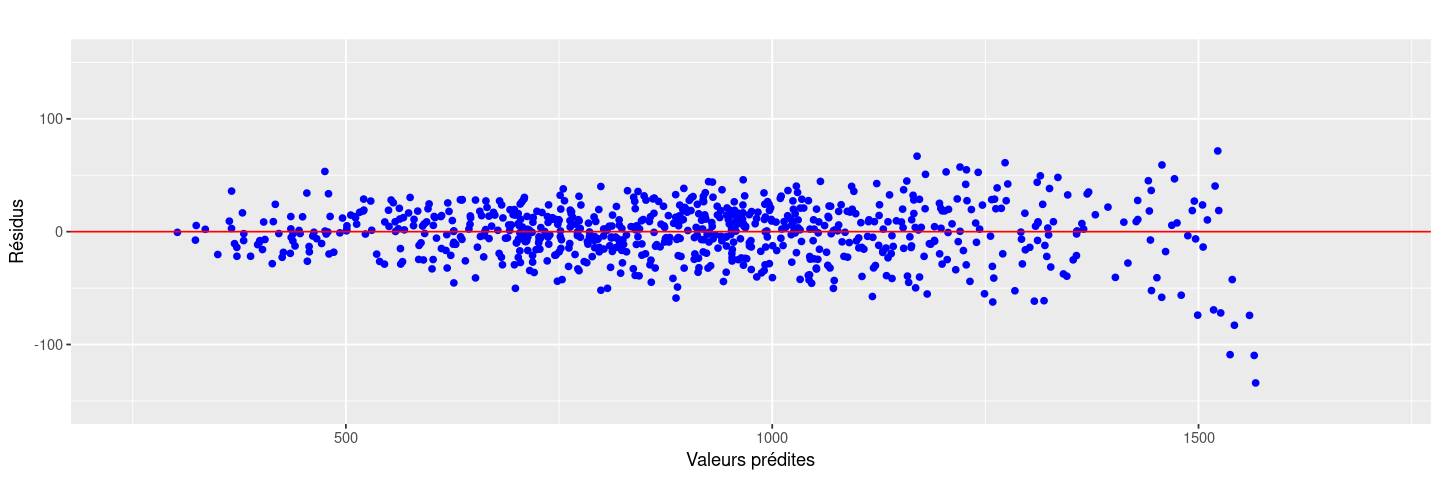

In [151]:
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"Calories_Burned"]
gplot.res(fit.nnetr,res.nnetr,titre="")

Les résidus sont bien aléatoires et independants.

### 2.7.2 Prévision de l'échantillon test, erreur de régression

In [152]:
set.seed(12)
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
#pred.nnetq=predict(nnet.dis,newdata=datestq) 
# Erreur quadratique moyenne de prévision
erreur_RDN = sum((pred.nnetr-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne RdN :",erreur_RDN, "\n")

#Q2
q2.rdn<- 1 - sum((pred.nnetr- datestr[, "Calories_Burned"])^2) / 
               sum((datestr[, "Calories_Burned"] - mean_train)^2)
cat("Q2 pour le réseau de neurones :", q2.rdn, "\n")


Erreur quadratique moyenne RdN : 1629.631 
Q2 pour le réseau de neurones : 0.9779667 


Il est important de noter que le tuning des paramètres pour le réseau de neurones est assez long et très couteux. De plus, nous observons une certaine variabilité des résultats due à l'initialisation aléatoire. Ici d'autres paramètres sont peut-être plus optimaux mais le coût de calcul pour leur recherche est conséquent et les résultats sont variables. 

## 2.8 Comparaison finale des différents modèles

Finalement, voici les résultats des différents modèles sur l'échantillon test. Pour des raisons d'explicabilité et d'interprétation des résultats nous affichons la RMSE et non la MSE car la RMSE est dans la même unité que "Calories_Burned", soit en calories.

In [160]:
cat("RMSE RdN :",sqrt(erreur_RDN),"\n")

cat("RMSE Boosting :",sqrt(erreur_boosting),"\n")
cat("RMSE Foret aléatoire :" ,sqrt(erreur_randomforest),"\n")
cat("RMSE Arbre optimal :",sqrt(erreur_arbreoptimal) ,"\n")

cat("RMSE pour un SVR avec noyau radial :",sqrt(erreur_SVR_radial) , "\n")

cat("RMSE Lasso (lambda.min) :", sqrt(mse.lasso.min), "\n")
cat("RMSE Lasso (lambda.1se) :", sqrt(mse.lasso.1se), "\n")

cat("RMSE Ridge (lambda.min) :", sqrt(mse.ridge.min), "\n")
cat("RMSE Ridge (lambda.1se) :", sqrt(mse.ridge.1se), "\n")

cat("RMSE Modèle linéaire (sans sélection de variable) :", sqrt(mse.lm), "\n")
cat("RMSE Modèle quadratique (sélection AIC) :", sqrt(mse.quadratique.aic), "\n")



RMSE RdN : 40.36869 
RMSE Boosting : 39.01333 
RMSE Foret aléatoire : 49.57619 
RMSE Arbre optimal : 79.53336 
RMSE pour un SVR avec noyau radial : 29.232 
RMSE Lasso (lambda.min) : 44.91737 
RMSE Lasso (lambda.1se) : 47.12117 
RMSE Ridge (lambda.min) : 54.31391 
RMSE Ridge (lambda.1se) : 55.5679 
RMSE Modèle linéaire (sans sélection de variable) : 44.65199 
RMSE Modèle quadratique (sélection AIC) : 27.31618 


In [163]:
# Création du tableau comparatif
results <- data.frame(
  Modèle = c(
    "Réseau de Neurones",
    "Boosting",
    "Forêt aléatoire",
    "Arbre optimal",
    "SVR (noyau radial)",
    "Lasso (lambda.min)",
    "Lasso (lambda.1se)",
    "Ridge (lambda.min)",
    "Ridge (lambda.1se)",
    "Linéaire (sans sélection)",
    "Quadratique (AIC)"
  ),
  RMSE = c(
    sqrt(erreur_RDN),
    sqrt(erreur_boosting),
    sqrt(erreur_randomforest),
    sqrt(erreur_arbreoptimal),
    sqrt(erreur_SVR_radial),
    sqrt(mse.lasso.min),
    sqrt(mse.lasso.1se),
    sqrt(mse.ridge.min),
    sqrt(mse.ridge.1se),
    sqrt(mse.lm),
    sqrt(mse.quadratique.aic)
  ),
  Q2 = c(
    q2.RDN,
    q2.boosting,
    q2.randomforest,
    q2.arbreoptimal,
    q2.svr.radial,
    q2.lasso.min,
    q2.lasso.1se,
    q2.ridge.min,
    q2.ridge.1se,
    q2.lm,
    q2.quadra.aic
  )
)

# Affichage du tableau
print(results)


                      Modèle     RMSE        Q2
1         Réseau de Neurones 40.36869 0.9779667
2                   Boosting 39.01333 0.9794214
3            Forêt aléatoire 49.57619 0.9667695
4              Arbre optimal 79.53336 0.9144758
5         SVR (noyau radial) 29.23200 0.9884467
6         Lasso (lambda.min) 44.91737 0.9727216
7         Lasso (lambda.1se) 47.12117 0.9699792
8         Ridge (lambda.min) 54.31391 0.9601147
9         Ridge (lambda.1se) 55.56790 0.9582517
10 Linéaire (sans sélection) 44.65199 0.9730430
11         Quadratique (AIC) 27.31618 0.9899114


On remarque que le modèle quadratique avec selection de variable avec AIC à la plus petite RMSE ainsi est le plus performant. Il est suivi par SVR avec un noyau radial et par le modèle par boosting avec une RMSE égale à 39. Parmis ces modèles, si notre critère est l'interprétabilité du modèle, nous garderons le modèle quadratique car SVR et Boosting ont un niveau d'interprétabilité respectivement très faible et moyen.

##### Retour sur l'analyse de données

Les résultats obtenus sont cohérents avec l'analyse exploratoire des données. En effet, les modèles ont confirmé nos analyses sur la grande importance de la variable "Durée de la session". Toutefois, nous n'avions pas trouvé grande importance à la variable "Avg_BPM" dans notre analyse exploratoire alors que les modèles de prédiction ont mis en avant cette variable.

<h1 style="color:red">III- Prédiction du niveau d'expérience </h1>

## Construction des échantillons pour: Experience_Level.

In [31]:
# construction de l'échantillon d'apprentissage
datappq0 <- gym[appri, ]
# construction de l'échantillon test 
datestq0 <- gym[testi, ] 

# vérification
str(datappq0)
str(datestq0)
#summary(datappq)

'data.frame':	778 obs. of  15 variables:
 $ Age                          : int  56 46 32 38 56 36 40 28 28 41 ...
 $ Gender                       : Factor w/ 2 levels "Female","Male": 2 1 1 2 1 2 1 2 2 2 ...
 $ Height..m.                   : num  1.71 1.53 1.66 1.79 1.68 1.72 1.51 1.94 1.84 2 ...
 $ Max_BPM                      : int  180 179 167 188 168 174 189 185 169 179 ...
 $ Avg_BPM                      : int  157 151 122 158 156 169 141 127 136 136 ...
 $ Resting_BPM                  : int  60 66 54 68 74 73 64 52 64 69 ...
 $ Session_Duration..hours.     : num  1.69 1.3 1.11 0.64 1.59 1.49 1.27 1.03 1.08 1.18 ...
 $ Calories_Burned              : num  1313 883 677 556 1116 ...
 $ Workout_Type                 : Factor w/ 4 levels "Cardio","HIIT",..: 4 2 1 3 2 1 1 3 1 2 ...
 $ Fat_Percentage               : num  12.6 33.9 33.4 29.2 15.5 21.3 30.6 28.9 29.7 27.6 ...
 $ Water_Intake..liters.        : num  3.5 2.1 2.3 2.8 2.7 2.3 1.9 2.6 2.7 3.7 ...
 $ Workout_Frequency..days.week.:

In [32]:
#on recupère les qualitatives
which(sapply(datappq0, is.factor))

Gender                  Workout_Type 
                            2                             9 
Workout_Frequency..days.week.              Experience_Level 
                           12                            13

In [33]:
# Normalisation l'échantillon d'apprentissage
datappq=datappq0
datappq[,-c(2,9,12,13)]=scale(datappq0[,-c(2,9,12,13)])

# Normalisation de l'échantillon test à l'aide des caractéristiques de l'échantillon d'apprentissage
datestq=datestq0
datestq[,-c(2,9,12,13)]=scale(datestq0[,-c(2,9,12,13)],
                            center=sapply(datappq0[,-c(2,9,12,13)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappq0[,-c(2,9,12,13)],sd)) # on réduit avec les écart-types de l'échantillon d'apprentissage
summary(datappq)
summary(datestq)

      Age              Gender      Height..m.          Max_BPM        
 Min.   :-1.68603   Female:368   Min.   :-1.75705   Min.   :-1.73044  
 1st Qu.:-0.86543   Male  :410   1st Qu.:-0.82012   1st Qu.:-0.87212  
 Median : 0.03723                Median :-0.03934   Median : 0.07204  
 Mean   : 0.00000                Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.85783                3rd Qu.: 0.58528   3rd Qu.: 0.84454  
 Max.   : 1.67844                Max.   : 2.14683   Max.   : 1.61703  
    Avg_BPM          Resting_BPM       Session_Duration..hours.
 Min.   :-1.64966   Min.   :-1.64729   Min.   :-2.20804        
 1st Qu.:-0.87874   1st Qu.:-0.83521   1st Qu.:-0.60730        
 Median :-0.03774   Median :-0.02314   Median : 0.03299        
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000        
 3rd Qu.: 0.87334   3rd Qu.: 0.78894   3rd Qu.: 0.55687        
 Max.   : 1.78442   Max.   : 1.60101   Max.   : 2.15761        
 Calories_Burned      Workout_Type Fat_Percentage    Wa

      Age              Gender      Height..m.         Max_BPM        
 Min.   :-1.68603   Female: 94   Min.   :-1.7570   Min.   :-1.73044  
 1st Qu.:-0.86543   Male  :101   1st Qu.:-0.8982   1st Qu.:-0.87212  
 Median : 0.20135                Median :-0.3517   Median :-0.09962  
 Mean   : 0.05617                Mean   :-0.0958   Mean   :-0.11855  
 3rd Qu.: 0.93989                3rd Qu.: 0.5072   3rd Qu.: 0.67287  
 Max.   : 1.67844                Max.   : 2.1468   Max.   : 1.61703  
    Avg_BPM          Resting_BPM       Session_Duration..hours.
 Min.   :-1.64966   Min.   :-1.64729   Min.   :-2.17893        
 1st Qu.:-0.87874   1st Qu.:-0.69987   1st Qu.:-0.66551        
 Median : 0.03234   Median : 0.11221   Median : 0.00389        
 Mean   : 0.07978   Mean   : 0.03517   Mean   :-0.03253        
 3rd Qu.: 1.01350   3rd Qu.: 0.78894   3rd Qu.: 0.58598        
 Max.   : 1.78442   Max.   : 1.60101   Max.   : 2.07030        
 Calories_Burned      Workout_Type Fat_Percentage     Water_In

Maintenant nous allons créer plusieurs fonctions qui nous serviront pour l'analyse de nos modèles :


In [34]:
#Enfin, avant de passer aux différents algorithmes, définissons une fonction traçant plusieurs ROC curves

plot_multiclass_roc <- function(true_labels, prob_matrix, title = "Courbes ROC Multiclasse (One-vs-All)") {
  
  classes <- colnames(prob_matrix)
  colors <- rainbow(length(classes))
  aucs <- numeric(length(classes))  # Stocker les AUC
  
  # Initialiser le graphique
  plot(NULL, xlim = c(0, 1), ylim = c(0, 1),
       xlab = "FPR (1 - Spécificité)", ylab = "TPR (Sensibilité)",
       main = title)
  
  for (i in seq_along(classes)) {
    cls <- classes[i]
    bin_labels <- as.numeric(true_labels == cls)
    
    pred <- prediction(prob_matrix[, cls], bin_labels)
    perf <- performance(pred, "tpr", "fpr")
    auc <- performance(pred, "auc")@y.values[[1]]
    aucs[i] <- auc
    
    plot(perf, col = colors[i], add = TRUE, lwd = 2)
  }
  
  abline(a = 0, b = 1, lty = 2, col = "gray")
  
  # Légende avec AUC
  legend_labels <- paste0(classes, " (AUC = ", round(aucs, 3), ")")
  legend("bottomright", legend = legend_labels, col = colors, lwd = 2)
}

In [35]:
# Précision (rappel) par classe = vrais positifs / total des vrais exemples par classe
precision <- function(conf.mat) {
    precision_par_classe <- diag(conf.mat) / colSums(conf.mat)
    
    # Afficher les résultats
    precision_par_classe
    
    precision_df <- data.frame(
      Experience_Level = names(precision_par_classe),
      Precision = as.numeric(precision_par_classe)
    )
    print(precision_df)
}
    

In [36]:
#Charger le package 
library(nnet)

Warning message:
"le package 'nnet' a été compilé avec la version R 4.3.3"


## 3.2 Regression logitisque binaire 

Cette méthode est utilisée pour prédire la probabilité d'appartenance d'une observation à l'une des 2 classes possibles. Contrairement à la régression linéaire, elle est spécifiquement conçue pour les variables qualitatives (catégorielles).
Elle est adaptée lorsque la variable cible ne prend que deux valeurs, c'est un outil puissant pour les problèmes de classification binaire.

Dans notre projet, nous cherchons à prédire la variable Experience_Level, qui prend trois niveaux : 1, 2 et 3.
Cependant, la régression logistique classique multiclasse (multinomiale) n’est pas toujours adaptée lorsqu’on souhaite sélectionner un modèle via des critères d’information comme l’AIC ou le BIC. Ces critères ne sont pas toujours bien définis ou comparables dans le cas de plusieurs classes, ce qui complique l’interprétation des performances et la sélection du modèle le plus pertinent.

Pour contourner cette difficulté, nous avons choisi de décomposer le problème multiclasse en trois modèles de régression logistique binaire, chacun ciblant un niveau spécifique de la variable Experience_Level :
- Modèle 1 : prédire Experience_Level == 1 vs Experience_Level ≠ 1
- Modèle 2 : prédire Experience_Level == 2 vs Experience_Level ≠ 2
- Modèle 3 : prédire Experience_Level == 3 vs Experience_Level ≠ 3
Cela permet d’évaluer et comparer plus facilement les performances de chaque modèle selon des critères classiques (AIC, BIC, courbes ROC, etc.).

Cette approche permet une analyse plus fine de la contribution des variables explicatives à chaque niveau de l’expérience et autorise une évaluation indépendante de la qualité de chaque modèle.

### 3.2.1 Regression logitisque binaire sans sélection de variable

In [37]:
# === Pour le niveau 1 vs les autres ===
datappq1 <- datappq0
datappq1$Y_bin <- ifelse(datappq1$Experience_Level == 1, 1, 0) #On crée une nouvelle variable binaire Y_bin qui vaut : 1 si Experience_Level vaut 1 (le niveau qu’on veut prédire ici), 0 sinon (c’est-à-dire niveaux 2 ou 3) => c'est la cible du modèle binaire
datappq1$Experience_Level <- NULL  # suppression variable multiclass pour éviter de biaiser le modèle.

datestq1 <- datestq0
datestq1$Y_bin <- ifelse(datestq1$Experience_Level == 1, 1, 0)
datestq1$Experience_Level <- NULL

# Normalisation (en conservant la nouvelle colonne Y_bin)
quanti_cols <- setdiff(1:ncol(datappq1), c(2, 9, 12, 13, ncol(datappq1)))  # indices sans Y_bin
datappq1[, quanti_cols] <- scale(datappq0[, quanti_cols])
datestq1[, quanti_cols] <- scale(datestq0[, quanti_cols],
                                 center = sapply(datappq0[, quanti_cols], mean),
                                 scale  = sapply(datappq0[, quanti_cols], sd))

# === Pour le niveau 2 vs les autres ===
datappq2 <- datappq0
datappq2$Y_bin <- ifelse(datappq2$Experience_Level == 2, 1, 0)
datappq2$Experience_Level <- NULL

datestq2 <- datestq0
datestq2$Y_bin <- ifelse(datestq2$Experience_Level == 2, 1, 0)
datestq2$Experience_Level <- NULL

datappq2[, quanti_cols] <- scale(datappq0[, quanti_cols])
datestq2[, quanti_cols] <- scale(datestq0[, quanti_cols],
                                 center = sapply(datappq0[, quanti_cols], mean),
                                 scale  = sapply(datappq0[, quanti_cols], sd))

# === Pour le niveau 3 vs les autres ===
datappq3 <- datappq0
datappq3$Y_bin <- ifelse(datappq3$Experience_Level == 3, 1, 0)
datappq3$Experience_Level <- NULL

datestq3 <- datestq0
datestq3$Y_bin <- ifelse(datestq3$Experience_Level == 3, 1, 0)
datestq3$Experience_Level <- NULL

datappq3[, quanti_cols] <- scale(datappq0[, quanti_cols])
datestq3[, quanti_cols] <- scale(datestq0[, quanti_cols],
                                 center = sapply(datappq0[, quanti_cols], mean),
                                 scale  = sapply(datappq0[, quanti_cols], sd))


### Modèle 1 :

In [38]:
# Modèle minimal (intercept seul)
log.qm1 <- glm(Y_bin ~ 1, data = datappq1, family = binomial)

# Création du Scope pour le plus grand modèle possible
vars_explicatives <- setdiff(names(datappq1), "Y_bin")
scope_vars <- as.formula(
  paste("~ (", paste(vars_explicatives, collapse = " + "), ")^2")
) 

# algorithme stepwise en précisant le plus grand modèle possible avec interaction
log.qm1.step <- step(log.qm1, direction = "both",
                     scope = list(lower = ~1, upper = scope_vars),
                     family = binomial)

# Résumé du modèle avec interactions
summary(log.qm1.step)
anova(log.qm1.step, test = "Chisq")

# Prédiction sur l’échantillon test
pred1_inter <- predict(log.qm1.step, newdata = datestq1, type = "response")

# Matrice de confusion
table(pred1_inter > 0.5, datestq1$Y_bin)

Start:  AIC=1034.65
Y_bin ~ 1

                                Df Deviance     AIC
+ Workout_Frequency..days.week.  3   402.42  410.42
+ Session_Duration..hours.       1   710.07  714.07
+ Calories_Burned                1   772.43  776.43
+ Fat_Percentage                 1   936.77  940.77
+ Water_Intake..liters.          1  1023.83 1027.83
<none>                              1032.65 1034.65
+ LBMI                           1  1032.14 1036.14
+ LWeight..kg.                   1  1032.14 1036.14
+ Gender                         1  1032.51 1036.51
+ Avg_BPM                        1  1032.53 1036.53
+ Height..m.                     1  1032.57 1036.57
+ Age                            1  1032.63 1036.63
+ Resting_BPM                    1  1032.65 1036.65
+ Max_BPM                        1  1032.65 1036.65
+ Workout_Type                   3  1030.88 1038.88

Step:  AIC=410.42
Y_bin ~ Workout_Frequency..days.week.

                                Df Deviance     AIC
+ Session_Duration..hours. 


Call:
glm(formula = Y_bin ~ Workout_Frequency..days.week. + Session_Duration..hours., 
    family = binomial, data = datappq1)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      19.9868  1265.2216   0.016    0.987    
Workout_Frequency..days.week.3  -20.7019  1265.2216  -0.016    0.987    
Workout_Frequency..days.week.4  -40.4273  1649.1676  -0.025    0.980    
Workout_Frequency..days.week.5  -38.0986  2214.5691  -0.017    0.986    
Session_Duration..hours.         -1.8003     0.2398  -7.508 6.03e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1032.65  on 777  degrees of freedom
Residual deviance:  319.24  on 773  degrees of freedom
AIC: 329.24

Number of Fisher Scoring iterations: 19


Df Deviance  Resid. Df Resid. Dev Pr(>Chi)     
NULL                          NA        NA 777       1032.6549             NA
Workout_Frequency..days.week.  3 630.23696 774        402.4180  2.806488e-136
Session_Duration..hours.       1  83.17585 773        319.2421   7.506921e-20

       
          0   1
  FALSE 103  20
  TRUE   11  61

#### Modèle 2 :

In [39]:
# Modèle minimal
log.qm2 <- glm(Y_bin ~ 1, data = datappq2, family = binomial)

# Variables explicatives
vars_explicatives2 <- setdiff(names(datappq2), "Y_bin")
scope_vars2 <- as.formula(
  paste("~ (", paste(vars_explicatives2, collapse = " + "), ")^2")
)

# Stepwise avec interactions
log.qm2.step <- step(log.qm2, direction = "both",
                     scope = list(lower = ~1, upper = scope_vars2),
                     family = binomial)

# Résumé et test de significativité
summary(log.qm2.step)
anova(log.qm2.step, test = "Chisq")

# Prédiction
pred2_inter <- predict(log.qm2.step, newdata = datestq2, type = "response")

# Matrice de confusion
table(pred2_inter > 0.5, datestq2$Y_bin)


Start:  AIC=1060.04
Y_bin ~ 1

                                Df Deviance     AIC
+ Workout_Frequency..days.week.  3   688.53  696.53
+ Fat_Percentage                 1   967.77  971.77
+ Water_Intake..liters.          1  1016.89 1020.89
<none>                              1058.04 1060.04
+ Session_Duration..hours.       1  1057.68 1061.68
+ Max_BPM                        1  1057.72 1061.72
+ Height..m.                     1  1057.76 1061.76
+ Calories_Burned                1  1057.79 1061.79
+ Age                            1  1057.95 1061.95
+ Avg_BPM                        1  1057.96 1061.96
+ Gender                         1  1057.97 1061.97
+ Resting_BPM                    1  1057.98 1061.98
+ LBMI                           1  1058.02 1062.02
+ LWeight..kg.                   1  1058.02 1062.02
+ Workout_Type                   3  1056.63 1064.63

Step:  AIC=696.53
Y_bin ~ Workout_Frequency..days.week.

                                Df Deviance     AIC
+ Fat_Percentage           

Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"


                                               Df Deviance    AIC
+ Fat_Percentage:Workout_Frequency..days.week.  3   403.75 419.75
+ Gender                                        1   535.68 547.68
+ Calories_Burned                               1   571.71 583.71
+ Height..m.                                    1   575.84 587.84
+ Session_Duration..hours.                      1   580.53 592.53
<none>                                              585.39 595.39
+ LBMI                                          1   583.40 595.40
+ LWeight..kg.                                  1   583.40 595.40
+ Max_BPM                                       1   583.57 595.57
+ Resting_BPM                                   1   584.54 596.54
+ Avg_BPM                                       1   585.07 597.07
+ Water_Intake..liters.                         1   585.28 597.28
+ Age                                           1   585.39 597.39
+ Workout_Type                                  3   584.15 600.15
- Fat_Perc

Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"



Step:  AIC=419.75
Y_bin ~ Workout_Frequency..days.week. + Fat_Percentage + Workout_Frequency..days.week.:Fat_Percentage



Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numé

                                               Df Deviance    AIC
+ Session_Duration..hours.                      1   328.29 346.29
+ Calories_Burned                               1   333.69 351.69
+ Max_BPM                                       1   399.83 417.83
<none>                                              403.75 419.75
+ Gender                                        1   402.46 420.46
+ Age                                           1   403.16 421.16
+ LBMI                                          1   403.33 421.33
+ LWeight..kg.                                  1   403.33 421.33
+ Water_Intake..liters.                         1   403.34 421.34
+ Avg_BPM                                       1   403.42 421.42
+ Resting_BPM                                   1   403.75 421.75
+ Height..m.                                    1   403.75 421.75
+ Workout_Type                                  3   403.14 425.14
- Workout_Frequency..days.week.:Fat_Percentage  3   585.39 595.39


Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"



Step:  AIC=346.29
Y_bin ~ Workout_Frequency..days.week. + Fat_Percentage + Session_Duration..hours. + 
    Workout_Frequency..days.week.:Fat_Percentage



Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numé

                                                         Df Deviance    AIC
+ Session_Duration..hours.:Workout_Frequency..days.week.  3   318.42 342.42
+ Calories_Burned                                         1   326.25 346.25
<none>                                                        328.29 346.29
+ Gender                                                  1   326.80 346.80
+ Max_BPM                                                 1   326.94 346.94
+ Resting_BPM                                             1   327.81 347.81
+ Age                                                     1   327.82 347.82
+ Avg_BPM                                                 1   328.15 348.15
+ Water_Intake..liters.                                   1   328.17 348.17
+ LWeight..kg.                                            1   328.25 348.25
+ LBMI                                                    1   328.25 348.25
+ Height..m.                                              1   328.26 348.26
+ Session_Du

Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"



Step:  AIC=342.42
Y_bin ~ Workout_Frequency..days.week. + Fat_Percentage + Session_Duration..hours. + 
    Workout_Frequency..days.week.:Fat_Percentage + Workout_Frequency..days.week.:Session_Duration..hours.



Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numé

                                                         Df Deviance    AIC
- Workout_Frequency..days.week.:Fat_Percentage            3   318.42 336.42
<none>                                                        318.42 342.42
+ Session_Duration..hours.:Fat_Percentage                 1   317.07 343.07
+ Max_BPM                                                 1   317.29 343.29
+ Gender                                                  1   317.62 343.62
+ Resting_BPM                                             1   317.73 343.73
+ Calories_Burned                                         1   317.92 343.92
+ Age                                                     1   318.06 344.06
+ LBMI                                                    1   318.27 344.27
+ LWeight..kg.                                            1   318.27 344.27
+ Water_Intake..liters.                                   1   318.32 344.32
+ Avg_BPM                                                 1   318.42 344.42
+ Height..m.

Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"



Step:  AIC=336.42
Y_bin ~ Workout_Frequency..days.week. + Fat_Percentage + Session_Duration..hours. + 
    Workout_Frequency..days.week.:Session_Duration..hours.



Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numé

                                                         Df Deviance    AIC
- Fat_Percentage                                          1   319.24 335.24
<none>                                                        318.42 336.42
+ Session_Duration..hours.:Fat_Percentage                 1   317.07 337.07
+ Max_BPM                                                 1   317.29 337.29
+ Gender                                                  1   317.62 337.62
+ Resting_BPM                                             1   317.73 337.73
+ Calories_Burned                                         1   317.92 337.92
+ Age                                                     1   318.06 338.06
+ LWeight..kg.                                            1   318.27 338.27
+ LBMI                                                    1   318.27 338.27
+ Water_Intake..liters.                                   1   318.32 338.32
+ Avg_BPM                                                 1   318.42 338.42
+ Height..m.

Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"



Step:  AIC=335.24
Y_bin ~ Workout_Frequency..days.week. + Session_Duration..hours. + 
    Workout_Frequency..days.week.:Session_Duration..hours.



Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: des probabilités ont été ajustées numé

                                                         Df Deviance    AIC
<none>                                                        319.24 335.24
+ Gender                                                  1   317.63 335.63
+ Max_BPM                                                 1   318.18 336.18
+ Calories_Burned                                         1   318.34 336.34
+ Fat_Percentage                                          1   318.42 336.42
+ Resting_BPM                                             1   318.71 336.71
+ Age                                                     1   318.91 336.91
+ LBMI                                                    1   319.07 337.07
+ LWeight..kg.                                            1   319.07 337.07
+ Height..m.                                              1   319.11 337.11
+ Water_Intake..liters.                                   1   319.23 337.23
+ Avg_BPM                                                 1   319.24 337.24
+ Workout_Ty


Call:
glm(formula = Y_bin ~ Workout_Frequency..days.week. + Session_Duration..hours. + 
    Workout_Frequency..days.week.:Session_Duration..hours., family = binomial, 
    data = datappq2)

Coefficients:
                                                          Estimate Std. Error
(Intercept)                                             -2.557e+01  2.285e+04
Workout_Frequency..days.week.3                           2.628e+01  2.285e+04
Workout_Frequency..days.week.4                           7.522e+02  4.072e+04
Workout_Frequency..days.week.5                          -3.622e-07  8.706e+04
Session_Duration..hours.                                 3.442e-07  2.029e+04
Workout_Frequency..days.week.3:Session_Duration..hours.  1.800e+00  2.029e+04
Workout_Frequency..days.week.4:Session_Duration..hours. -1.014e+03  5.124e+04
Workout_Frequency..days.week.5:Session_Duration..hours. -3.440e-07  5.821e+04
                                                        z value Pr(>|z|)
(Intercept)         

Df Deviance   Resid. Df
NULL                                                   NA         NA 777      
Workout_Frequency..days.week.                           3 369.507185 774      
Session_Duration..hours.                                1   4.426284 773      
Workout_Frequency..days.week.:Session_Duration..hours.  3 364.865102 770      
                                                       Resid. Dev Pr(>Chi)    
NULL                                                   1058.0407            NA
Workout_Frequency..days.week.                           688.5335  8.901359e-80
Session_Duration..hours.                                684.1072  3.538947e-02
Workout_Frequency..days.week.:Session_Duration..hours.  319.2421  9.010345e-79

       
         0  1
  FALSE 95 11
  TRUE  20 69

#### Modèle 3 :

In [40]:
# Modèle minimal
log.qm3 <- glm(Y_bin ~ 1, data = datappq3, family = binomial)

# Variables explicatives
vars_explicatives3 <- setdiff(names(datappq3), "Y_bin")
scope_vars3 <- as.formula(
  paste("~ (", paste(vars_explicatives3, collapse = " + "), ")^2")
)

# Stepwise avec interactions
log.qm3.step <- step(log.qm3, direction = "both",
                     scope = list(lower = ~1, upper = scope_vars3),
                     family = binomial)

# Résumé et test de significativité
summary(log.qm3.step)
anova(log.qm3.step, test = "Chisq")

# Prédiction
pred3_inter <- predict(log.qm3.step, newdata = datestq3, type = "response")

# Matrice de confusion
table(pred3_inter > 0.5, datestq3$Y_bin)


Start:  AIC=784.49
Y_bin ~ 1



Warning message:
"glm.fit: l'algorithme n'a pas convergé"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: l'algorithme n'a pas convergé"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"


                                Df Deviance    AIC
+ Session_Duration..hours.       1     0.00   4.00
+ Fat_Percentage                 1     4.50   8.50
+ Workout_Frequency..days.week.  3   286.12 294.12
+ Calories_Burned                1   332.49 336.49
+ Water_Intake..liters.          1   641.15 645.15
<none>                               782.49 784.49
+ LBMI                           1   781.99 785.99
+ LWeight..kg.                   1   781.99 785.99
+ Max_BPM                        1   782.08 786.08
+ Height..m.                     1   782.40 786.40
+ Resting_BPM                    1   782.44 786.44
+ Age                            1   782.47 786.47
+ Gender                         1   782.47 786.47
+ Avg_BPM                        1   782.48 786.48
+ Workout_Type                   3   780.10 788.10


Warning message:
"glm.fit: l'algorithme n'a pas convergé"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"



Step:  AIC=4
Y_bin ~ Session_Duration..hours.



Warning message:
"glm.fit: l'algorithme n'a pas convergé"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: l'algorithme n'a pas convergé"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: l'algorithme n'a pas convergé"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: l'algorithme n'a pas convergé"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: l'algorithme n'a pas convergé"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: l'algorithme n'a pas convergé"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"
Warning message:
"glm.fit: l'algorithme n'a pas convergé"
Warning message:
"glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1"

                                Df Deviance    AIC
<none>                                 0.00   4.00
+ Fat_Percentage                 1     0.00   6.00
+ Water_Intake..liters.          1     0.00   6.00
+ Resting_BPM                    1     0.00   6.00
+ Height..m.                     1     0.00   6.00
+ Avg_BPM                        1     0.00   6.00
+ Calories_Burned                1     0.00   6.00
+ LBMI                           1     0.00   6.00
+ LWeight..kg.                   1     0.00   6.00
+ Age                            1     0.00   6.00
+ Max_BPM                        1     0.00   6.00
+ Gender                         1     0.00   6.00
+ Workout_Frequency..days.week.  3     0.00  10.00
+ Workout_Type                   3     0.00  10.00
- Session_Duration..hours.       1   782.49 784.49



Call:
glm(formula = Y_bin ~ Session_Duration..hours., family = binomial, 
    data = datappq3)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                -742.9    22970.3  -0.032    0.974
Session_Duration..hours.   1036.4    32076.3   0.032    0.974

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7.8249e+02  on 777  degrees of freedom
Residual deviance: 3.3922e-06  on 776  degrees of freedom
AIC: 4

Number of Fisher Scoring iterations: 25


Df Deviance Resid. Df Resid. Dev   Pr(>Chi)     
NULL                     NA       NA 777       7.824921e+02            NA
Session_Duration..hours.  1 782.4921 776       3.392208e-06 3.456609e-172

       
          0   1
  FALSE 161   0
  TRUE    0  34

Courbes ROC pour comparer les modèles : 

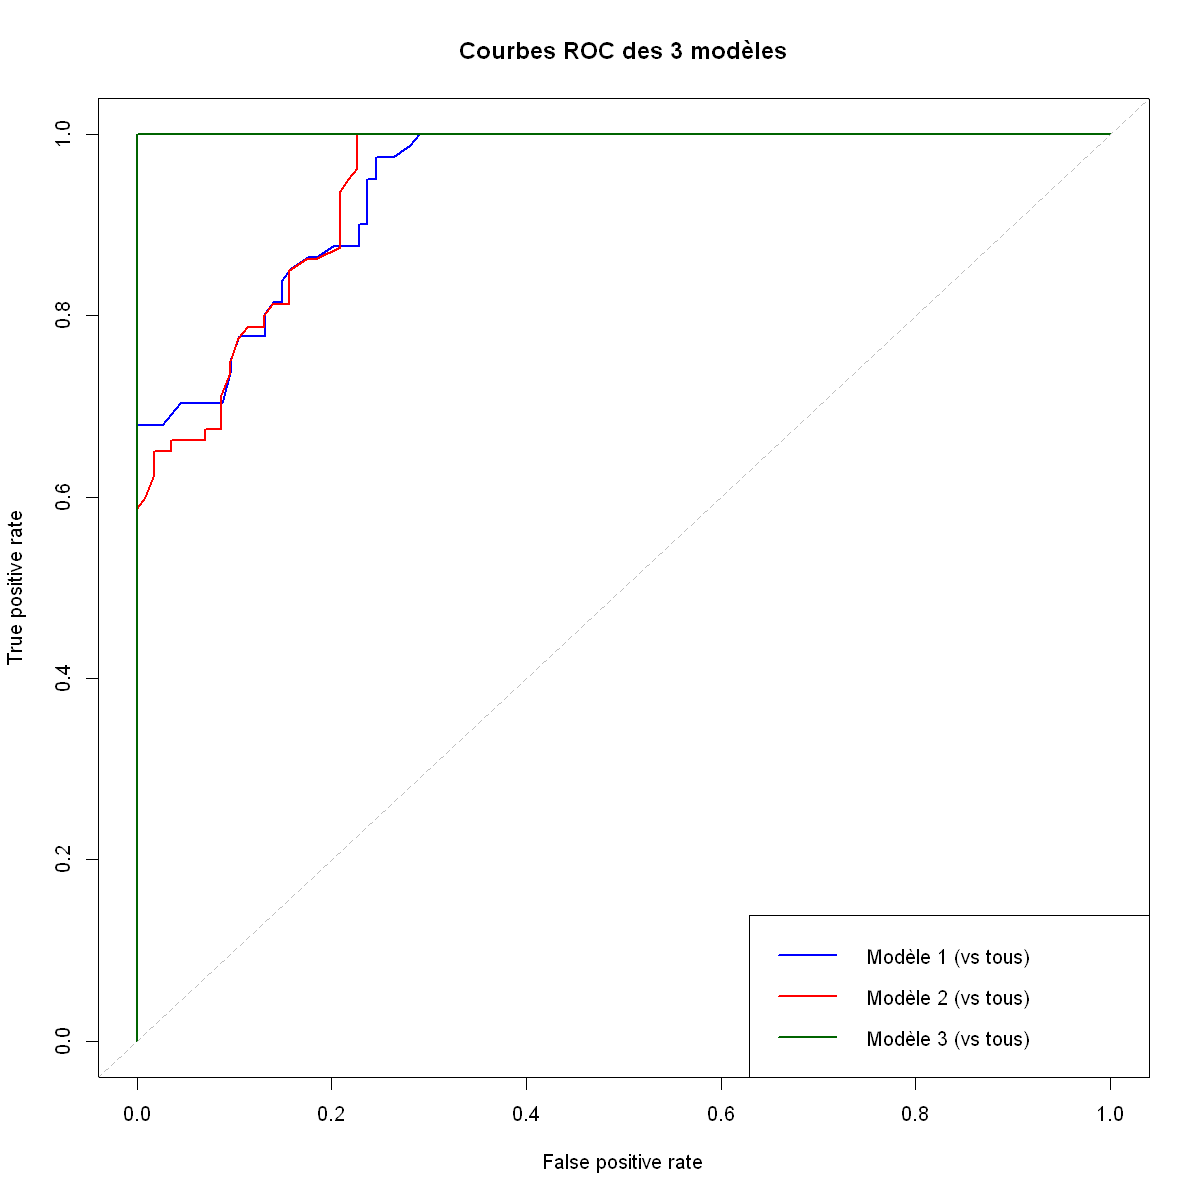

In [41]:
library(ROCR)

# Prédictions formatées
pred1 <- prediction(pred1_inter, datestq1$Y_bin)
perf1 <- performance(pred1, "tpr", "fpr")

pred2 <- prediction(pred2_inter, datestq2$Y_bin)
perf2 <- performance(pred2, "tpr", "fpr")

pred3 <- prediction(pred3_inter, datestq3$Y_bin)
perf3 <- performance(pred3, "tpr", "fpr")

# Affichage
plot(perf1, col = "blue", lwd = 2, main = "Courbes ROC des 3 modèles")
plot(perf2, col = "red", lwd = 2, add = TRUE)
plot(perf3, col = "darkgreen", lwd = 2, add = TRUE)
abline(0, 1, col = "grey", lty = 2)

legend("bottomright",
       legend = c("Modèle 1 (vs tous)", "Modèle 2 (vs tous)", "Modèle 3 (vs tous)"),
       col = c("blue", "red", "darkgreen"), lwd = 2)


In [42]:
performance(pred1, "auc")@y.values[[1]]
performance(pred2, "auc")@y.values[[1]]
performance(pred3, "auc")@y.values[[1]]

[1] 0.9468269

[1] 0.9466304

[1] 1

Parmis les trois modèles binaires, celui prédisant Experience_Level == 3 présente la meilleure performance. Cela suggère que les individus ayant le niveau d’expérience le plus élevé sont plus facilement distinguables par le modèle.

Ces résultats montrent que la régression logistique binaire est bien adaptée à la prédiction du niveau d’expérience.
Le niveau 3 est particulièrement facile à prédire, sans doute car les individus correspondant à ce profil présentent des caractéristiques plus marquées ou homogènes (nous observerons cela plus tard).
Les modèles pour les niveaux 1 et 2 restent également très satisfaisants, ce qui valide la pertinence de notre approche en trois sous-modèles.

In [43]:
summary(log.qm3.step)



Call:
glm(formula = Y_bin ~ Session_Duration..hours., family = binomial, 
    data = datappq3)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                -742.9    22970.3  -0.032    0.974
Session_Duration..hours.   1036.4    32076.3   0.032    0.974

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7.8249e+02  on 777  degrees of freedom
Residual deviance: 3.3922e-06  on 776  degrees of freedom
AIC: 4

Number of Fisher Scoring iterations: 25


### 3.2.2 Regression logitisque binaire avec LASSO

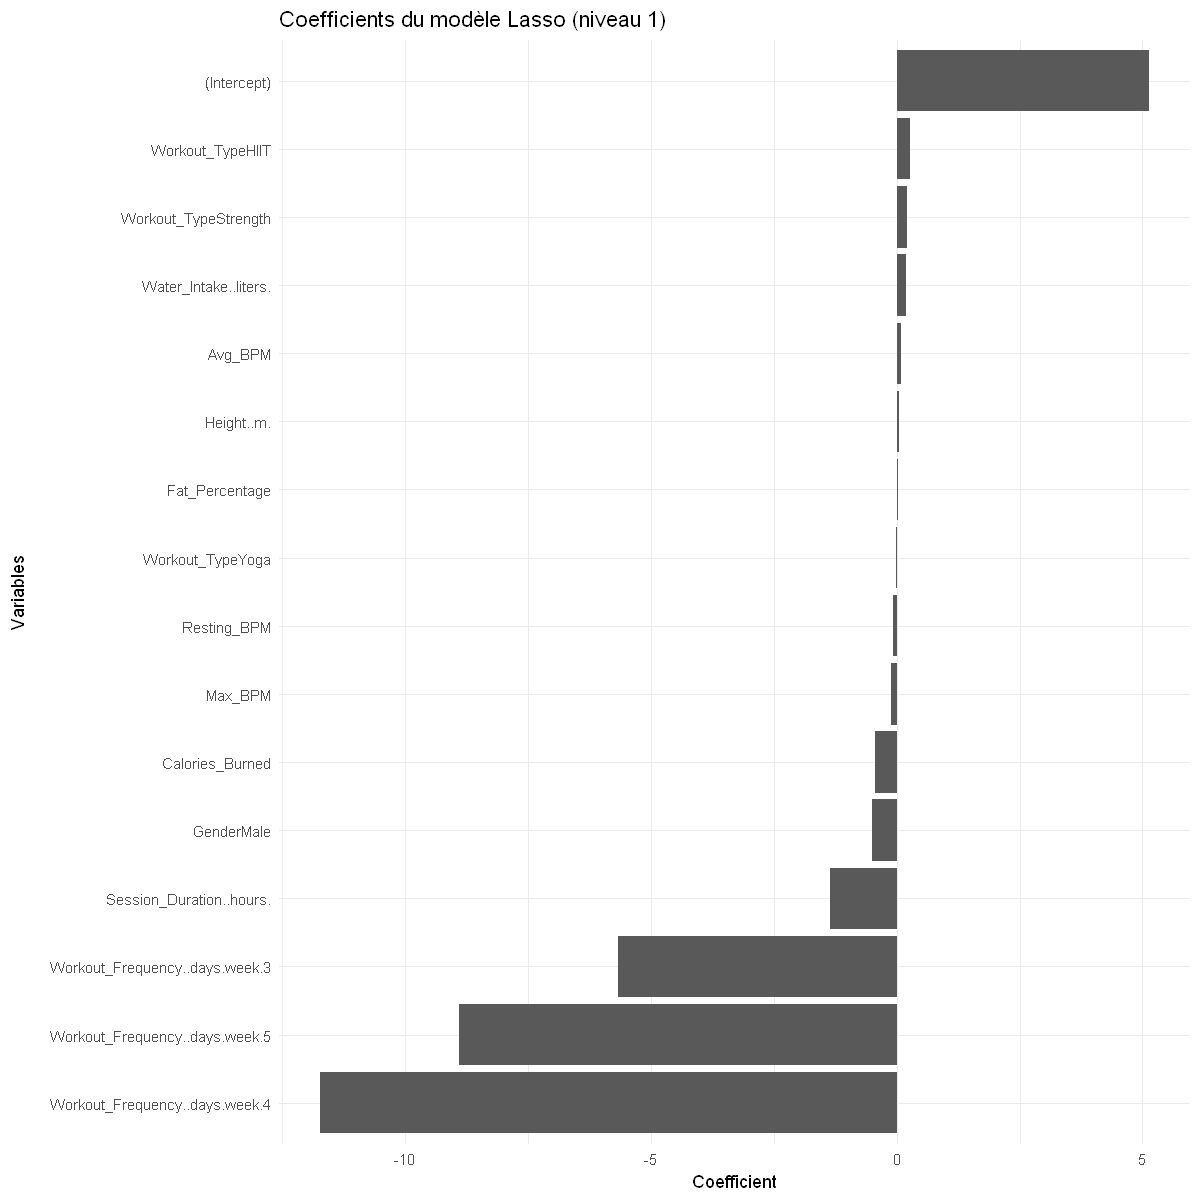

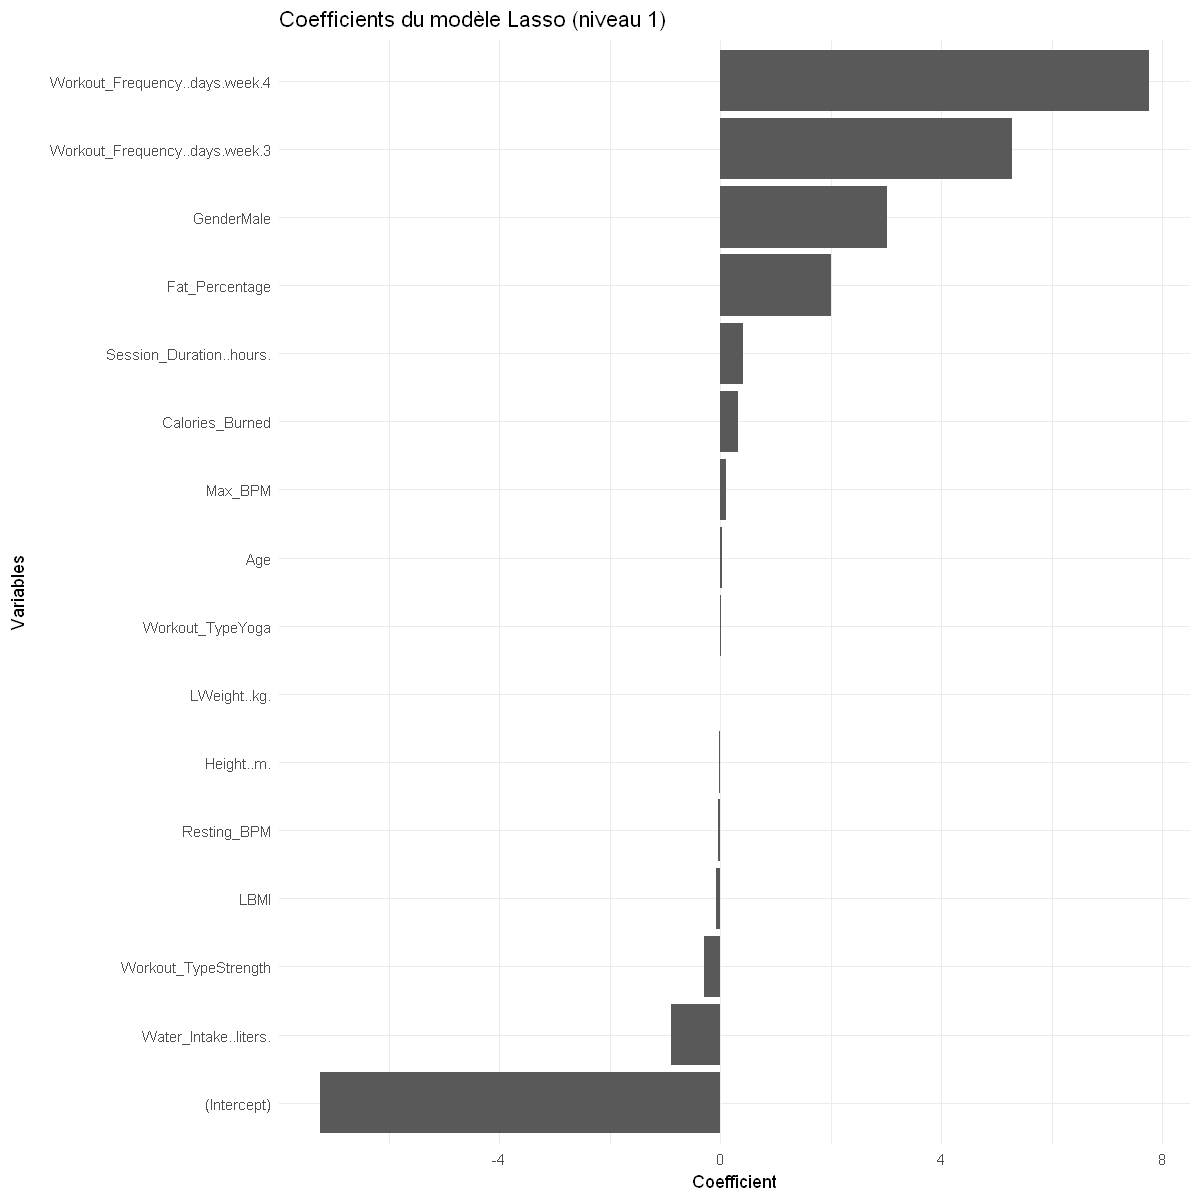

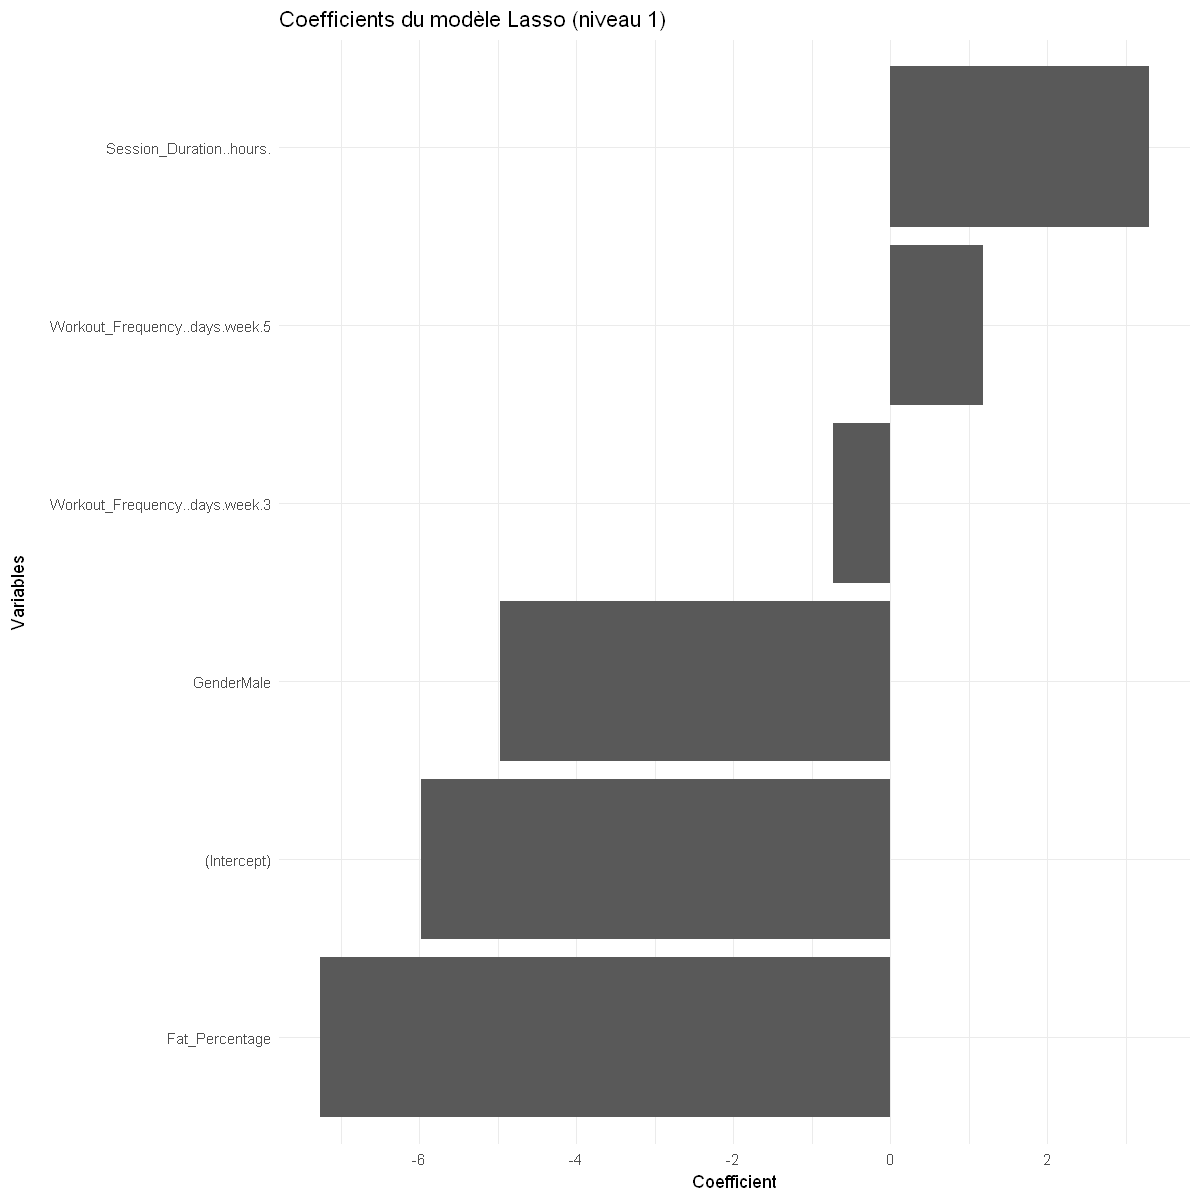

In [44]:
# Construction de la matrice de variables explicatives (sans l'intercept)
Xb1_train_mat <- model.matrix(Y_bin ~ . , data = datappq1)[, -1]

# Variable réponse
Y1_train_vec <- datappq1$Y_bin

# Régression Lasso avec validation croisée
library(glmnet)
cv_lasso <- cv.glmnet(Xb1_train_mat, Y1_train_vec, family = "binomial", alpha = 1)

# Récupération des coefficients pour la valeur de lambda optimale
coef_lasso <- coef(cv_lasso, s = "lambda.min")

# Conversion en data.frame
df_coef <- as.data.frame(as.matrix(coef_lasso))
df_coef$Variable <- rownames(df_coef)
colnames(df_coef)[1] <- "Coefficient"

# Filtrage des coefficients non nuls
df_coef <- subset(df_coef, Coefficient != 0)

# Affichage avec ggplot2
library(ggplot2)
ggplot(df_coef, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(
    title = "Coefficients du modèle Lasso (niveau 1)",
    x = "Variables",
    y = "Coefficient"
  ) +
  theme_minimal()



#Modèle 2

# Construction de la matrice de variables explicatives (sans l'intercept)
Xb1_train_mat <- model.matrix(Y_bin ~ . , data = datappq2)[, -1]

# Variable réponse
Y1_train_vec <- datappq2$Y_bin

# Régression Lasso avec validation croisée
library(glmnet)
cv_lasso <- cv.glmnet(Xb1_train_mat, Y1_train_vec, family = "binomial", alpha = 1)

# Récupération des coefficients pour la valeur de lambda optimale
coef_lasso <- coef(cv_lasso, s = "lambda.min")

# Conversion en data.frame
df_coef <- as.data.frame(as.matrix(coef_lasso))
df_coef$Variable <- rownames(df_coef)
colnames(df_coef)[1] <- "Coefficient"

# Filtrage des coefficients non nuls
df_coef <- subset(df_coef, Coefficient != 0)

# Affichage avec ggplot2
library(ggplot2)
ggplot(df_coef, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(
    title = "Coefficients du modèle Lasso (niveau 1)",
    x = "Variables",
    y = "Coefficient"
  ) +
  theme_minimal()



#Modèle 3


# Construction de la matrice de variables explicatives (sans l'intercept)
Xb1_train_mat <- model.matrix(Y_bin ~ . , data = datappq3)[, -1]

# Variable réponse
Y1_train_vec <- datappq3$Y_bin

# Régression Lasso avec validation croisée
library(glmnet)
cv_lasso <- cv.glmnet(Xb1_train_mat, Y1_train_vec, family = "binomial", alpha = 1)

# Récupération des coefficients pour la valeur de lambda optimale
coef_lasso <- coef(cv_lasso, s = "lambda.min")

# Conversion en data.frame
df_coef <- as.data.frame(as.matrix(coef_lasso))
df_coef$Variable <- rownames(df_coef)
colnames(df_coef)[1] <- "Coefficient"

# Filtrage des coefficients non nuls
df_coef <- subset(df_coef, Coefficient != 0)

# Affichage avec ggplot2
library(ggplot2)
ggplot(df_coef, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(
    title = "Coefficients du modèle Lasso (niveau 1)",
    x = "Variables",
    y = "Coefficient"
  ) +
  theme_minimal()


Ce code Lasso sert à identifier quelles variables explicatives ont le plus d’influence pour prédire si un individu appartient (ou non) au niveau d’expérience 1, 2 ou 3 (pour le modèle 1, 2 ou 3). En effet, le Lasso réalise une sélection automatique des variables importantes en mettant certains coefficients à zéro. Il retire donc les variables non pertinentes, et conserve seulement celles qui ont un impact fort sur la prédiction.

Pour le modèle 1, les coefficients associés aux modalités Workout_Frequency 3, 4 et 5 sont fortement négatifs. Cela signifie que les individus qui s'entraînent régulièrement (3 fois ou plus par semaine) ont une probabilité très faible d'appartenir au niveau 1.
Autrement dit, ce sont des indicateurs puissants d'exclusion du niveau 1, ce qui améliore la précision du modèle en écartant rapidement les faux positifs.

Pour le modèle 2, les coefficients de Workout_Frequency 3 et 4 sont fortement positifs, ce qui indique qu’un entraînement modéré à fréquent est caractéristique du niveau 2.
De plus, les variables Fat_Percentage (positif) et GenderMale (positif) montrent que les hommes avec un pourcentage de masse grasse moyennement plus élevé ont une probabilité accrue d’appartenir à ce niveau.
Cela suggère que le niveau 2 correspond à un profil "intermédiaire", ce qui peut expliquer des performances de classification un peu moins tranchées que pour le niveau 3.

Le modèle 3 révèle un coefficient positif plutôt élevé pour Session_Duration_Hours, ce qui indique que des séances longues sont typiques du niveau 3.
À l'inverse, Fat_Percentage et GenderMale ont des coefficients négatifs marqués, ce qui signifie que les personnes plus maigres et souvent de genre féminin sont davantage représentées dans ce groupe.
Cela montre que le modèle dispose de variables très distinctives pour reconnaître ce niveau, ce qui explique les excellentes performances prédictives observées.

Ainsi, le niveau 3 est facilement identifiable car il est associé à des comportements très distincts (ex. : longues séances d’entraînement, faible masse grasse). Le niveau 1 bénéficie aussi de bons marqueurs d'exclusion (entraînement rare).
Le niveau 2, situé entre les deux extrêmes, est plus hétérogène, ce qui rend sa prédiction un peu moins précise.

In [45]:
conf1 <- table(pred1_inter > 0.5, datestq1$Y_bin)

TP1 <- conf1["TRUE", "1"]
TN1 <- conf1["FALSE", "0"]
FP1 <- conf1["TRUE", "0"]
FN1 <- conf1["FALSE", "1"]

accuracy1 <- (TP1 + TN1) / sum(conf1)
error1 <- 1 - accuracy1
recall1 <- TP1 / (TP1 + FN1)
specificity1 <- TN1 / (TN1 + FP1)

conf2 <- table(pred2_inter > 0.5, datestq2$Y_bin)

TP2 <- conf2["TRUE", "1"]
TN2 <- conf2["FALSE", "0"]
FP2 <- conf2["TRUE", "0"]
FN2 <- conf2["FALSE", "1"]

accuracy2 <- (TP2 + TN2) / sum(conf2)
error2 <- 1 - accuracy2
recall2 <- TP2 / (TP2 + FN2)
specificity2 <- TN2 / (TN2 + FP2)

conf3 <- table(pred3_inter > 0.5, datestq3$Y_bin)

TP3 <- conf3["TRUE", "1"]
TN3 <- conf3["FALSE", "0"]
FP3 <- conf3["TRUE", "0"]
FN3 <- conf3["FALSE", "1"]

accuracy3 <- (TP3 + TN3) / sum(conf3)
error3 <- 1 - accuracy3
recall3 <- TP3 / (TP3 + FN3)
specificity3 <- TN3 / (TN3 + FP3)


cat("Precision modèle 1 : " , accuracy1*100, "%", "\n")
cat("Precision modèle 2 : " , accuracy2*100,"%", "\n")
cat("Precision modèle 3 : " , accuracy3*100,"%", "\n")

erreur_precision_lasso=1-(length(datestq3)*accuracy3+length(datestq2)*accuracy2+length(datestq1)*accuracy1)/3

Precision modèle 1 :  84.10256 % 
Precision modèle 2 :  84.10256 % 
Precision modèle 3 :  100 % 


## 3.3 SVM

Pour cette seconde partie, on va chercher à classifier en appliquant la méthode Support Vector Machine (SVM).
L’objectif des SVM est de construire un hyperplan optimal qui sépare les classes de la variable à prédire de manière à maximiser la marge entre les observations des différentes classes. 

Ici, on utilise SVM pour prédire la variable Experience_Level, qui contient trois niveaux d’expérience (1, 2 et 3).
Le SVM est initalement conçu pour la classification binaire. Pour adapter cette méthode à des problèmes à plusieurs classes, comme ici, on utilise une extension multiclasse automatique.
Dans notre cas, nous utilisons la fonction svm(), qui va entraîner plusieurs classifieurs binaires entre chaque paire de classes, et combiner ensuite les prédictions via un système de vote majoritaire. En sortie, nous obtenons à la fois les classes prédites et les probabilités associées à chaque niveau de Experience_Level, ce qui nous permet de tracer des courbes ROC pour évaluer la qualité du modèle pour chaque classe.

Pour cette méthode, 2 paramètres sont cruciaux dans la qualité du modèle, les paramètres cost et gamma.

A nouveau, nous avons choisi ces paramètres optimaux via la fonction tune().

Best parameters : cost = 3 , gamma = 0.03 



Call:
svm(formula = Experience_Level ~ ., data = datappq0, cost = best_cost, 
    gamma = best_gamma, kernel = "radial", probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  3 

Number of Support Vectors:  367

 ( 25 187 155 )


Number of Classes:  3 

Levels: 
 1 2 3




          Réalité
Prediction  1  2  3
         1 53  3  0
         2 28 77  0
         3  0  0 34


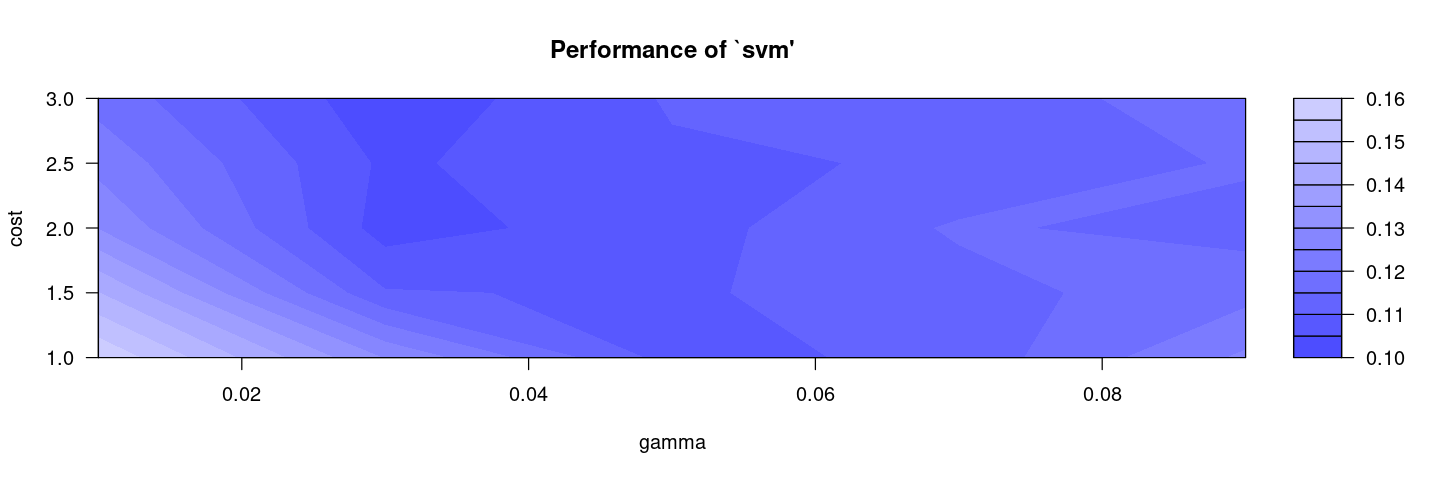

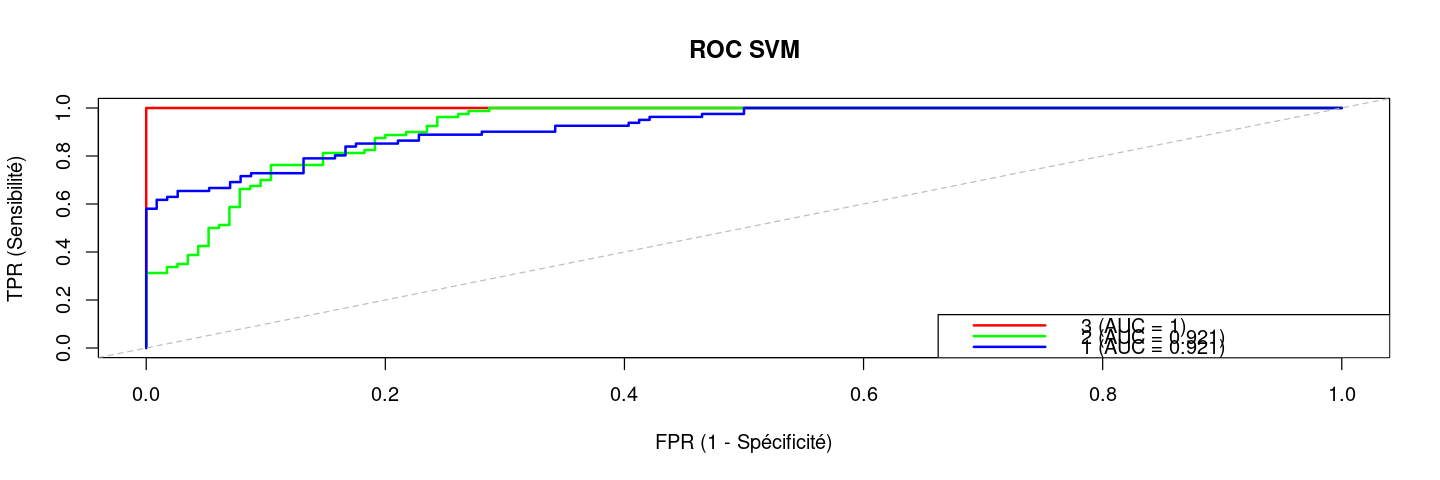

In [190]:
library(e1071)
library(ROCR)
library(ggplot2)

# 1. Tuning des hyperparamètres SVM sur l'échantillon d'entraînement
set.seed(2027)
svm.tune <- tune.svm(
  Experience_Level ~ .,
  data = datappq0,
  cost = seq(1, 3, by = 0.5),
  gamma = seq(0.01, 0.1, by = 0.02),
  kernel = "radial"
)
plot(svm.tune)
best_cost <- svm.tune$best.parameters$cost
best_gamma <- svm.tune$best.parameters$gamma
cat("Best parameters : cost =", best_cost, ", gamma =", best_gamma, "\n")

# 2. Entraînement du modèle SVM avec meilleurs paramètres
svm.model <- svm(
  Experience_Level ~ .,
  data = datappq0,
  cost = best_cost,
  gamma = best_gamma,
  kernel = "radial",
  probability = TRUE
)
summary(svm.model)

# 3. Prédiction sur l'échantillon test (classes + probabilités)
svm.pred.class <- predict(svm.model, newdata = datestq0)
svm.pred.prob <- predict(svm.model, newdata = datestq0, probability = TRUE)
svm.probs <- attr(svm.pred.prob, "probabilities")

# 4. Matrice de confusion
conf.mat <- table(Prediction = svm.pred.class, Réalité = datestq0$Experience_Level)
print(conf.mat)

# 5. Calcul et tracé de la courbe ROC pour chaque classe (multiclass)
# Créons une courbe ROC pour chaque niveau de Experience_Level en mode one-vs-all

# Classes présentes
classes <- levels(datestq0$Experience_Level)
plot_multiclass_roc(datestq0$Experience_Level, svm.probs, "ROC SVM" )


Avec le graphe de performance, on confirme comme paramètre optimal gamma=0.03 et cost=3
Il y a 3 courbes ROC chacune associée a un niveau d'Experience_Level.

In [214]:
conf.mat <- table(Prediction = svm.pred.class, Réalité = datestq0$Experience_Level)

precision(conf.mat)
# Taux de précision
accuracy <- sum(diag(conf.mat)) / sum(conf.mat)
erreur_precision_svm=1-accuracy

  Experience_Level Precision
1                1  0.654321
2                2  0.962500
3                3  1.000000


On a toujours une aussi bonne prédiction pour le niveau 3. Le niveau 2 reste très satisfaisant. Cependant, on a plus de mal à classer le niveau 1.

## 3.4 Arbre optimal (CART)

A nouveau, nous allons apppliquer la méthode de CART. La méthode reste la même, le seul changement pour la classification a lieu au moment de l'assignation pour chaque feuille, il se fait par vote majoritaire.

Faisons maintenant un arbre de CART :

In [191]:
library(rpart)
library(rpart.plot)


In [200]:
set.seed(3)
# Arbre de classification pour prédire Experience_Level
cart.full <- rpart(Experience_Level ~ ., data = datappq0, method = "class", cp = 0.001)

A nouveau, nous allons chercher le meilleur cp à choisir en tracant l'erreur de validation croisée selon ce dernier. 


Classification tree:
rpart(formula = Experience_Level ~ ., data = datappq0, method = "class", 
    cp = 0.001)

Variables actually used in tree construction:
[1] Calories_Burned               Fat_Percentage               
[3] LBMI                          LWeight..kg.                 
[5] Max_BPM                       Session_Duration..hours.     
[7] Workout_Frequency..days.week.

Root node error: 452/778 = 0.58098

n= 778 

         CP nsplit rel error  xerror     xstd
1 0.3484513      0  1.000000 1.00000 0.030447
2 0.1526549      2  0.303097 0.31637 0.023902
3 0.0026549      3  0.150442 0.15265 0.017544
4 0.0022124     14  0.095133 0.21018 0.020204
5 0.0010000     15  0.092920 0.22345 0.020741


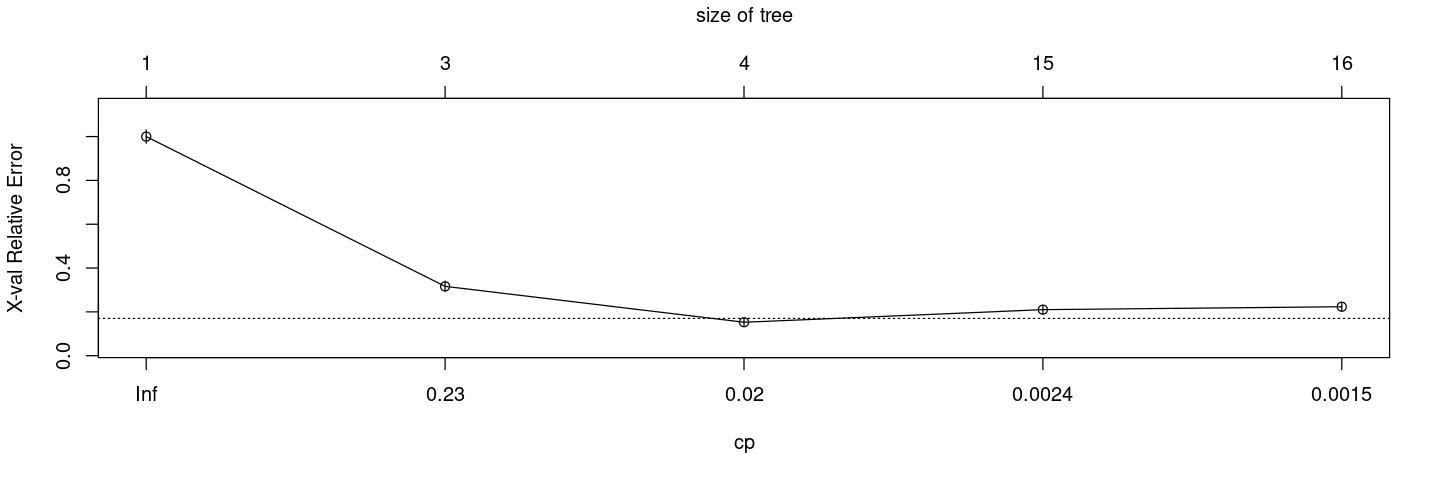

In [201]:
set.seed(4)
printcp(cart.full)  # Affiche la cross-validation error selon cp
plotcp(cart.full)   # Trace la courbe de complexité

On choisit donc cp=0.02 pour minimiser l'erreur.

In [203]:
set.seed(5)
# cp optimal : celui avec la plus petite erreur xerror
best_cp <- cart.full$cptable[which.min(cart.full$cptable[, "xerror"]), "CP"]

# Arbre élagué (pruned)
cart.pruned <- prune(cart.full, cp = 0.02)



L'arbre choisit s'affiche ci dessous :

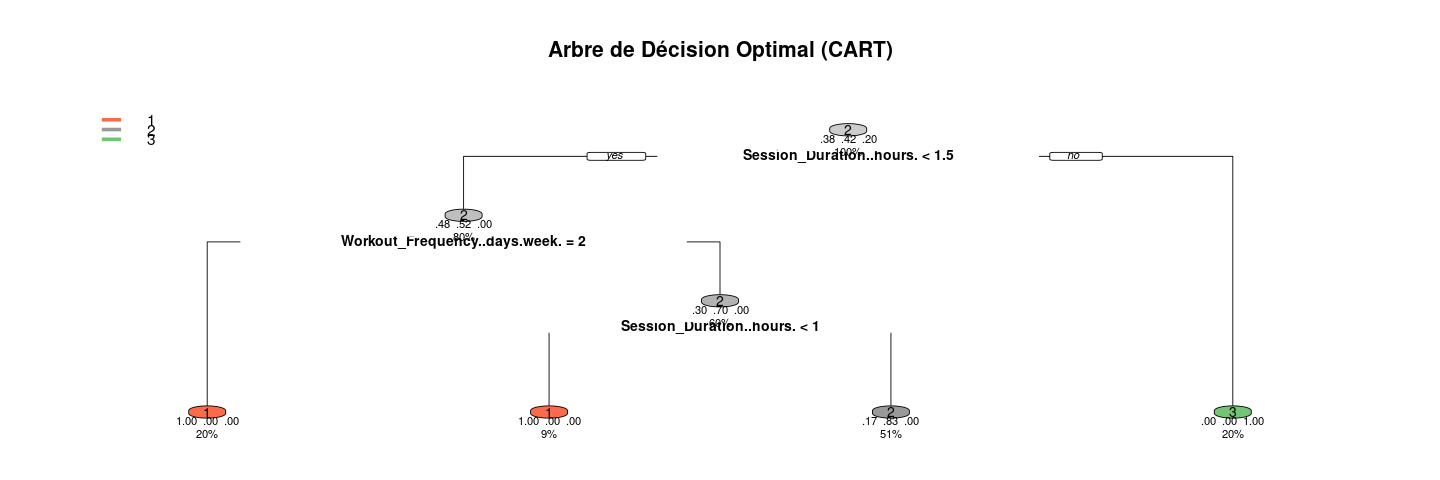

In [204]:
set.seed(6)
rpart.plot(cart.pruned, type = 2, extra = 104, under = TRUE, cex = 0.7, main = "Arbre de Décision Optimal (CART)")

On confirme ici l'importance de la variable Session_Duration car c'est celle qui permet le mieux de séparer notre jeu de données.

On stocke ses prédictions pour pouvoir ensuite analyser la performance du modèle.

In [205]:
pred.cart <- predict(cart.pruned, newdata = datestq0, type = "class")
cart.probs <- predict(cart.pruned, newdata = datestq0, type = "prob")

Voici sa matrice de confusion :

In [206]:
conf.mat.cart <-table(Prediction = pred.cart, Réalité = datestq0$Experience_Level)
print(conf.mat.cart)

          Réalité
Prediction  1  2  3
         1 55  0  0
         2 26 80  0
         3  0  0 34


In [215]:
precision(conf.mat.cart)
accuracy.CART <- sum(diag(conf.mat.cart)) / sum(conf.mat.cart)
erreur_precision_CART=1-accuracy.CART

  Experience_Level Precision
1                1 0.6790123
2                2 1.0000000
3                3 1.0000000


Avec cette méthode, on arrive parfaitement à classer les niveaux 2 et 3.

Et sa ROC curve :

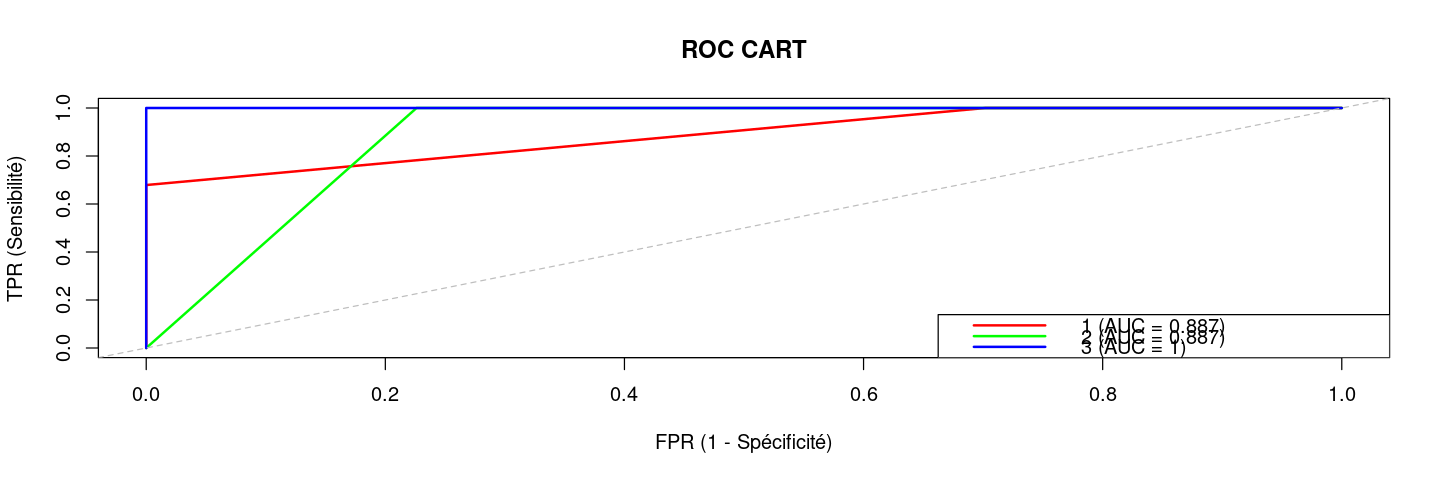

In [208]:
plot_multiclass_roc(datestq0$Experience_Level, cart.probs, title = "ROC CART")

On va essayer d'ameliorer la méthode de l'arbre avec un random forest.

## 3.5 Random Forest

Même principe pour Random Forest avec commme seul changement, la prédiction finale correspond à la classe majoritaire des prédictions de chaque arbre.

In [209]:
library(randomForest)

On teste pour une foret de 500 arbres.

In [210]:
set.seed(7)
rf.model <- randomForest(Experience_Level ~ ., data = datappr, ntree = 500, importance = TRUE, probability = TRUE)

On va chercher à trouver la foret qui performe le plus en fonction du nombre de variable que l'on donne à chaque arbre pour s'entrainer.

✅ Meilleur mtry (plus faible taux d'erreur): 3 


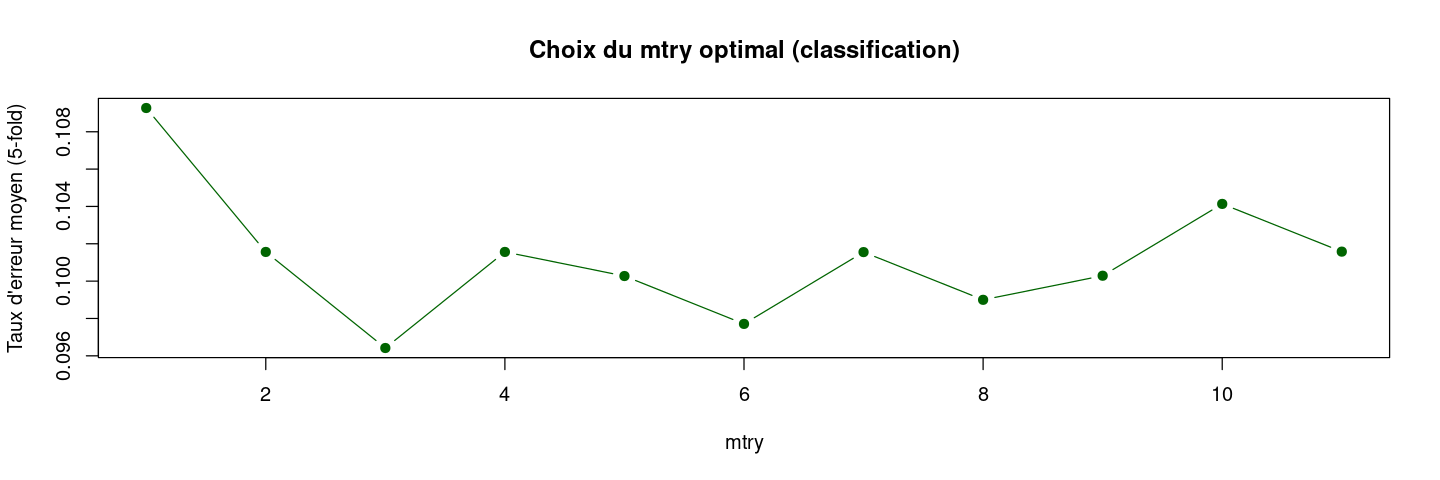

In [211]:
set.seed(8)
# Choix des valeurs à tester
mtry_vals <- 1:(11)  # -1 car on exclut Experience_Level
k <- 5  # nombre de folds
folds <- sample(rep(1:k, length.out = nrow(datappq0)))

# Vecteur pour stocker l'erreur de classification moyenne
cv_err <- numeric(length(mtry_vals))

# Boucle sur les valeurs de mtry
for (j in seq_along(mtry_vals)) {
  err_folds <- numeric(k)
  
  for (i in 1:k) {
    test_idx <- which(folds == i)
    train_data <- datappq0[-test_idx, ]
    test_data <- datappq0[test_idx, ]
    
    rf <- randomForest(Experience_Level ~ ., data = train_data,
                       mtry = mtry_vals[j], ntree = 500)
    
    preds <- predict(rf, newdata = test_data)
    err_folds[i] <- mean(preds != test_data$Experience_Level)  # taux d'erreur
  }
  
  cv_err[j] <- mean(err_folds)
}

# Afficher les résultats
plot(mtry_vals, cv_err, type = "b", pch = 19, col = "darkgreen",
     xlab = "mtry", ylab = "Taux d'erreur moyen (5-fold)",
     main = "Choix du mtry optimal (classification)")

# Affichage du meilleur mtry
best_mtry <- mtry_vals[which.min(cv_err)]
cat("✅ Meilleur mtry (plus faible taux d'erreur):", best_mtry, "\n")

On prend le nombre de variable qui minimise notre taux d'erreur, soit 3. On va maintenant chercher à savoir combien d'arbres il faut avoir dans notre foret :

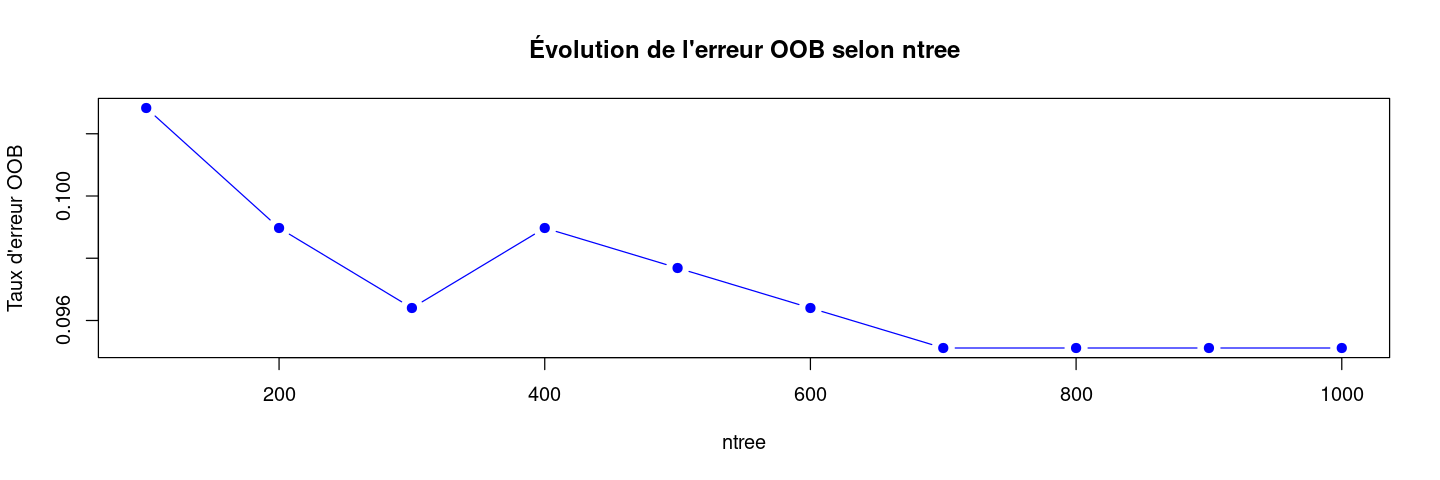

In [212]:
set.seed(9)
tree_vals <- seq(100, 1000, by = 100)
err_vals <- numeric(length(tree_vals))

for (i in seq_along(tree_vals)) {
  set.seed(123)
  rf <- randomForest(Experience_Level ~ ., data = datappq0,
                     mtry = 3, ntree = tree_vals[i])
  err_vals[i] <- mean(rf$err.rate[tree_vals[i], "OOB"])
}

# Visualisation
plot(tree_vals, err_vals, type = "b", pch = 19, col = "blue",
     xlab = "ntree", ylab = "Taux d'erreur OOB",
     main = "Évolution de l'erreur OOB selon ntree")

On va donc prendre 800 arbres pour notre foret.

In [216]:
set.seed(10)
rf.final <- randomForest(Experience_Level ~ ., data = datappq0,
                         mtry = 3, ntree = 800, importance = TRUE)

print(rf.final)


Call:
 randomForest(formula = Experience_Level ~ ., data = datappq0,      mtry = 3, ntree = 800, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 800
No. of variables tried at each split: 3

        OOB estimate of  error rate: 9.64%
Confusion matrix:
    1   2   3 class.error
1 228  67   0  0.22711864
2   8 318   0  0.02453988
3   0   0 157  0.00000000


On peux observer la matrice de confusion de notre foret finale. Regardonc maintenant l'importance des variables dans sa construction :

1             2             3            
Age                           -0.0017305340  0.0015242910 -5.554601e-05
Gender                         0.0005871822  0.0033192943  6.820011e-03
Height..m.                     0.0004400042 -0.0002578471  6.287930e-04
Max_BPM                       -0.0002250342  0.0018910545  3.851560e-05
Avg_BPM                       -0.0006364333  0.0034264121  1.694576e-03
Resting_BPM                   -0.0028373465 -0.0014857517 -4.892850e-05
Session_Duration..hours.       0.1202424399  0.1464911610  3.843717e-01
Calories_Burned                0.0333736229  0.0373957159  4.264687e-02
Workout_Type                  -0.0012663987 -0.0006595817 -1.200549e-04
Fat_Percentage                 0.0463031478  0.0579298201  3.311810e-01
Water_Intake..liters.         -0.0002454543  0.0087198070  9.136497e-02
Workout_Frequency..days.week.  0.2101248917  0.1356224099  1.346198e-01
LBMI                          -0.0018571048  0.0038941715  1.013027e-02
LWeight..kg.                  -0.0017678258  0.0007991561  2.952674e-02
                              MeanDecreaseAccuracy MeanDecreaseGini
Age                            1.302207e-05         11.058993      
Gender                         2.977251e-03          1.580046      
Height..m.                     1.844861e-04         11.077227      
Max_BPM                        6.747383e-04         11.029225      
Avg_BPM                        1.573678e-03         13.024877      
Resting_BPM                   -1.685444e-03          9.287907      
Session_Duration..hours.       1.839450e-01        130.890618      
Calories_Burned                3.689600e-02         62.997946      
Workout_Type                  -7.725049e-04          5.839934      
Fat_Percentage                 1.086156e-01         77.453941      
Water_Intake..liters.          2.183698e-02         20.792805      
Workout_Frequency..days.week.  1.628808e-01        113.881566      
LBMI                           2.947941e-03         13.387021      
LWeight..kg.                   5.543210e-03         14.921166

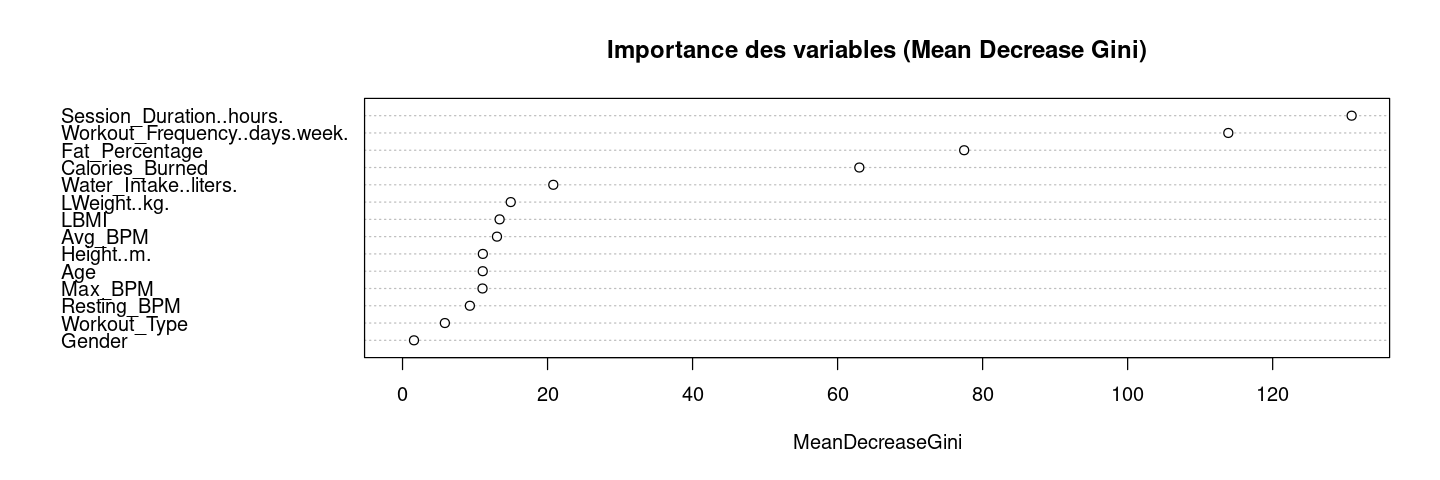

In [217]:
varImpPlot(rf.final, type = 2, main = "Importance des variables (Mean Decrease Gini)")
rf.final$importance

A nouveau on confirme que la durée de la session a une importance très forte sur la construction et donc sur notre prédiction finale. C'est cohérent avec les parties précédentes et on comprend bien pourquoi on arrive à prédire Level 3 de façon parfaite car la durée de la session a aussi un fort impact sur cette classe comme on l'avait vu dans la partie régression logistique.

In [219]:
rf.pred.prob <- predict(rf.final, newdata = datestq0, type = "prob")
rf.pred.class <- predict(rf.final, newdata = datestq0, type = "response")


On peut observer la matrice de confusion de notre foret sur l'echantillon de test ainsi que sa precision :

In [220]:
# Matrice de confusion
conf.mat.rf <- table(Prediction = rf.pred.class, Réalité = datestq0$Experience_Level)
print(conf.mat.rf)
precision(conf.mat.rf)
accuracy.rf <- sum(diag(conf.mat.rf)) / sum(conf.mat.rf)
erreur_precision_rf=1-accuracy.rf

          Réalité
Prediction  1  2  3
         1 56  3  0
         2 25 77  0
         3  0  0 34
  Experience_Level Precision
1                1  0.691358
2                2  0.962500
3                3  1.000000


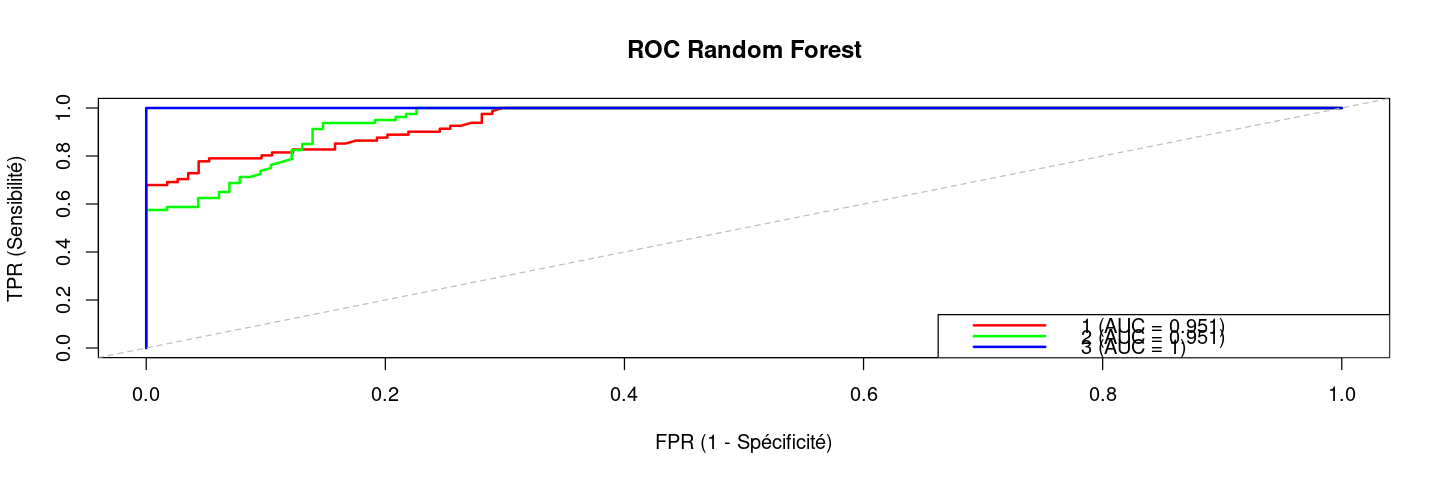

In [221]:
plot_multiclass_roc(datestq0$Experience_Level, rf.pred.prob, title = "ROC Random Forest")

On remarque que la foret a de meilleures performances que l'arbre CART seul. Regardons si on ne peut pas encore faire mieux avec le Boosting.

## 3.6 Boosting

On applique à nouveau une méthode de gradient boosting. Les paramètres à optimiser restent les mêmes, le processus d'ajustement des arbres est aussi identique.

Warning message:
“Setting `distribution = "multinomial"` is ill-advised as it is currently broken. It exists only for backwards compatibility. Use at your own risk.”


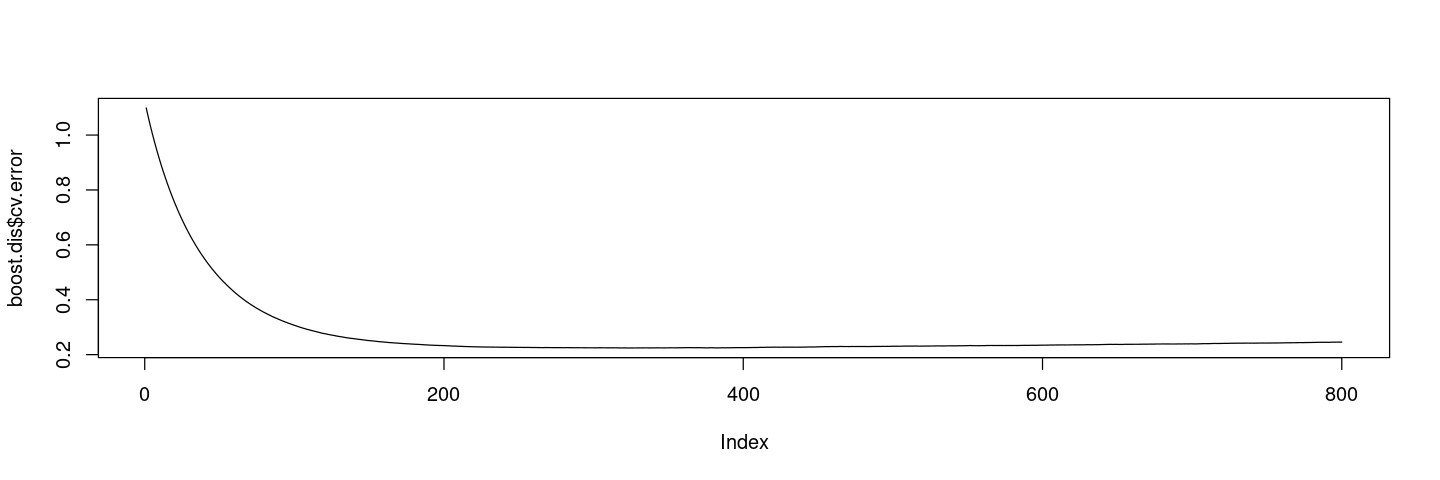

In [222]:
set.seed(12)
library(gbm)
datappr2=datappr
datappr2[,"Experience_Level"]=as.numeric(datappr[,"Experience_Level"])-1
boost.dis=gbm(Experience_Level~.,data=datappr2,distribution="multinomial", n.trees = 800, cv.folds=10,
  interaction.depth = 4,
  shrinkage = 0.01,
  n.minobsinnode = 10,
  verbose = FALSE)
plot(boost.dis$cv.error,type="l")

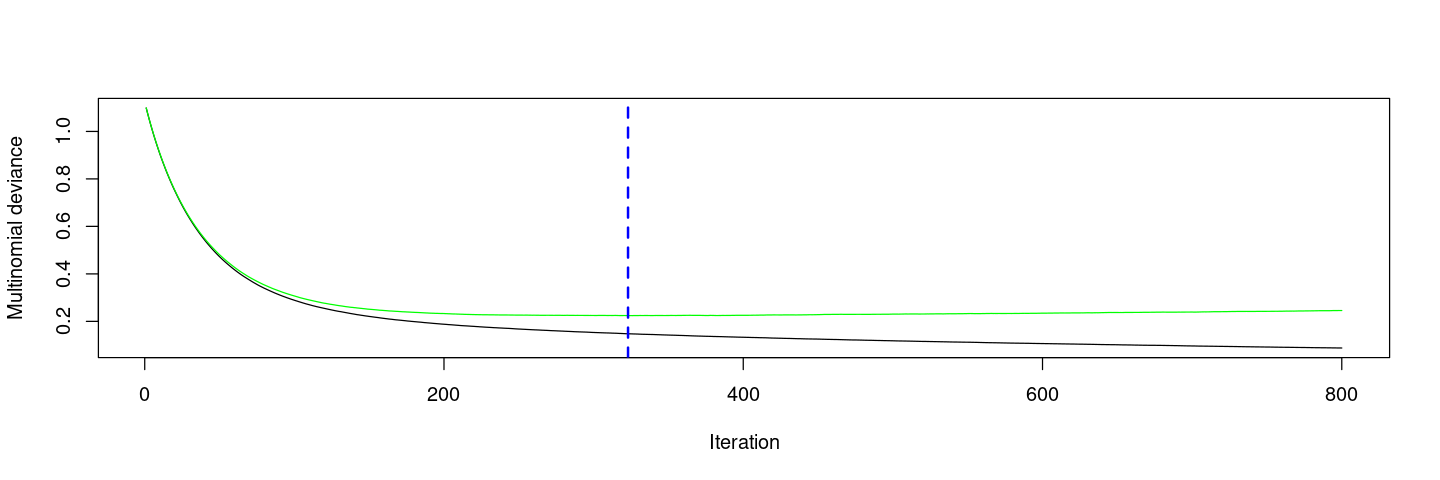

In [223]:
# nombre optimal d'itérations 
best.iter=gbm.perf(boost.dis,method="cv")

On choisit 323 arbres.

In [224]:
datestq2 <- datestq
datestq2$Experience_Level <- as.numeric(datestq$Experience_Level) - 1  
# Prédictions de probabilités (multinomial renvoie une matrice)
pred_boostq_t <- predict(boost.dis, newdata = datestq2, n.trees = best.iter, type = "response")

# Prédiction des classes (classe avec la probabilité max)
pred.classes <- apply(pred_boostq_t, 1, which.max) - 1  

In [225]:
true.labels <- datestq2$Experience_Level
conf.mat.boost <- table(Prediction = pred.classes, Réalité = true.labels)
print(conf.mat.boost)

          Réalité
Prediction  0  1  2
         0 60  2  0
         1 21 78  0
         2  0  0 34


In [226]:
precision(conf.mat.boost)
accuracy.boost <- sum(diag(conf.mat.boost)) / sum(conf.mat.boost)
erreur_precision_boost=1-accuracy.boost

  Experience_Level Precision
1                0 0.7407407
2                1 0.9750000
3                2 1.0000000


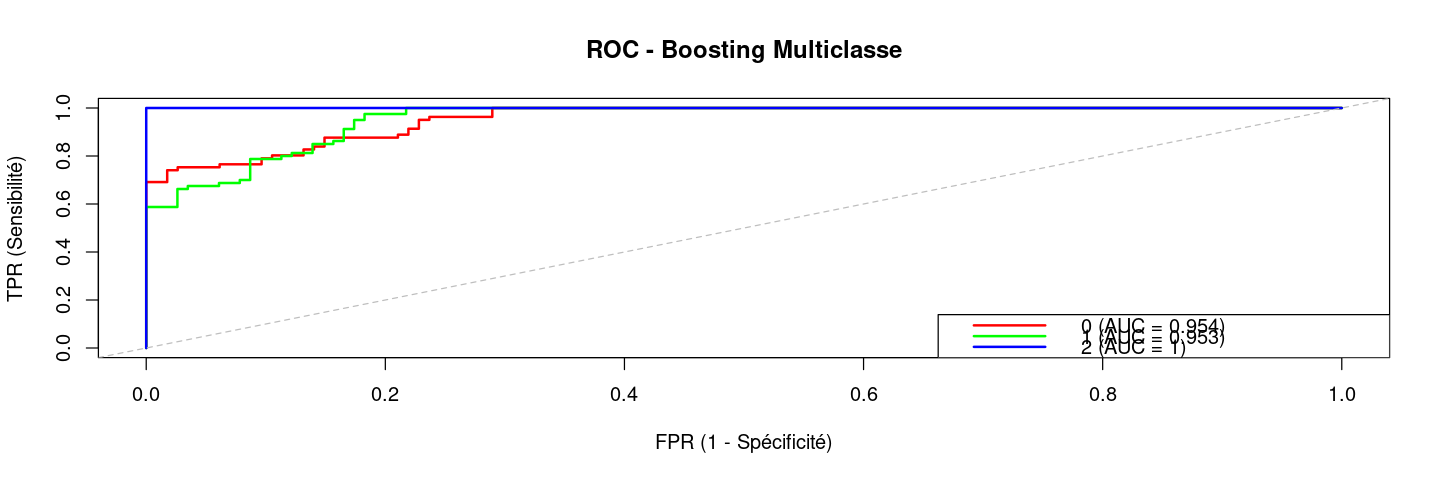

In [227]:
prob_matrix_boost <- as.data.frame(pred_boostq_t[, , 1])
colnames(prob_matrix_boost) <- as.character(0:(ncol(prob_matrix_boost)-1))

plot_multiclass_roc(datestq2$Experience_Level, prob_matrix_boost, title = "ROC - Boosting Multiclasse")

Ici la courbe bleu represente la classe 3, la verte la classe 2 et la rouge la classe 1.

On remarque que avec cette méthode, nous avons encore amélioré les performances de detection !

Passons maintenant à une toute autre méthode, les réseaux de neurones.

## 3.7 Réseaux de neurones

Enfin, pour le réseau de neurones, c'est le même principe que pour le réseaux de neurones pour une régression, seulement quelques détails changent pour la classification. La fonction perte et la fonction d'activation de la couche de sortie changent : on cherhe à estimer la probabilité d'appartenir au niveau 1, 2 ou 3 de Experience_Level.


In [51]:
datestq2 <- datestq
datestq2$Experience_Level <- as.numeric(datestq$Experience_Level) - 1  
datappr2=datappr
datappr2[,"Experience_Level"]=as.numeric(datappr[,"Experience_Level"])-1
datappr2$Experience_Level <- as.factor(datappr2$Experience_Level)
datestq2$Experience_Level <- as.factor(datestq2$Experience_Level)

Testons un réseau de neurones pour prédire la classe d'expérience level. Pour cela, on l'entraine sur notre échantillon d'entrainement et on attend qu'il converge.

Les paramètres à optimiser sont à nouveau decay et size.

Testons plusieurs paramètres pour essayer de minimiser l'erreur.

In [ ]:
set.seed(14)
tune.nnet.classif <- tune.nnet(
  Experience_Level ~ ., 
  data = datappr2,
  size = c( 5, 10, 15, 20),
  decay = c(1,2,3),
  maxit = 1000
)

plot(tune.nnet.classif)
summary(tune.nnet.classif)

On choisit les meilleurs paramètres soient size=20 et decay=3.

In [53]:
set.seed(15)
nnet.best <- nnet(Experience_Level ~ ., data = datappr2,
                  size = 20, decay = 3, maxit = 2000)


# weights:  443
initial  value 1785.799310 
iter  10 value 996.095144
iter  20 value 897.319164
iter  30 value 812.565491
iter  40 value 623.428077
iter  50 value 512.362224
iter  60 value 492.718954
iter  70 value 471.889058
iter  80 value 444.928831
iter  90 value 434.691420
iter 100 value 428.766002
iter 110 value 424.454708
iter 120 value 421.900621
iter 130 value 420.522507
iter 140 value 414.395334
iter 150 value 407.438383
iter 160 value 395.533183
iter 170 value 387.743574
iter 180 value 382.705181
iter 190 value 380.067136
iter 200 value 378.796810
iter 210 value 377.766326
iter 220 value 376.767598
iter 230 value 376.220729
iter 240 value 375.478557
iter 250 value 374.843514
iter 260 value 374.384069
iter 270 value 373.759813
iter 280 value 373.101059
iter 290 value 372.664587
iter 300 value 372.197091
iter 310 value 372.102987
iter 320 value 372.045311
iter 330 value 371.993821
iter 340 value 371.969795
iter 350 value 371.954130
iter 360 value 371.944009
iter 370 value 371.9

In [55]:
pred_probs.nn <- predict(nnet.best, newdata = datestq2, type = "raw")

# Prédire la classe (celle avec la probabilité max)
pred_classes.nn <- apply(pred_probs.nn, 1, which.max)
pred_classes.nn <- pred_classes.nn - 1

On fait la matrice de confusion, on regarde sa precison de prédiction et la ROC curve.

In [56]:
conf.mat.nn <- table(Prediction = pred_classes.nn, Reality = as.numeric(as.character(datestq2$Experience_Level)))
print(conf.mat.nn)

          Reality
Prediction  0  1  2
         0 68 17  0
         1 13 63  0
         2  0  0 34


In [57]:
precision(conf.mat.nn)
accuracy.nn <- sum(diag(conf.mat.nn)) / sum(conf.mat.nn)
erreur_precision_nn=1-accuracy.nn

  Experience_Level Precision
1                0 0.8395062
2                1 0.7875000
3                2 1.0000000


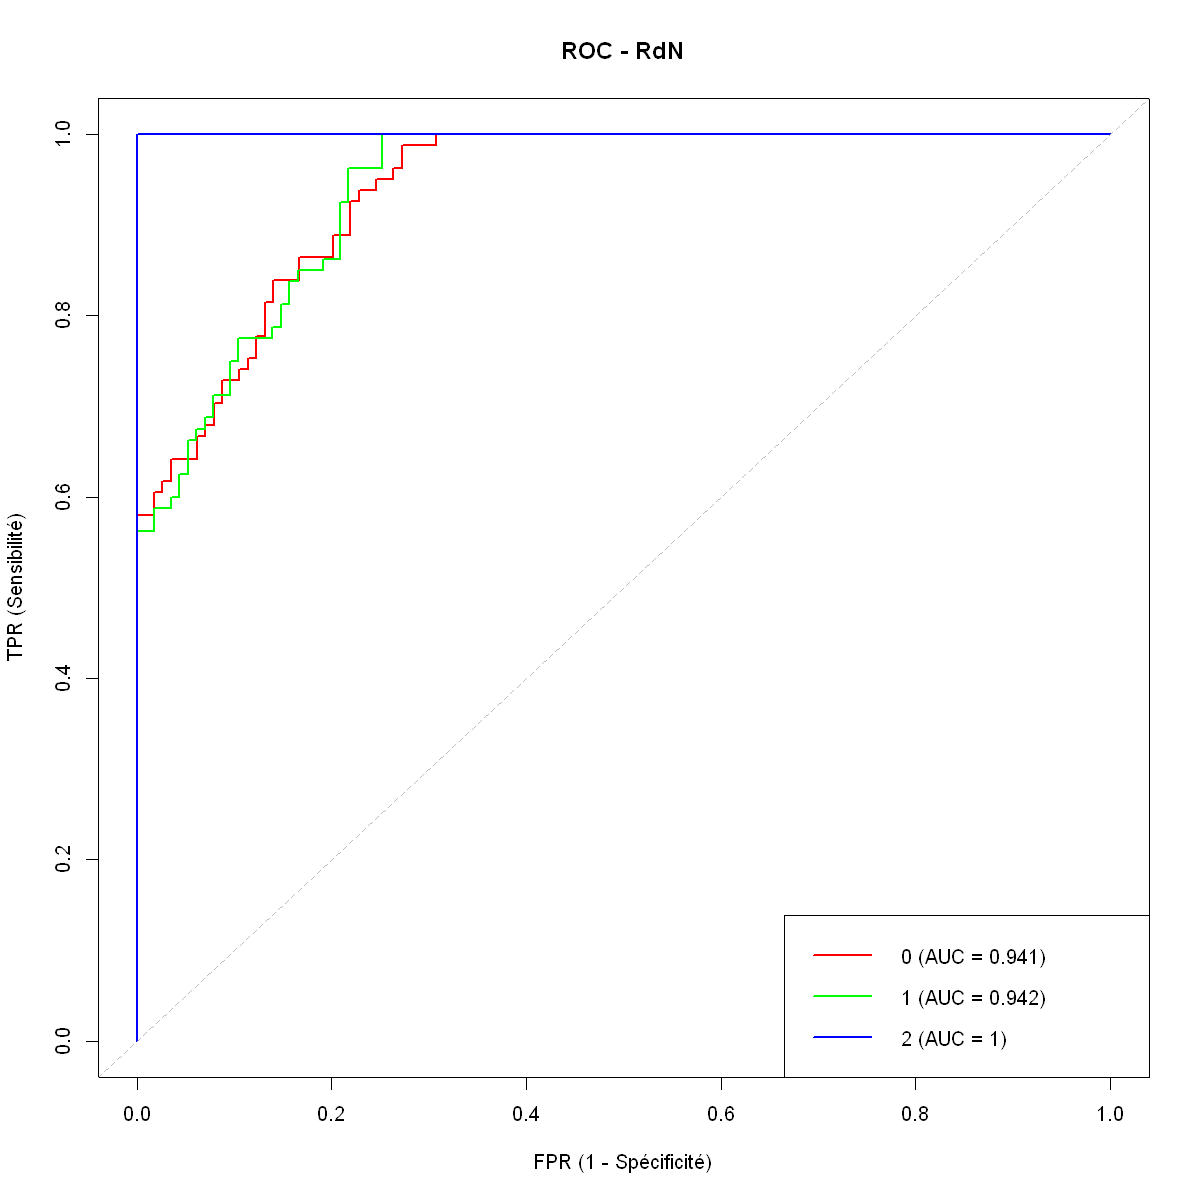

In [58]:
plot_multiclass_roc(datestq2$Experience_Level, pred_probs.nn, title = "ROC - RdN")

Le réseau de neurones a de très bon résultats similaires à ceux de la régression linéaire sans avoir à créer 3 modèles différents. Cependant, même remarque que pour la regression linéaire, cela prend beacoup de temps de trouver les bons paramètres optimaux.

## 3.8 Comparaison des modèles pour prédire le niveau d'expérience 

In [59]:
cat("Erreur de précision Réseau de Neurones :", erreur_precision_nn, "\n")
cat("Erreur de précision Boosting :", erreur_precision_boost, "\n")
cat("Erreur de précision Forêt Aléatoire :", erreur_precision_rf, "\n")
cat("Erreur de précision Arbre Optimal (CART) :", erreur_precision_CART, "\n")
cat("Erreur de précision SVM :", erreur_precision_svm, "\n")
cat("Erreur de précision Modèle Linéaire (Lasso) :", erreur_precision_lasso, "\n")

Erreur de précision Réseau de Neurones : 0.1538462 


On remarque que le modèle Boosting à la plus petite erreur de precision ainsi est le plus performant. Il est suivi par CART et par le modèle par Foret Aléatoire. Parmis ces modèles, si notre critère est l'interprétabilité du modèle, nous garderons le modèle CART qui est le plus interprétable. Cependant, il faut rappeler que ce modèle est instable (petites variations dans les données peuvent produire un arbre très différent) ainsi il est conseillé de garder un randomForest qui est plus stable même si un peu moins bien interprétable.

### Retour sur l'analyse de données 

Les résultats obtenus sont cohérents avec l'analyse exploratoire des données. En effet, les modèles ont confirmé nos analyses sur la grande importance de la variable "Workout_Frequency..days.week". Un mosaic plot dans la partie exploratoire nous avait montré la forte dépendance entre le nombre d'entrainement par semaine et le niveau d'expérience.

# CONCLUSION

Pour conclure sur ce notebook, on a pu tester différentes méthodes vues en cours pour de la régression et classification. Au travers de validations croisées, on a pu calibrer les hyperparamètres de chaque modèle pour essayer d'en tirer les meilleures performances possibles. On obtient des resultats satisfaisants, avec des RMSE et erreurs de précision faibles. On a pu confirmer les tendances entrevues en analyse descriptive des données, tout en produisant des prédictions fiables.  
